In [1]:
import numpy as np

from engine import RMG, AdvRw
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent, FPQwForgetAgent, Level2QAgent

In [7]:
possible_actions = [0, 1]  # Target A or B
gamma = 0.  # only one steps!


rw_agents = []
agents = [IndQLearningAgent, FPQwForgetAgent, Level2QAgent]


for agent in agents:

    N_EXP = 10

    r0ss = []
    r1ss = []

    smooth = 100

    for n in range(N_EXP):
        batch_size = 1
        max_steps = 1

        mode = 'adversary'
        env = AdvRw(mode, p=0.6)  # p is only used in neutral mode
        env.reset()



        #p = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
        #p = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
        #p = FPQwForgetAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, 
        #                    gamma=gamma, forget=0.1)
        p = agent(possible_actions, enemy_action_space=possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)

        # Stateless interactions (agents do not have memory)
        s = 0

        n_iter = 1000 + smooth # because of the smoothening in the graphics

        r0s = []
        r1s = []

        for i in range(n_iter):

            # A full episode:
            done = False

            while not done:

                # Agents decide
                a0 = p.act()

                # World changes
                _, (r0, _), done, _ = env.step(a0)

                # Agents learn
                if r0 > 0: # p was correct
                    a1 = a0
                else:
                    a1 = 1 - a0
    # Update beliefs about adversary's Q function
            #aux = np.max( np.dot( self.QB[new_obs], self.DirB/np.sum(self.DirB) ) )
                p.update(s, (a0, a1), (r0, -r0), s )

                #s = new_s  #stateless!

                r0s.append(r0)

            env.reset()

        print(n)
        r0ss.append(r0s)
        r1ss.append(r1s)
        
    rw_agents.append(r0ss)

---
r -50
p [0.625 0.375]
---
---
r 50
p [0.46875 0.53125]
---
---
r -50
p [0.3515625 0.6484375]
---
---
r -50
p [0.26367188 0.73632812]
---
---
r 50
p [0.44775391 0.55224609]
---
---
r 50
p [0.58581543 0.41418457]
---
---
r -50
p [0.68936157 0.31063843]
---
---
r -50
p [0.76702118 0.23297882]
---
---
r -50
p [0.82526588 0.17473412]
---
---
r 50
p [0.61894941 0.38105059]
---
---
r 50
p [0.46421206 0.53578794]
---
---
r -50
p [0.34815904 0.65184096]
---
---
r -50
p [0.26111928 0.73888072]
---
---
r -50
p [0.19583946 0.80416054]
---
---
r 50
p [0.3968796 0.6031204]
---
---
r 50
p [0.5476597 0.4523403]
---
---
r -50
p [0.66074477 0.33925523]
---
---
r -50
p [0.74555858 0.25444142]
---
---
r -50
p [0.80916894 0.19083106]
---
---
r 50
p [0.6068767 0.3931233]
---
---
r -50
p [0.70515753 0.29484247]
---
---
r 50
p [0.52886814 0.47113186]
---
---
r 50
p [0.39665111 0.60334889]
---
---
r -50
p [0.29748833 0.70251167]
---
---
r -50
p [0.22311625 0.77688375]
---
---
r -50
p [0.16733719 0.83266281

p [0.31825228 0.68174772]
---
---
r 50
p [0.48868921 0.51131079]
---
---
r -50
p [0.36651691 0.63348309]
---
---
r 50
p [0.52488768 0.47511232]
---
---
r -50
p [0.64366576 0.35633424]
---
---
r -50
p [0.73274932 0.26725068]
---
---
r -50
p [0.79956199 0.20043801]
---
---
r -50
p [0.84967149 0.15032851]
---
---
r -50
p [0.88725362 0.11274638]
---
---
r -50
p [0.91544021 0.08455979]
---
---
r 50
p [0.68658016 0.31341984]
---
---
r 50
p [0.51493512 0.48506488]
---
---
r 50
p [0.38620134 0.61379866]
---
---
r -50
p [0.28965101 0.71034899]
---
---
r -50
p [0.21723825 0.78276175]
---
---
r -50
p [0.16292869 0.83707131]
---
---
r -50
p [0.12219652 0.87780348]
---
---
r -50
p [0.09164739 0.90835261]
---
---
r -50
p [0.06873554 0.93126446]
---
---
r 50
p [0.30155166 0.69844834]
---
---
r 50
p [0.47616374 0.52383626]
---
---
r 50
p [0.60712281 0.39287719]
---
---
r -50
p [0.7053421 0.2946579]
---
---
r -50
p [0.77900658 0.22099342]
---
---
r -50
p [0.83425493 0.16574507]
---
---
r -50
p [0.87569

p [0.38607044 0.61392956]
---
---
r 50
p [0.53955283 0.46044717]
---
---
r -50
p [0.65466462 0.34533538]
---
---
r -50
p [0.74099847 0.25900153]
---
---
r -50
p [0.80574885 0.19425115]
---
---
r 50
p [0.60431164 0.39568836]
---
---
r 50
p [0.45323373 0.54676627]
---
---
r -50
p [0.3399253 0.6600747]
---
---
r -50
p [0.25494397 0.74505603]
---
---
r -50
p [0.19120798 0.80879202]
---
---
r 50
p [0.39340598 0.60659402]
---
---
r 50
p [0.54505449 0.45494551]
---
---
r -50
p [0.65879087 0.34120913]
---
---
r -50
p [0.74409315 0.25590685]
---
---
r -50
p [0.80806986 0.19193014]
---
---
r 50
p [0.6060524 0.3939476]
---
---
r 50
p [0.4545393 0.5454607]
---
---
r -50
p [0.34090447 0.65909553]
---
---
r -50
p [0.25567835 0.74432165]
---
---
r -50
p [0.19175877 0.80824123]
---
---
r 50
p [0.39381907 0.60618093]
---
---
r 50
p [0.54536431 0.45463569]
---
---
r -50
p [0.65902323 0.34097677]
---
---
r -50
p [0.74426742 0.25573258]
---
---
r -50
p [0.80820057 0.19179943]
---
---
r 50
p [0.60615042 0.

r 50
p [0.39384374 0.60615626]
---
---
r 50
p [0.54538281 0.45461719]
---
---
r -50
p [0.65903711 0.34096289]
---
---
r -50
p [0.74427783 0.25572217]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615628 0.39384372]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.34096291 0.65903709]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179164 0.80820836]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.3409629 0.6590371]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.606156

---
r 50
p [0.38602115 0.61397885]
---
---
r -50
p [0.28951587 0.71048413]
---
---
r -50
p [0.2171369 0.7828631]
---
---
r -50
p [0.16285267 0.83714733]
---
---
r -50
p [0.12213951 0.87786049]
---
---
r -50
p [0.09160463 0.90839537]
---
---
r -50
p [0.06870347 0.93129653]
---
---
r -50
p [0.0515276 0.9484724]
---
---
r -50
p [0.0386457 0.9613543]
---
---
r 50
p [0.27898428 0.72101572]
---
---
r 50
p [0.45923821 0.54076179]
---
---
r 50
p [0.59442866 0.40557134]
---
---
r -50
p [0.69582149 0.30417851]
---
---
r -50
p [0.77186612 0.22813388]
---
---
r -50
p [0.82889959 0.17110041]
---
---
r -50
p [0.87167469 0.12832531]
---
---
r -50
p [0.90375602 0.09624398]
---
---
r -50
p [0.92781701 0.07218299]
---
---
r -50
p [0.94586276 0.05413724]
---
---
r -50
p [0.95939707 0.04060293]
---
---
r 50
p [0.7195478 0.2804522]
---
---
r 50
p [0.53966085 0.46033915]
---
---
r 50
p [0.40474564 0.59525436]
---
---
r -50
p [0.30355923 0.69644077]
---
---
r -50
p [0.22766942 0.77233058]
---
---
r -50
p [0.

p [0.51861116 0.48138884]
---
---
r 50
p [0.38895837 0.61104163]
---
---
r -50
p [0.29171878 0.70828122]
---
---
r -50
p [0.21878908 0.78121092]
---
---
r -50
p [0.16409181 0.83590819]
---
---
r 50
p [0.37306886 0.62693114]
---
---
r 50
p [0.52980164 0.47019836]
---
---
r -50
p [0.64735123 0.35264877]
---
---
r 50
p [0.48551342 0.51448658]
---
---
r 50
p [0.61413507 0.38586493]
---
---
r -50
p [0.7106013 0.2893987]
---
---
r -50
p [0.78295098 0.21704902]
---
---
r -50
p [0.83721323 0.16278677]
---
---
r 50
p [0.62790992 0.37209008]
---
---
r 50
p [0.47093244 0.52906756]
---
---
r -50
p [0.35319933 0.64680067]
---
---
r -50
p [0.2648995 0.7351005]
---
---
r -50
p [0.19867462 0.80132538]
---
---
r -50
p [0.14900597 0.85099403]
---
---
r 50
p [0.36175448 0.63824552]
---
---
r 50
p [0.52131586 0.47868414]
---
---
r -50
p [0.64098689 0.35901311]
---
---
r -50
p [0.73074017 0.26925983]
---
---
r -50
p [0.79805513 0.20194487]
---
---
r 50
p [0.59854135 0.40145865]
---
---
r 50
p [0.44890601 0

r -50
p [0.77705471 0.22294529]
---
---
r -50
p [0.83279103 0.16720897]
---
---
r -50
p [0.87459328 0.12540672]
---
---
r -50
p [0.90594496 0.09405504]
---
---
r -50
p [0.92945872 0.07054128]
---
---
r 50
p [0.69709404 0.30290596]
---
---
r 50
p [0.52282053 0.47717947]
---
---
r 50
p [0.3921154 0.6078846]
---
---
r -50
p [0.29408655 0.70591345]
---
---
r -50
p [0.22056491 0.77943509]
---
---
r -50
p [0.16542368 0.83457632]
---
---
r -50
p [0.12406776 0.87593224]
---
---
r -50
p [0.09305082 0.90694918]
---
---
r -50
p [0.06978812 0.93021188]
---
---
r 50
p [0.30234109 0.69765891]
---
---
r 50
p [0.47675582 0.52324418]
---
---
r 50
p [0.60756686 0.39243314]
---
---
r -50
p [0.70567515 0.29432485]
---
---
r -50
p [0.77925636 0.22074364]
---
---
r -50
p [0.83444227 0.16555773]
---
---
r -50
p [0.8758317 0.1241683]
---
---
r -50
p [0.90687378 0.09312622]
---
---
r -50
p [0.93015533 0.06984467]
---
---
r 50
p [0.6976165 0.3023835]
---
---
r 50
p [0.52321237 0.47678763]
---
---
r 50
p [0.3924

---
r -50
p [0.19173879 0.80826121]
---
---
r 50
p [0.39380409 0.60619591]
---
---
r 50
p [0.54535307 0.45464693]
---
---
r -50
p [0.6590148 0.3409852]
---
---
r -50
p [0.7442611 0.2557389]
---
---
r -50
p [0.80819583 0.19180417]
---
---
r 50
p [0.60614687 0.39385313]
---
---
r 50
p [0.45461015 0.54538985]
---
---
r -50
p [0.34095761 0.65904239]
---
---
r -50
p [0.25571821 0.74428179]
---
---
r -50
p [0.19178866 0.80821134]
---
---
r 50
p [0.39384149 0.60615851]
---
---
r 50
p [0.54538112 0.45461888]
---
---
r -50
p [0.65903584 0.34096416]
---
---
r -50
p [0.74427688 0.25572312]
---
---
r -50
p [0.80820766 0.19179234]
---
---
r 50
p [0.60615575 0.39384425]
---
---
r 50
p [0.45461681 0.54538319]
---
---
r -50
p [0.34096261 0.65903739]
---
---
r -50
p [0.25572195 0.74427805]
---
---
r -50
p [0.19179147 0.80820853]
---
---
r 50
p [0.3938436 0.6061564]
---
---
r 50
p [0.5453827 0.4546173]
---
---
r -50
p [0.65903702 0.34096298]
---
---
r -50
p [0.74427777 0.25572223]
---
---
r -50
p [0.808

p [0.25537106 0.74462894]
---
---
r -50
p [0.1915283 0.8084717]
---
---
r 50
p [0.39364622 0.60635378]
---
---
r 50
p [0.54523467 0.45476533]
---
---
r -50
p [0.658926 0.341074]
---
---
r -50
p [0.7441945 0.2558055]
---
---
r -50
p [0.80814588 0.19185412]
---
---
r 50
p [0.60610941 0.39389059]
---
---
r 50
p [0.45458205 0.54541795]
---
---
r -50
p [0.34093654 0.65906346]
---
---
r -50
p [0.25570241 0.74429759]
---
---
r -50
p [0.1917768 0.8082232]
---
---
r 50
p [0.3938326 0.6061674]
---
---
r 50
p [0.54537445 0.45462555]
---
---
r -50
p [0.65903084 0.34096916]
---
---
r -50
p [0.74427313 0.25572687]
---
---
r -50
p [0.80820485 0.19179515]
---
---
r 50
p [0.60615364 0.39384636]
---
---
r 50
p [0.45461523 0.54538477]
---
---
r -50
p [0.34096142 0.65903858]
---
---
r -50
p [0.25572106 0.74427894]
---
---
r -50
p [0.1917908 0.8082092]
---
---
r -50
p [0.1438431 0.8561569]
---
---
r 50
p [0.35788232 0.64211768]
---
---
r 50
p [0.51841174 0.48158826]
---
---
r -50
p [0.63880881 0.36119119]


p [0.40687867 0.59312133]
---
---
r 50
p [0.555159 0.444841]
---
---
r -50
p [0.66636925 0.33363075]
---
---
r -50
p [0.74977694 0.25022306]
---
---
r -50
p [0.8123327 0.1876673]
---
---
r 50
p [0.60924953 0.39075047]
---
---
r 50
p [0.45693715 0.54306285]
---
---
r -50
p [0.34270286 0.65729714]
---
---
r -50
p [0.25702714 0.74297286]
---
---
r -50
p [0.19277036 0.80722964]
---
---
r 50
p [0.39457777 0.60542223]
---
---
r 50
p [0.54593333 0.45406667]
---
---
r 50
p [0.40945 0.59055]
---
---
r 50
p [0.5570875 0.4429125]
---
---
r -50
p [0.66781562 0.33218438]
---
---
r 50
p [0.50086172 0.49913828]
---
---
r 50
p [0.37564629 0.62435371]
---
---
r -50
p [0.28173472 0.71826528]
---
---
r 50
p [0.46130104 0.53869896]
---
---
r 50
p [0.59597578 0.40402422]
---
---
r -50
p [0.69698183 0.30301817]
---
---
r -50
p [0.77273637 0.22726363]
---
---
r 50
p [0.57955228 0.42044772]
---
---
r 50
p [0.43466421 0.56533579]
---
---
r -50
p [0.32599816 0.67400184]
---
---
r -50
p [0.24449862 0.75550138]
-

r -50
p [0.88725359 0.11274641]
---
---
r -50
p [0.91544019 0.08455981]
---
---
r 50
p [0.68658014 0.31341986]
---
---
r 50
p [0.51493511 0.48506489]
---
---
r 50
p [0.38620133 0.61379867]
---
---
r -50
p [0.289651 0.710349]
---
---
r -50
p [0.21723825 0.78276175]
---
---
r -50
p [0.16292869 0.83707131]
---
---
r -50
p [0.12219651 0.87780349]
---
---
r -50
p [0.09164739 0.90835261]
---
---
r -50
p [0.06873554 0.93126446]
---
---
r 50
p [0.30155165 0.69844835]
---
---
r 50
p [0.47616374 0.52383626]
---
---
r 50
p [0.60712281 0.39287719]
---
---
r -50
p [0.7053421 0.2946579]
---
---
r -50
p [0.77900658 0.22099342]
---
---
r -50
p [0.83425493 0.16574507]
---
---
r -50
p [0.8756912 0.1243088]
---
---
r -50
p [0.9067684 0.0932316]
---
---
r -50
p [0.9300763 0.0699237]
---
---
r 50
p [0.69755723 0.30244277]
---
---
r 50
p [0.52316792 0.47683208]
---
---
r 50
p [0.39237594 0.60762406]
---
---
r -50
p [0.29428195 0.70571805]
---
---
r -50
p [0.22071147 0.77928853]
---
---
r -50
p [0.1655336 0.

p [0.64361841 0.35638159]
---
---
r -50
p [0.73271381 0.26728619]
---
---
r -50
p [0.79953536 0.20046464]
---
---
r -50
p [0.84965152 0.15034848]
---
---
r 50
p [0.63723864 0.36276136]
---
---
r 50
p [0.47792898 0.52207102]
---
---
r -50
p [0.35844673 0.64155327]
---
---
r -50
p [0.26883505 0.73116495]
---
---
r -50
p [0.20162629 0.79837371]
---
---
r 50
p [0.40121972 0.59878028]
---
---
r 50
p [0.55091479 0.44908521]
---
---
r -50
p [0.66318609 0.33681391]
---
---
r -50
p [0.74738957 0.25261043]
---
---
r -50
p [0.81054218 0.18945782]
---
---
r 50
p [0.60790663 0.39209337]
---
---
r 50
p [0.45592997 0.54407003]
---
---
r -50
p [0.34194748 0.65805252]
---
---
r -50
p [0.25646061 0.74353939]
---
---
r -50
p [0.19234546 0.80765454]
---
---
r -50
p [0.14425909 0.85574091]
---
---
r 50
p [0.35819432 0.64180568]
---
---
r 50
p [0.51864574 0.48135426]
---
---
r -50
p [0.6389843 0.3610157]
---
---
r -50
p [0.72923823 0.27076177]
---
---
r -50
p [0.79692867 0.20307133]
---
---
r -50
p [0.84769

---
r -50
p [0.29523052 0.70476948]
---
---
r 50
p [0.47142289 0.52857711]
---
---
r 50
p [0.60356717 0.39643283]
---
---
r -50
p [0.70267537 0.29732463]
---
---
r -50
p [0.77700653 0.22299347]
---
---
r -50
p [0.8327549 0.1672451]
---
---
r -50
p [0.87456617 0.12543383]
---
---
r -50
p [0.90592463 0.09407537]
---
---
r 50
p [0.67944347 0.32055653]
---
---
r -50
p [0.7595826 0.2404174]
---
---
r 50
p [0.56968695 0.43031305]
---
---
r 50
p [0.42726522 0.57273478]
---
---
r -50
p [0.32044891 0.67955109]
---
---
r -50
p [0.24033668 0.75966332]
---
---
r -50
p [0.18025251 0.81974749]
---
---
r -50
p [0.13518938 0.86481062]
---
---
r -50
p [0.10139204 0.89860796]
---
---
r -50
p [0.07604403 0.92395597]
---
---
r 50
p [0.30703302 0.69296698]
---
---
r 50
p [0.48027477 0.51972523]
---
---
r 50
p [0.61020607 0.38979393]
---
---
r -50
p [0.70765456 0.29234544]
---
---
r -50
p [0.78074092 0.21925908]
---
---
r 50
p [0.58555569 0.41444431]
---
---
r 50
p [0.43916677 0.56083323]
---
---
r -50
p [0

---
r 50
p [0.58214199 0.41785801]
---
---
r -50
p [0.68660649 0.31339351]
---
---
r -50
p [0.76495487 0.23504513]
---
---
r 50
p [0.57371615 0.42628385]
---
---
r 50
p [0.43028711 0.56971289]
---
---
r -50
p [0.32271534 0.67728466]
---
---
r -50
p [0.2420365 0.7579635]
---
---
r -50
p [0.18152738 0.81847262]
---
---
r -50
p [0.13614553 0.86385447]
---
---
r 50
p [0.35210915 0.64789085]
---
---
r 50
p [0.51408186 0.48591814]
---
---
r -50
p [0.6355614 0.3644386]
---
---
r -50
p [0.72667105 0.27332895]
---
---
r -50
p [0.79500329 0.20499671]
---
---
r -50
p [0.84625246 0.15374754]
---
---
r 50
p [0.63468935 0.36531065]
---
---
r 50
p [0.47601701 0.52398299]
---
---
r -50
p [0.35701276 0.64298724]
---
---
r -50
p [0.26775957 0.73224043]
---
---
r -50
p [0.20081968 0.79918032]
---
---
r -50
p [0.15061476 0.84938524]
---
---
r 50
p [0.36296107 0.63703893]
---
---
r 50
p [0.5222208 0.4777792]
---
---
r 50
p [0.3916656 0.6083344]
---
---
r 50
p [0.5437492 0.4562508]
---
---
r -50
p [0.657811

p [0.4047729 0.5952271]
---
---
r -50
p [0.30357968 0.69642032]
---
---
r -50
p [0.22768476 0.77231524]
---
---
r -50
p [0.17076357 0.82923643]
---
---
r -50
p [0.12807268 0.87192732]
---
---
r -50
p [0.09605451 0.90394549]
---
---
r -50
p [0.07204088 0.92795912]
---
---
r -50
p [0.05403066 0.94596934]
---
---
r -50
p [0.040523 0.959477]
---
---
r 50
p [0.28039225 0.71960775]
---
---
r 50
p [0.46029418 0.53970582]
---
---
r 50
p [0.59522064 0.40477936]
---
---
r -50
p [0.69641548 0.30358452]
---
---
r -50
p [0.77231161 0.22768839]
---
---
r -50
p [0.82923371 0.17076629]
---
---
r -50
p [0.87192528 0.12807472]
---
---
r -50
p [0.90394396 0.09605604]
---
---
r -50
p [0.92795797 0.07204203]
---
---
r -50
p [0.94596848 0.05403152]
---
---
r -50
p [0.95947636 0.04052364]
---
---
r 50
p [0.71960727 0.28039273]
---
---
r 50
p [0.53970545 0.46029455]
---
---
r 50
p [0.40477909 0.59522091]
---
---
r -50
p [0.30358432 0.69641568]
---
---
r -50
p [0.22768824 0.77231176]
---
---
r -50
p [0.1707661

p [0.06984072 0.93015928]
---
---
r 50
p [0.30238054 0.69761946]
---
---
r 50
p [0.4767854 0.5232146]
---
---
r 50
p [0.60758905 0.39241095]
---
---
r -50
p [0.70569179 0.29430821]
---
---
r -50
p [0.77926884 0.22073116]
---
---
r -50
p [0.83445163 0.16554837]
---
---
r -50
p [0.87583872 0.12416128]
---
---
r -50
p [0.90687904 0.09312096]
---
---
r -50
p [0.93015928 0.06984072]
---
---
r 50
p [0.69761946 0.30238054]
---
---
r 50
p [0.5232146 0.4767854]
---
---
r 50
p [0.39241095 0.60758905]
---
---
r -50
p [0.29430821 0.70569179]
---
---
r -50
p [0.22073116 0.77926884]
---
---
r -50
p [0.16554837 0.83445163]
---
---
r -50
p [0.12416128 0.87583872]
---
---
r 50
p [0.34312096 0.65687904]
---
---
r 50
p [0.50734072 0.49265928]
---
---
r -50
p [0.63050554 0.36949446]
---
---
r -50
p [0.72287915 0.27712085]
---
---
r -50
p [0.79215937 0.20784063]
---
---
r 50
p [0.59411952 0.40588048]
---
---
r 50
p [0.44558964 0.55441036]
---
---
r -50
p [0.33419223 0.66580777]
---
---
r 50
p [0.50064417 0

---
---
r -50
p [0.1506352 0.8493648]
---
---
r 50
p [0.3629764 0.6370236]
---
---
r 50
p [0.5222323 0.4777677]
---
---
r -50
p [0.64167422 0.35832578]
---
---
r -50
p [0.73125567 0.26874433]
---
---
r -50
p [0.79844175 0.20155825]
---
---
r -50
p [0.84883131 0.15116869]
---
---
r 50
p [0.63662349 0.36337651]
---
---
r 50
p [0.47746761 0.52253239]
---
---
r -50
p [0.35810071 0.64189929]
---
---
r -50
p [0.26857553 0.73142447]
---
---
r -50
p [0.20143165 0.79856835]
---
---
r -50
p [0.15107374 0.84892626]
---
---
r 50
p [0.3633053 0.6366947]
---
---
r 50
p [0.52247898 0.47752102]
---
---
r -50
p [0.64185923 0.35814077]
---
---
r -50
p [0.73139442 0.26860558]
---
---
r -50
p [0.79854582 0.20145418]
---
---
r -50
p [0.84890936 0.15109064]
---
---
r 50
p [0.63668202 0.36331798]
---
---
r 50
p [0.47751152 0.52248848]
---
---
r -50
p [0.35813364 0.64186636]
---
---
r -50
p [0.26860023 0.73139977]
---
---
r -50
p [0.20145017 0.79854983]
---
---
r -50
p [0.15108763 0.84891237]
---
---
r 50
p [

p [0.60879117 0.39120883]
---
---
r -50
p [0.70659338 0.29340662]
---
---
r -50
p [0.77994503 0.22005497]
---
---
r -50
p [0.83495878 0.16504122]
---
---
r -50
p [0.87621908 0.12378092]
---
---
r -50
p [0.90716431 0.09283569]
---
---
r -50
p [0.93037323 0.06962677]
---
---
r 50
p [0.69777993 0.30222007]
---
---
r 50
p [0.52333494 0.47666506]
---
---
r 50
p [0.39250121 0.60749879]
---
---
r -50
p [0.29437591 0.70562409]
---
---
r -50
p [0.22078193 0.77921807]
---
---
r -50
p [0.16558645 0.83441355]
---
---
r -50
p [0.12418984 0.87581016]
---
---
r -50
p [0.09314238 0.90685762]
---
---
r -50
p [0.06985678 0.93014322]
---
---
r 50
p [0.30239259 0.69760741]
---
---
r 50
p [0.47679444 0.52320556]
---
---
r 50
p [0.60759583 0.39240417]
---
---
r -50
p [0.70569687 0.29430313]
---
---
r -50
p [0.77927265 0.22072735]
---
---
r -50
p [0.83445449 0.16554551]
---
---
r -50
p [0.87584087 0.12415913]
---
---
r -50
p [0.90688065 0.09311935]
---
---
r -50
p [0.93016049 0.06983951]
---
---
r 50
p [0.69

p [0.50374238 0.49625762]
---
---
r -50
p [0.62780679 0.37219321]
---
---
r 50
p [0.47085509 0.52914491]
---
---
r 50
p [0.60314132 0.39685868]
---
---
r -50
p [0.70235599 0.29764401]
---
---
r -50
p [0.77676699 0.22323301]
---
---
r -50
p [0.83257524 0.16742476]
---
---
r 50
p [0.62443143 0.37556857]
---
---
r 50
p [0.46832357 0.53167643]
---
---
r -50
p [0.35124268 0.64875732]
---
---
r -50
p [0.26343201 0.73656799]
---
---
r -50
p [0.19757401 0.80242599]
---
---
r -50
p [0.14818051 0.85181949]
---
---
r 50
p [0.36113538 0.63886462]
---
---
r 50
p [0.52085153 0.47914847]
---
---
r -50
p [0.64063865 0.35936135]
---
---
r -50
p [0.73047899 0.26952101]
---
---
r -50
p [0.79785924 0.20214076]
---
---
r -50
p [0.84839443 0.15160557]
---
---
r -50
p [0.88629582 0.11370418]
---
---
r 50
p [0.66472187 0.33527813]
---
---
r 50
p [0.4985414 0.5014586]
---
---
r -50
p [0.37390605 0.62609395]
---
---
r -50
p [0.28042954 0.71957046]
---
---
r -50
p [0.21032215 0.78967785]
---
---
r -50
p [0.15774

p [0.51069123 0.48930877]
---
---
r -50
p [0.63301842 0.36698158]
---
---
r -50
p [0.72476382 0.27523618]
---
---
r 50
p [0.54357286 0.45642714]
---
---
r 50
p [0.40767965 0.59232035]
---
---
r -50
p [0.30575973 0.69424027]
---
---
r -50
p [0.2293198 0.7706802]
---
---
r -50
p [0.17198985 0.82801015]
---
---
r 50
p [0.37899239 0.62100761]
---
---
r 50
p [0.53424429 0.46575571]
---
---
r -50
p [0.65068322 0.34931678]
---
---
r -50
p [0.73801241 0.26198759]
---
---
r -50
p [0.80350931 0.19649069]
---
---
r 50
p [0.60263198 0.39736802]
---
---
r -50
p [0.70197399 0.29802601]
---
---
r 50
p [0.52648049 0.47351951]
---
---
r 50
p [0.39486037 0.60513963]
---
---
r -50
p [0.29614528 0.70385472]
---
---
r -50
p [0.22210896 0.77789104]
---
---
r 50
p [0.41658172 0.58341828]
---
---
r -50
p [0.31243629 0.68756371]
---
---
r -50
p [0.23432722 0.76567278]
---
---
r 50
p [0.42574541 0.57425459]
---
---
r 50
p [0.56930906 0.43069094]
---
---
r -50
p [0.67698179 0.32301821]
---
---
r -50
p [0.7577363

p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r 50
p [0.59891192 0.40108808]
---
---
r 50
p [0.44918394 0.55081606]
---
---
r -50
p [0.33688795 0.66311205]
---
---
r 50
p [0.50266597 0.49733403]
---
---
r -50
p [0.62699947 0.37300053]
---
---
r 50
p [0.47024961 0.52975039]
---
---
r -50
p [0.3526872 0.6473128]
---
---
r -50
p [0.2645154 0.7354846]
---
---
r -50
p [0.19838655 0.80161345]
---
---
r 50
p [0.39878991 0.60121009]
---
---
r -50
p [0.29909244 0.70090756]
---
---
r 50
p [0.47431933 0.52568067]
---
---
r 50
p [0.6057395 0.3942605]
---
---
r -50
p [0.70430462 0.29569538]
---
---
r -50
p [0.77822847 0.22177153]
---
---
r -50
p [0.83367135 0.16632865]
---
---
r -50
p [0.87525351 0.12474649]
---
---
r -50
p [0.90644013 0.09355987]
---
---
r -50
p [0.9298301 0.0701699]
---
---
r 50
p [0.69737258 0.30262742]
---
---
r 50
p [0.52302943 0.47697057]
---
---
r 50
p [0.39227207 0.60772793]
---
---
r -50
p [0.29420406 0.70579594]
---
---
r 50
p [0.47065304 0.529

p [0.25572155 0.74427845]
---
---
r -50
p [0.19179116 0.80820884]
---
---
r 50
p [0.39384337 0.60615663]
---
---
r 50
p [0.54538253 0.45461747]
---
---
r 50
p [0.4090369 0.5909631]
---
---
r 50
p [0.55677767 0.44322233]
---
---
r -50
p [0.66758325 0.33241675]
---
---
r -50
p [0.75068744 0.24931256]
---
---
r -50
p [0.81301558 0.18698442]
---
---
r 50
p [0.60976169 0.39023831]
---
---
r 50
p [0.45732126 0.54267874]
---
---
r -50
p [0.34299095 0.65700905]
---
---
r -50
p [0.25724321 0.74275679]
---
---
r -50
p [0.19293241 0.80706759]
---
---
r 50
p [0.39469931 0.60530069]
---
---
r 50
p [0.54602448 0.45397552]
---
---
r -50
p [0.65951836 0.34048164]
---
---
r -50
p [0.74463877 0.25536123]
---
---
r -50
p [0.80847908 0.19152092]
---
---
r 50
p [0.60635931 0.39364069]
---
---
r 50
p [0.45476948 0.54523052]
---
---
r 50
p [0.59107711 0.40892289]
---
---
r 50
p [0.44330783 0.55669217]
---
---
r -50
p [0.33248087 0.66751913]
---
---
r -50
p [0.24936066 0.75063934]
---
---
r -50
p [0.18702049 

---
---
r 50
p [0.38223292 0.61776708]
---
---
r -50
p [0.28667469 0.71332531]
---
---
r 50
p [0.46500602 0.53499398]
---
---
r 50
p [0.59875451 0.40124549]
---
---
r -50
p [0.69906589 0.30093411]
---
---
r -50
p [0.77429941 0.22570059]
---
---
r 50
p [0.58072456 0.41927544]
---
---
r 50
p [0.43554342 0.56445658]
---
---
r -50
p [0.32665757 0.67334243]
---
---
r -50
p [0.24499317 0.75500683]
---
---
r 50
p [0.43374488 0.56625512]
---
---
r 50
p [0.57530866 0.42469134]
---
---
r -50
p [0.6814815 0.3185185]
---
---
r -50
p [0.76111112 0.23888888]
---
---
r 50
p [0.57083334 0.42916666]
---
---
r 50
p [0.42812501 0.57187499]
---
---
r -50
p [0.32109375 0.67890625]
---
---
r -50
p [0.24082032 0.75917968]
---
---
r 50
p [0.43061524 0.56938476]
---
---
r 50
p [0.57296143 0.42703857]
---
---
r -50
p [0.67972107 0.32027893]
---
---
r -50
p [0.7597908 0.2402092]
---
---
r 50
p [0.5698431 0.4301569]
---
---
r 50
p [0.42738233 0.57261767]
---
---
r -50
p [0.32053675 0.67946325]
---
---
r -50
p [0.

---
r 50
p [0.52248705 0.47751295]
---
---
r -50
p [0.64186528 0.35813472]
---
---
r -50
p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751295 0.52248705]
---
---
r -50
p [0.35813472 0.64186528]
---
---
r -50
p [0.26860104 0.73139896]
---
---
r -50
p [0.20145078 0.79854922]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248705 0.47751295]
---
---
r -50
p [0.64186528 0.35813472]
---
---
r -50
p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751295 0.52248705]
---
---
r -50
p [0.35813472 0.64186528]
---
---
r -50
p [0.26860104 0.73139896]
---
---
r -50
p [0.20145078 0.79854922]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248705 0.47751295]
---
---
r -50

---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751295 0.52248705]
---
---
r 50
p [0.60813472 0.39186528]
---
---
r 50
p [0.45610104 0.54389896]
---
---
r -50
p [0.34207578 0.65792422]
---
---
r -50
p [0.25655683 0.74344317]
---
---
r -50
p [0.19241762 0.80758238]
---
---
r 50
p [0.39431322 0.60568678]
---
---
r 50
p [0.54573491 0.45426509]
---
---
r -50
p [0.65930119 0.34069881]
---
---
r -50
p [0.74447589 0.25552411]
---
---
r -50
p [0.80835692 0.19164308]
---
---
r 50
p [0.60626769 0.39373231]
---
---
r 50
p [0.45470077 0.54529923]
---
---
r -50
p [0.34102557 0.65897443]
---
---
r -50
p [0.25576918 0.74423082]
---
---
r -50
p [0.19182689 0.80817311]
---
---
r 50
p [0.39387016 0.60612984]
---
---
r 50
p [0.54540262 0.45459738]
---
---
r -50
p [0.65905197 0.34094803]
---
---
r -50
p [0.74428898 0.25571102]
---
---
r -50
p [0.80821673 0.19178327]
---
---
r 50
p [0.60616255 0.39383745]
---
---
r 50
p [0.45462191 0.54537809]
---
---
r -50
p [0.34096643 0.65903357]
---
---
r -50
p 

p [0.60529955 0.39470045]
---
---
r 50
p [0.45397467 0.54602533]
---
---
r -50
p [0.340481 0.659519]
---
---
r -50
p [0.25536075 0.74463925]
---
---
r -50
p [0.19152056 0.80847944]
---
---
r 50
p [0.39364042 0.60635958]
---
---
r 50
p [0.54523032 0.45476968]
---
---
r -50
p [0.65892274 0.34107726]
---
---
r -50
p [0.74419205 0.25580795]
---
---
r -50
p [0.80814404 0.19185596]
---
---
r 50
p [0.60610803 0.39389197]
---
---
r -50
p [0.70458102 0.29541898]
---
---
r 50
p [0.52843577 0.47156423]
---
---
r 50
p [0.39632683 0.60367317]
---
---
r -50
p [0.29724512 0.70275488]
---
---
r -50
p [0.22293384 0.77706616]
---
---
r -50
p [0.16720038 0.83279962]
---
---
r -50
p [0.12540028 0.87459972]
---
---
r -50
p [0.09405021 0.90594979]
---
---
r 50
p [0.32053766 0.67946234]
---
---
r 50
p [0.49040325 0.50959675]
---
---
r -50
p [0.36780243 0.63219757]
---
---
r 50
p [0.52585183 0.47414817]
---
---
r -50
p [0.64438887 0.35561113]
---
---
r -50
p [0.73329165 0.26670835]
---
---
r -50
p [0.79996874

r -50
p [0.34298893 0.65701107]
---
---
r -50
p [0.2572417 0.7427583]
---
---
r 50
p [0.44293127 0.55706873]
---
---
r 50
p [0.58219846 0.41780154]
---
---
r -50
p [0.68664884 0.31335116]
---
---
r -50
p [0.76498663 0.23501337]
---
---
r 50
p [0.57373997 0.42626003]
---
---
r 50
p [0.43030498 0.56969502]
---
---
r -50
p [0.32272874 0.67727126]
---
---
r -50
p [0.24204655 0.75795345]
---
---
r -50
p [0.18153491 0.81846509]
---
---
r 50
p [0.38615119 0.61384881]
---
---
r 50
p [0.53961339 0.46038661]
---
---
r -50
p [0.65471004 0.34528996]
---
---
r -50
p [0.74103253 0.25896747]
---
---
r -50
p [0.8057744 0.1942256]
---
---
r 50
p [0.6043308 0.3956692]
---
---
r 50
p [0.4532481 0.5467519]
---
---
r -50
p [0.33993607 0.66006393]
---
---
r -50
p [0.25495206 0.74504794]
---
---
r -50
p [0.19121404 0.80878596]
---
---
r 50
p [0.39341053 0.60658947]
---
---
r 50
p [0.5450579 0.4549421]
---
---
r 50
p [0.40879342 0.59120658]
---
---
r 50
p [0.55659507 0.44340493]
---
---
r -50
p [0.6674463 0.3

---
---
r 50
p [0.54540262 0.45459738]
---
---
r -50
p [0.65905197 0.34094803]
---
---
r -50
p [0.74428897 0.25571103]
---
---
r -50
p [0.80821673 0.19178327]
---
---
r 50
p [0.60616255 0.39383745]
---
---
r 50
p [0.45462191 0.54537809]
---
---
r -50
p [0.34096643 0.65903357]
---
---
r -50
p [0.25572483 0.74427517]
---
---
r -50
p [0.19179362 0.80820638]
---
---
r 50
p [0.39384521 0.60615479]
---
---
r 50
p [0.54538391 0.45461609]
---
---
r -50
p [0.65903793 0.34096207]
---
---
r -50
p [0.74427845 0.25572155]
---
---
r -50
p [0.80820884 0.19179116]
---
---
r 50
p [0.60615663 0.39384337]
---
---
r 50
p [0.45461747 0.54538253]
---
---
r -50
p [0.3409631 0.6590369]
---
---
r -50
p [0.25572233 0.74427767]
---
---
r -50
p [0.19179175 0.80820825]
---
---
r 50
p [0.39384381 0.60615619]
---
---
r 50
p [0.54538286 0.45461714]
---
---
r -50
p [0.65903714 0.34096286]
---
---
r -50
p [0.74427786 0.25572214]
---
---
r 50
p [0.55820839 0.44179161]
---
---
r 50
p [0.41865629 0.58134371]
---
---
r -50

---
r -50
p [0.90308524 0.09691476]
---
---
r -50
p [0.92731393 0.07268607]
---
---
r -50
p [0.94548545 0.05451455]
---
---
r 50
p [0.70911409 0.29088591]
---
---
r 50
p [0.53183556 0.46816444]
---
---
r 50
p [0.39887667 0.60112333]
---
---
r 50
p [0.5491575 0.4508425]
---
---
r 50
p [0.41186813 0.58813187]
---
---
r -50
p [0.3089011 0.6910989]
---
---
r -50
p [0.23167582 0.76832418]
---
---
r -50
p [0.17375687 0.82624313]
---
---
r -50
p [0.13031765 0.86968235]
---
---
r -50
p [0.09773824 0.90226176]
---
---
r 50
p [0.32330368 0.67669632]
---
---
r 50
p [0.49247776 0.50752224]
---
---
r 50
p [0.61935832 0.38064168]
---
---
r -50
p [0.71451874 0.28548126]
---
---
r -50
p [0.78588905 0.21411095]
---
---
r -50
p [0.83941679 0.16058321]
---
---
r -50
p [0.87956259 0.12043741]
---
---
r -50
p [0.90967194 0.09032806]
---
---
r 50
p [0.68225396 0.31774604]
---
---
r 50
p [0.51169047 0.48830953]
---
---
r 50
p [0.38376785 0.61623215]
---
---
r -50
p [0.28782589 0.71217411]
---
---
r -50
p [0.

p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615628 0.39384372]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.34096291 0.65903709]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r 50
p [0.5909629 0.4090371]
---
---
r 50
p [0.44322218 0.55677782]
---
---
r -50
p [0.33241663 0.66758337]
---
---
r -50
p [0.24931248 0.75068752]
---
---
r -50
p [0.18698436 0.81301564]
---
---
r 50
p [0.39023827 0.60976173]
---
---
r 50
p [0.5426787 0.4573213]
---
---
r -50
p [0.65700903 0.34299097]
---
---
r -50
p [0.74275677 0.25724323]
---
---
r -50
p [0.80706758 0.19293242]
---
---
r 50
p [0.60530068 0.39469932]
---
---
r 50
p [0.45397551 0.54

p [0.57943726 0.42056274]
---
---
r 50
p [0.43457794 0.56542206]
---
---
r -50
p [0.32593346 0.67406654]
---
---
r -50
p [0.24445009 0.75554991]
---
---
r 50
p [0.43333757 0.56666243]
---
---
r 50
p [0.57500318 0.42499682]
---
---
r -50
p [0.68125238 0.31874762]
---
---
r -50
p [0.76093929 0.23906071]
---
---
r 50
p [0.57070447 0.42929553]
---
---
r -50
p [0.67802835 0.32197165]
---
---
r 50
p [0.50852126 0.49147874]
---
---
r 50
p [0.38139095 0.61860905]
---
---
r -50
p [0.28604321 0.71395679]
---
---
r -50
p [0.21453241 0.78546759]
---
---
r -50
p [0.16089931 0.83910069]
---
---
r -50
p [0.12067448 0.87932552]
---
---
r 50
p [0.34050586 0.65949414]
---
---
r 50
p [0.50537939 0.49462061]
---
---
r 50
p [0.37903455 0.62096545]
---
---
r 50
p [0.53427591 0.46572409]
---
---
r -50
p [0.65070693 0.34929307]
---
---
r -50
p [0.7380302 0.2619698]
---
---
r -50
p [0.80352265 0.19647735]
---
---
r 50
p [0.60264199 0.39735801]
---
---
r 50
p [0.45198149 0.54801851]
---
---
r -50
p [0.33898612 

p [0.66537485 0.33462515]
---
---
r 50
p [0.49903114 0.50096886]
---
---
r -50
p [0.37427335 0.62572665]
---
---
r -50
p [0.28070501 0.71929499]
---
---
r -50
p [0.21052876 0.78947124]
---
---
r -50
p [0.15789657 0.84210343]
---
---
r -50
p [0.11842243 0.88157757]
---
---
r 50
p [0.33881682 0.66118318]
---
---
r 50
p [0.50411262 0.49588738]
---
---
r -50
p [0.62808446 0.37191554]
---
---
r 50
p [0.47106335 0.52893665]
---
---
r 50
p [0.60329751 0.39670249]
---
---
r -50
p [0.70247313 0.29752687]
---
---
r -50
p [0.77685485 0.22314515]
---
---
r -50
p [0.83264114 0.16735886]
---
---
r 50
p [0.62448085 0.37551915]
---
---
r 50
p [0.46836064 0.53163936]
---
---
r -50
p [0.35127048 0.64872952]
---
---
r 50
p [0.51345286 0.48654714]
---
---
r 50
p [0.38508964 0.61491036]
---
---
r -50
p [0.28881723 0.71118277]
---
---
r -50
p [0.21661293 0.78338707]
---
---
r -50
p [0.16245969 0.83754031]
---
---
r 50
p [0.37184477 0.62815523]
---
---
r 50
p [0.52888358 0.47111642]
---
---
r -50
p [0.646662

---
r -50
p [0.20760283 0.79239717]
---
---
r 50
p [0.40570212 0.59429788]
---
---
r 50
p [0.55427659 0.44572341]
---
---
r -50
p [0.66570744 0.33429256]
---
---
r -50
p [0.74928058 0.25071942]
---
---
r 50
p [0.56196044 0.43803956]
---
---
r 50
p [0.42147033 0.57852967]
---
---
r -50
p [0.31610275 0.68389725]
---
---
r -50
p [0.23707706 0.76292294]
---
---
r 50
p [0.42780779 0.57219221]
---
---
r 50
p [0.57085585 0.42914415]
---
---
r -50
p [0.67814188 0.32185812]
---
---
r -50
p [0.75860641 0.24139359]
---
---
r -50
p [0.81895481 0.18104519]
---
---
r 50
p [0.61421611 0.38578389]
---
---
r 50
p [0.46066208 0.53933792]
---
---
r -50
p [0.34549656 0.65450344]
---
---
r -50
p [0.25912242 0.74087758]
---
---
r 50
p [0.44434182 0.55565818]
---
---
r 50
p [0.58325636 0.41674364]
---
---
r -50
p [0.68744227 0.31255773]
---
---
r -50
p [0.7655817 0.2344183]
---
---
r 50
p [0.57418628 0.42581372]
---
---
r 50
p [0.43063971 0.56936029]
---
---
r 50
p [0.57297978 0.42702022]
---
---
r 50
p [0.4

---
r 50
p [0.52302701 0.47697299]
---
---
r -50
p [0.64227026 0.35772974]
---
---
r -50
p [0.73170269 0.26829731]
---
---
r -50
p [0.79877702 0.20122298]
---
---
r -50
p [0.84908277 0.15091723]
---
---
r 50
p [0.63681207 0.36318793]
---
---
r 50
p [0.47760906 0.52239094]
---
---
r 50
p [0.60820679 0.39179321]
---
---
r 50
p [0.45615509 0.54384491]
---
---
r -50
p [0.34211632 0.65788368]
---
---
r -50
p [0.25658724 0.74341276]
---
---
r -50
p [0.19244043 0.80755957]
---
---
r 50
p [0.39433032 0.60566968]
---
---
r 50
p [0.54574774 0.45425226]
---
---
r -50
p [0.65931081 0.34068919]
---
---
r -50
p [0.7444831 0.2555169]
---
---
r -50
p [0.80836233 0.19163767]
---
---
r 50
p [0.60627175 0.39372825]
---
---
r 50
p [0.45470381 0.54529619]
---
---
r 50
p [0.59102786 0.40897214]
---
---
r 50
p [0.44327089 0.55672911]
---
---
r -50
p [0.33245317 0.66754683]
---
---
r -50
p [0.24933988 0.75066012]
---
---
r -50
p [0.18700491 0.81299509]
---
---
r 50
p [0.39025368 0.60974632]
---
---
r 50
p [0.

---
r -50
p [0.34098572 0.65901428]
---
---
r -50
p [0.25573929 0.74426071]
---
---
r -50
p [0.19180447 0.80819553]
---
---
r 50
p [0.39385335 0.60614665]
---
---
r 50
p [0.54539001 0.45460999]
---
---
r -50
p [0.65904251 0.34095749]
---
---
r -50
p [0.74428188 0.25571812]
---
---
r -50
p [0.80821141 0.19178859]
---
---
r 50
p [0.60615856 0.39384144]
---
---
r 50
p [0.45461892 0.54538108]
---
---
r -50
p [0.34096419 0.65903581]
---
---
r -50
p [0.25572314 0.74427686]
---
---
r -50
p [0.19179236 0.80820764]
---
---
r 50
p [0.39384427 0.60615573]
---
---
r 50
p [0.5453832 0.4546168]
---
---
r -50
p [0.6590374 0.3409626]
---
---
r -50
p [0.74427805 0.25572195]
---
---
r -50
p [0.80820854 0.19179146]
---
---
r 50
p [0.6061564 0.3938436]
---
---
r 50
p [0.4546173 0.5453827]
---
---
r -50
p [0.34096298 0.65903702]
---
---
r 50
p [0.50572223 0.49427777]
---
---
r 50
p [0.37929167 0.62070833]
---
---
r -50
p [0.28446876 0.71553124]
---
---
r -50
p [0.21335157 0.78664843]
---
---
r 50
p [0.4100

p [0.31237999 0.68762001]
---
---
r -50
p [0.23428499 0.76571501]
---
---
r -50
p [0.17571374 0.82428626]
---
---
r -50
p [0.13178531 0.86821469]
---
---
r -50
p [0.09883898 0.90116102]
---
---
r 50
p [0.32412923 0.67587077]
---
---
r 50
p [0.49309693 0.50690307]
---
---
r 50
p [0.61982269 0.38017731]
---
---
r -50
p [0.71486702 0.28513298]
---
---
r -50
p [0.78615027 0.21384973]
---
---
r -50
p [0.8396127 0.1603873]
---
---
r -50
p [0.87970952 0.12029048]
---
---
r -50
p [0.90978214 0.09021786]
---
---
r -50
p [0.93233661 0.06766339]
---
---
r -50
p [0.94925246 0.05074754]
---
---
r 50
p [0.71193934 0.28806066]
---
---
r 50
p [0.53395451 0.46604549]
---
---
r 50
p [0.40046588 0.59953412]
---
---
r -50
p [0.30034941 0.69965059]
---
---
r -50
p [0.22526206 0.77473794]
---
---
r -50
p [0.16894654 0.83105346]
---
---
r -50
p [0.12670991 0.87329009]
---
---
r -50
p [0.09503243 0.90496757]
---
---
r -50
p [0.07127432 0.92872568]
---
---
r -50
p [0.05345574 0.94654426]
---
---
r 50
p [0.2900

p [0.74275678 0.25724322]
---
---
r -50
p [0.80706758 0.19293242]
---
---
r 50
p [0.60530069 0.39469931]
---
---
r 50
p [0.45397552 0.54602448]
---
---
r 50
p [0.59048164 0.40951836]
---
---
r 50
p [0.44286123 0.55713877]
---
---
r -50
p [0.33214592 0.66785408]
---
---
r -50
p [0.24910944 0.75089056]
---
---
r 50
p [0.43683208 0.56316792]
---
---
r 50
p [0.57762406 0.42237594]
---
---
r -50
p [0.68321805 0.31678195]
---
---
r -50
p [0.76241353 0.23758647]
---
---
r 50
p [0.57181015 0.42818985]
---
---
r 50
p [0.42885761 0.57114239]
---
---
r -50
p [0.32164321 0.67835679]
---
---
r -50
p [0.24123241 0.75876759]
---
---
r -50
p [0.18092431 0.81907569]
---
---
r 50
p [0.38569323 0.61430677]
---
---
r 50
p [0.53926992 0.46073008]
---
---
r -50
p [0.65445244 0.34554756]
---
---
r -50
p [0.74083933 0.25916067]
---
---
r -50
p [0.8056295 0.1943705]
---
---
r 50
p [0.60422212 0.39577788]
---
---
r 50
p [0.45316659 0.54683341]
---
---
r -50
p [0.33987494 0.66012506]
---
---
r -50
p [0.25490621 

p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.3409629 0.6590371]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.3409629 0.6590371]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.2557

p [0.6590642 0.3409358]
---
---
r -50
p [0.74429815 0.25570185]
---
---
r -50
p [0.80822361 0.19177639]
---
---
r 50
p [0.60616771 0.39383229]
---
---
r 50
p [0.45462578 0.54537422]
---
---
r -50
p [0.34096934 0.65903066]
---
---
r -50
p [0.255727 0.744273]
---
---
r -50
p [0.19179525 0.80820475]
---
---
r 50
p [0.39384644 0.60615356]
---
---
r 50
p [0.54538483 0.45461517]
---
---
r 50
p [0.40903862 0.59096138]
---
---
r 50
p [0.55677897 0.44322103]
---
---
r -50
p [0.66758422 0.33241578]
---
---
r -50
p [0.75068817 0.24931183]
---
---
r -50
p [0.81301613 0.18698387]
---
---
r 50
p [0.60976209 0.39023791]
---
---
r 50
p [0.45732157 0.54267843]
---
---
r -50
p [0.34299118 0.65700882]
---
---
r -50
p [0.25724338 0.74275662]
---
---
r -50
p [0.19293254 0.80706746]
---
---
r 50
p [0.3946994 0.6053006]
---
---
r 50
p [0.54602455 0.45397545]
---
---
r -50
p [0.65951841 0.34048159]
---
---
r -50
p [0.74463881 0.25536119]
---
---
r -50
p [0.80847911 0.19152089]
---
---
r 50
p [0.60635933 0.393

---
r -50
p [0.90594549 0.09405451]
---
---
r -50
p [0.92945912 0.07054088]
---
---
r 50
p [0.69709434 0.30290566]
---
---
r 50
p [0.52282075 0.47717925]
---
---
r 50
p [0.39211556 0.60788444]
---
---
r -50
p [0.29408667 0.70591333]
---
---
r -50
p [0.22056501 0.77943499]
---
---
r -50
p [0.16542375 0.83457625]
---
---
r -50
p [0.12406782 0.87593218]
---
---
r -50
p [0.09305086 0.90694914]
---
---
r -50
p [0.06978815 0.93021185]
---
---
r 50
p [0.30234111 0.69765889]
---
---
r 50
p [0.47675583 0.52324417]
---
---
r 50
p [0.60756687 0.39243313]
---
---
r -50
p [0.70567516 0.29432484]
---
---
r -50
p [0.77925637 0.22074363]
---
---
r -50
p [0.83444228 0.16555772]
---
---
r -50
p [0.87583171 0.12416829]
---
---
r -50
p [0.90687378 0.09312622]
---
---
r -50
p [0.93015533 0.06984467]
---
---
r 50
p [0.6976165 0.3023835]
---
---
r 50
p [0.52321238 0.47678762]
---
---
r 50
p [0.39240928 0.60759072]
---
---
r -50
p [0.29430696 0.70569304]
---
---
r -50
p [0.22073022 0.77926978]
---
---
r 50
p 

p [0.65453823 0.34546177]
---
---
r -50
p [0.74090367 0.25909633]
---
---
r -50
p [0.80567776 0.19432224]
---
---
r 50
p [0.60425832 0.39574168]
---
---
r -50
p [0.70319374 0.29680626]
---
---
r 50
p [0.5273953 0.4726047]
---
---
r 50
p [0.39554648 0.60445352]
---
---
r 50
p [0.54665986 0.45334014]
---
---
r 50
p [0.40999489 0.59000511]
---
---
r -50
p [0.30749617 0.69250383]
---
---
r -50
p [0.23062213 0.76937787]
---
---
r -50
p [0.1729666 0.8270334]
---
---
r -50
p [0.12972495 0.87027505]
---
---
r 50
p [0.34729371 0.65270629]
---
---
r 50
p [0.51047028 0.48952972]
---
---
r -50
p [0.63285271 0.36714729]
---
---
r -50
p [0.72463953 0.27536047]
---
---
r -50
p [0.79347965 0.20652035]
---
---
r 50
p [0.59510974 0.40489026]
---
---
r 50
p [0.4463323 0.5536677]
---
---
r -50
p [0.33474923 0.66525077]
---
---
r -50
p [0.25106192 0.74893808]
---
---
r -50
p [0.18829644 0.81170356]
---
---
r 50
p [0.39122233 0.60877767]
---
---
r 50
p [0.54341675 0.45658325]
---
---
r -50
p [0.65756256 0.3

p [0.93012581 0.06987419]
---
---
r -50
p [0.94759436 0.05240564]
---
---
r 50
p [0.71069577 0.28930423]
---
---
r 50
p [0.53302183 0.46697817]
---
---
r 50
p [0.39976637 0.60023363]
---
---
r -50
p [0.29982478 0.70017522]
---
---
r -50
p [0.22486858 0.77513142]
---
---
r -50
p [0.16865144 0.83134856]
---
---
r 50
p [0.37648858 0.62351142]
---
---
r -50
p [0.28236643 0.71763357]
---
---
r 50
p [0.46177483 0.53822517]
---
---
r 50
p [0.59633112 0.40366888]
---
---
r -50
p [0.69724834 0.30275166]
---
---
r -50
p [0.77293625 0.22706375]
---
---
r -50
p [0.82970219 0.17029781]
---
---
r -50
p [0.87227664 0.12772336]
---
---
r 50
p [0.65420748 0.34579252]
---
---
r 50
p [0.49065561 0.50934439]
---
---
r -50
p [0.36799171 0.63200829]
---
---
r -50
p [0.27599378 0.72400622]
---
---
r -50
p [0.20699534 0.79300466]
---
---
r -50
p [0.1552465 0.8447535]
---
---
r 50
p [0.36643488 0.63356512]
---
---
r 50
p [0.52482616 0.47517384]
---
---
r -50
p [0.64361962 0.35638038]
---
---
r -50
p [0.7327147

p [0.72751295 0.27248705]
---
---
r 50
p [0.54563472 0.45436528]
---
---
r 50
p [0.40922604 0.59077396]
---
---
r -50
p [0.30691953 0.69308047]
---
---
r -50
p [0.23018965 0.76981035]
---
---
r 50
p [0.42264223 0.57735777]
---
---
r -50
p [0.31698168 0.68301832]
---
---
r -50
p [0.23773626 0.76226374]
---
---
r 50
p [0.42830219 0.57169781]
---
---
r 50
p [0.57122664 0.42877336]
---
10
---
r -50
p [0.625 0.375]
---
---
r 50
p [0.46875 0.53125]
---
---
r -50
p [0.3515625 0.6484375]
---
---
r -50
p [0.26367188 0.73632812]
---
---
r 50
p [0.44775391 0.55224609]
---
---
r 50
p [0.58581543 0.41418457]
---
---
r -50
p [0.68936157 0.31063843]
---
---
r -50
p [0.76702118 0.23297882]
---
---
r 50
p [0.57526588 0.42473412]
---
---
r 50
p [0.43144941 0.56855059]
---
---
r -50
p [0.32358706 0.67641294]
---
---
r 50
p [0.49269029 0.50730971]
---
---
r 50
p [0.61951772 0.38048228]
---
---
r -50
p [0.71463829 0.28536171]
---
---
r -50
p [0.78597872 0.21402128]
---
---
r 50
p [0.58948404 0.41051596]
--

r 50
p [0.58225431 0.41774569]
---
---
r -50
p [0.68669073 0.31330927]
---
---
r -50
p [0.76501805 0.23498195]
---
---
r 50
p [0.57376354 0.42623646]
---
---
r 50
p [0.43032265 0.56967735]
---
---
r -50
p [0.32274199 0.67725801]
---
---
r -50
p [0.24205649 0.75794351]
---
---
r -50
p [0.18154237 0.81845763]
---
---
r 50
p [0.38615678 0.61384322]
---
---
r 50
p [0.53961758 0.46038242]
---
---
r -50
p [0.65471319 0.34528681]
---
---
r -50
p [0.74103489 0.25896511]
---
---
r -50
p [0.80577617 0.19422383]
---
---
r 50
p [0.60433213 0.39566787]
---
---
r 50
p [0.45324909 0.54675091]
---
---
r -50
p [0.33993682 0.66006318]
---
---
r -50
p [0.25495262 0.74504738]
---
---
r -50
p [0.19121446 0.80878554]
---
---
r 50
p [0.39341085 0.60658915]
---
---
r 50
p [0.54505813 0.45494187]
---
---
r -50
p [0.6587936 0.3412064]
---
---
r -50
p [0.7440952 0.2559048]
---
---
r -50
p [0.8080714 0.1919286]
---
---
r 50
p [0.60605355 0.39394645]
---
---
r 50
p [0.45454016 0.54545984]
---
---
r -50
p [0.340905

---
---
r 50
p [0.33826381 0.66173619]
---
---
r 50
p [0.50369786 0.49630214]
---
---
r -50
p [0.6277734 0.3722266]
---
---
r -50
p [0.72083005 0.27916995]
---
---
r -50
p [0.79062254 0.20937746]
---
---
r -50
p [0.8429669 0.1570331]
---
---
r -50
p [0.88222518 0.11777482]
---
---
r 50
p [0.66166888 0.33833112]
---
---
r 50
p [0.49625166 0.50374834]
---
---
r -50
p [0.37218875 0.62781125]
---
---
r -50
p [0.27914156 0.72085844]
---
---
r -50
p [0.20935617 0.79064383]
---
---
r -50
p [0.15701713 0.84298287]
---
---
r -50
p [0.11776285 0.88223715]
---
---
r 50
p [0.33832213 0.66167787]
---
---
r 50
p [0.5037416 0.4962584]
---
---
r -50
p [0.6278062 0.3721938]
---
---
r -50
p [0.72085465 0.27914535]
---
---
r -50
p [0.79064099 0.20935901]
---
---
r -50
p [0.84298074 0.15701926]
---
---
r -50
p [0.88223556 0.11776444]
---
---
r 50
p [0.66167667 0.33832333]
---
---
r 50
p [0.4962575 0.5037425]
---
---
r -50
p [0.37219313 0.62780687]
---
---
r -50
p [0.27914484 0.72085516]
---
---
r -50
p [0

---
r -50
p [0.20708425 0.79291575]
---
---
r -50
p [0.15531319 0.84468681]
---
---
r 50
p [0.36648489 0.63351511]
---
---
r 50
p [0.52486367 0.47513633]
---
---
r -50
p [0.64364775 0.35635225]
---
---
r -50
p [0.73273581 0.26726419]
---
---
r -50
p [0.79955186 0.20044814]
---
---
r -50
p [0.8496639 0.1503361]
---
---
r 50
p [0.63724792 0.36275208]
---
---
r 50
p [0.47793594 0.52206406]
---
---
r -50
p [0.35845196 0.64154804]
---
---
r -50
p [0.26883897 0.73116103]
---
---
r -50
p [0.20162923 0.79837077]
---
---
r -50
p [0.15122192 0.84877808]
---
---
r 50
p [0.36341644 0.63658356]
---
---
r 50
p [0.52256233 0.47743767]
---
---
r -50
p [0.64192175 0.35807825]
---
---
r -50
p [0.73144131 0.26855869]
---
---
r -50
p [0.79858098 0.20141902]
---
---
r -50
p [0.84893574 0.15106426]
---
---
r 50
p [0.6367018 0.3632982]
---
---
r 50
p [0.47752635 0.52247365]
---
---
r -50
p [0.35814476 0.64185524]
---
---
r 50
p [0.51860857 0.48139143]
---
---
r 50
p [0.38895643 0.61104357]
---
---
r -50
p [0

p [0.34308844 0.65691156]
---
---
r -50
p [0.25731633 0.74268367]
---
---
r -50
p [0.19298725 0.80701275]
---
---
r 50
p [0.39474044 0.60525956]
---
---
r 50
p [0.54605533 0.45394467]
---
11
---
r -50
p [0.625 0.375]
---
---
r 50
p [0.46875 0.53125]
---
---
r -50
p [0.3515625 0.6484375]
---
---
r -50
p [0.26367188 0.73632812]
---
---
r 50
p [0.44775391 0.55224609]
---
---
r 50
p [0.58581543 0.41418457]
---
---
r -50
p [0.68936157 0.31063843]
---
---
r -50
p [0.76702118 0.23297882]
---
---
r -50
p [0.82526588 0.17473412]
---
---
r 50
p [0.61894941 0.38105059]
---
---
r 50
p [0.46421206 0.53578794]
---
---
r -50
p [0.34815904 0.65184096]
---
---
r -50
p [0.26111928 0.73888072]
---
---
r -50
p [0.19583946 0.80416054]
---
---
r 50
p [0.3968796 0.6031204]
---
---
r 50
p [0.5476597 0.4523403]
---
---
r -50
p [0.66074477 0.33925523]
---
---
r -50
p [0.74555858 0.25444142]
---
---
r -50
p [0.80916894 0.19083106]
---
---
r 50
p [0.6068767 0.3931233]
---
---
r 50
p [0.45515753 0.54484247]
---
--

p [0.12137074 0.87862926]
---
---
r -50
p [0.09102805 0.90897195]
---
---
r 50
p [0.31827104 0.68172896]
---
---
r 50
p [0.48870328 0.51129672]
---
---
r 50
p [0.61652746 0.38347254]
---
---
r 50
p [0.46239559 0.53760441]
---
---
r 50
p [0.5967967 0.4032033]
---
---
r 50
p [0.44759752 0.55240248]
---
---
r 50
p [0.58569814 0.41430186]
---
---
r -50
p [0.68927361 0.31072639]
---
---
r -50
p [0.7669552 0.2330448]
---
---
r -50
p [0.8252164 0.1747836]
---
---
r -50
p [0.8689123 0.1310877]
---
---
r 50
p [0.65168423 0.34831577]
---
---
r 50
p [0.48876317 0.51123683]
---
---
r -50
p [0.36657238 0.63342762]
---
---
r -50
p [0.27492928 0.72507072]
---
---
r -50
p [0.20619696 0.79380304]
---
---
r 50
p [0.40464772 0.59535228]
---
---
r 50
p [0.55348579 0.44651421]
---
---
r 50
p [0.41511434 0.58488566]
---
---
r 50
p [0.56133576 0.43866424]
---
---
r -50
p [0.67100182 0.32899818]
---
---
r -50
p [0.75325136 0.24674864]
---
---
r 50
p [0.56493852 0.43506148]
---
---
r 50
p [0.42370389 0.5762961

---
r 50
p [0.51951478 0.48048522]
---
---
r -50
p [0.63963608 0.36036392]
---
---
r -50
p [0.72972706 0.27027294]
---
---
r -50
p [0.7972953 0.2027047]
---
---
r -50
p [0.84797147 0.15202853]
---
---
r 50
p [0.63597861 0.36402139]
---
---
r 50
p [0.47698395 0.52301605]
---
---
r -50
p [0.35773797 0.64226203]
---
---
r -50
p [0.26830347 0.73169653]
---
---
r -50
p [0.20122761 0.79877239]
---
---
r -50
p [0.1509207 0.8490793]
---
---
r 50
p [0.36319053 0.63680947]
---
---
r 50
p [0.5223929 0.4776071]
---
---
r -50
p [0.64179467 0.35820533]
---
---
r -50
p [0.731346 0.268654]
---
---
r -50
p [0.7985095 0.2014905]
---
---
r -50
p [0.84888213 0.15111787]
---
---
r 50
p [0.6366616 0.3633384]
---
---
r 50
p [0.4774962 0.5225038]
---
---
r -50
p [0.35812215 0.64187785]
---
---
r -50
p [0.26859161 0.73140839]
---
---
r -50
p [0.20144371 0.79855629]
---
---
r 50
p [0.40108278 0.59891722]
---
---
r 50
p [0.55081209 0.44918791]
---
---
r -50
p [0.66310906 0.33689094]
---
---
r -50
p [0.7473318 0.

---
r 50
p [0.54854986 0.45145014]
---
---
r 50
p [0.4114124 0.5885876]
---
---
r -50
p [0.3085593 0.6914407]
---
---
r -50
p [0.23141947 0.76858053]
---
---
r -50
p [0.1735646 0.8264354]
---
---
r 50
p [0.38017345 0.61982655]
---
---
r 50
p [0.53513009 0.46486991]
---
---
r 50
p [0.40134757 0.59865243]
---
---
r 50
p [0.55101068 0.44898932]
---
---
r -50
p [0.66325801 0.33674199]
---
---
r -50
p [0.74744351 0.25255649]
---
---
r -50
p [0.81058263 0.18941737]
---
---
r -50
p [0.85793697 0.14206303]
---
---
r 50
p [0.64345273 0.35654727]
---
---
r 50
p [0.48258955 0.51741045]
---
---
r -50
p [0.36194216 0.63805784]
---
---
r -50
p [0.27145662 0.72854338]
---
---
r -50
p [0.20359246 0.79640754]
---
---
r -50
p [0.15269435 0.84730565]
---
---
r 50
p [0.36452076 0.63547924]
---
---
r 50
p [0.52339057 0.47660943]
---
---
r -50
p [0.64254293 0.35745707]
---
---
r -50
p [0.7319072 0.2680928]
---
---
r -50
p [0.7989304 0.2010696]
---
---
r -50
p [0.8491978 0.1508022]
---
---
r 50
p [0.63689835

p [0.467487 0.532513]
---
---
r 50
p [0.60061525 0.39938475]
---
---
r -50
p [0.70046144 0.29953856]
---
---
r -50
p [0.77534608 0.22465392]
---
---
r -50
p [0.83150956 0.16849044]
---
---
r -50
p [0.87363217 0.12636783]
---
---
r -50
p [0.90522413 0.09477587]
---
---
r -50
p [0.9289181 0.0710819]
---
---
r -50
p [0.94668857 0.05331143]
---
---
r 50
p [0.71001643 0.28998357]
---
---
r 50
p [0.53251232 0.46748768]
---
---
r 50
p [0.39938424 0.60061576]
---
---
r -50
p [0.29953818 0.70046182]
---
---
r -50
p [0.22465364 0.77534636]
---
---
r -50
p [0.16849023 0.83150977]
---
---
r -50
p [0.12636767 0.87363233]
---
---
r -50
p [0.09477575 0.90522425]
---
---
r -50
p [0.07108181 0.92891819]
---
---
r -50
p [0.05331136 0.94668864]
---
---
r 50
p [0.28998352 0.71001648]
---
---
r 50
p [0.46748764 0.53251236]
---
---
r 50
p [0.60061573 0.39938427]
---
---
r -50
p [0.7004618 0.2995382]
---
---
r -50
p [0.77534635 0.22465365]
---
---
r -50
p [0.83150976 0.16849024]
---
---
r -50
p [0.87363232 0

p [0.16860519 0.83139481]
---
---
r -50
p [0.12645389 0.87354611]
---
---
r -50
p [0.09484042 0.90515958]
---
---
r -50
p [0.07113031 0.92886969]
---
---
r -50
p [0.05334773 0.94665227]
---
---
r -50
p [0.0400108 0.9599892]
---
---
r 50
p [0.2800081 0.7199919]
---
---
r 50
p [0.46000608 0.53999392]
---
---
r 50
p [0.59500456 0.40499544]
---
---
r -50
p [0.69625342 0.30374658]
---
---
r -50
p [0.77219006 0.22780994]
---
---
r -50
p [0.82914255 0.17085745]
---
---
r -50
p [0.87185691 0.12814309]
---
---
r -50
p [0.90389268 0.09610732]
---
---
r -50
p [0.92791951 0.07208049]
---
---
r -50
p [0.94593963 0.05406037]
---
---
r -50
p [0.95945473 0.04054527]
---
---
r 50
p [0.71959104 0.28040896]
---
---
r 50
p [0.53969328 0.46030672]
---
---
r 50
p [0.40476996 0.59523004]
---
---
r -50
p [0.30357747 0.69642253]
---
---
r -50
p [0.2276831 0.7723169]
---
---
r -50
p [0.17076233 0.82923767]
---
---
r -50
p [0.12807175 0.87192825]
---
---
r -50
p [0.09605381 0.90394619]
---
---
r -50
p [0.0720403

p [0.84308573 0.15691427]
---
---
r -50
p [0.88231429 0.11768571]
---
---
r 50
p [0.66173572 0.33826428]
---
---
r 50
p [0.49630179 0.50369821]
---
---
r 50
p [0.62222634 0.37777366]
---
---
r 50
p [0.46666976 0.53333024]
---
---
r -50
p [0.35000232 0.64999768]
---
---
r -50
p [0.26250174 0.73749826]
---
---
r -50
p [0.1968763 0.8031237]
---
---
r -50
p [0.14765723 0.85234277]
---
---
r 50
p [0.36074292 0.63925708]
---
---
r 50
p [0.52055719 0.47944281]
---
---
r -50
p [0.64041789 0.35958211]
---
---
r -50
p [0.73031342 0.26968658]
---
---
r -50
p [0.79773506 0.20226494]
---
---
r -50
p [0.8483013 0.1516987]
---
---
r 50
p [0.63622597 0.36377403]
---
---
r 50
p [0.47716948 0.52283052]
---
---
r -50
p [0.35787711 0.64212289]
---
---
r -50
p [0.26840783 0.73159217]
---
---
r -50
p [0.20130587 0.79869413]
---
---
r 50
p [0.40097941 0.59902059]
---
---
r 50
p [0.55073455 0.44926545]
---
---
r -50
p [0.66305092 0.33694908]
---
---
r -50
p [0.74728819 0.25271181]
---
---
r -50
p [0.81046614 

r -50
p [0.84132473 0.15867527]
---
---
r -50
p [0.88099355 0.11900645]
---
---
r -50
p [0.91074516 0.08925484]
---
---
r 50
p [0.68305887 0.31694113]
---
---
r 50
p [0.51229415 0.48770585]
---
---
r 50
p [0.38422062 0.61577938]
---
---
r -50
p [0.28816546 0.71183454]
---
---
r -50
p [0.2161241 0.7838759]
---
---
r -50
p [0.16209307 0.83790693]
---
---
r -50
p [0.1215698 0.8784302]
---
---
r -50
p [0.09117735 0.90882265]
---
---
r 50
p [0.31838301 0.68161699]
---
---
r 50
p [0.48878726 0.51121274]
---
---
r 50
p [0.61659045 0.38340955]
---
---
r -50
p [0.71244283 0.28755717]
---
---
r -50
p [0.78433213 0.21566787]
---
---
r -50
p [0.83824909 0.16175091]
---
---
r -50
p [0.87868682 0.12131318]
---
---
r -50
p [0.90901512 0.09098488]
---
---
r 50
p [0.68176134 0.31823866]
---
---
r 50
p [0.511321 0.488679]
---
---
r 50
p [0.38349075 0.61650925]
---
---
r -50
p [0.28761806 0.71238194]
---
---
r -50
p [0.21571355 0.78428645]
---
---
r -50
p [0.16178516 0.83821484]
---
---
r -50
p [0.121338

---
---
r 50
p [0.39469932 0.60530068]
---
---
r 50
p [0.54602449 0.45397551]
---
---
r -50
p [0.65951837 0.34048163]
---
---
r -50
p [0.74463877 0.25536123]
---
---
r -50
p [0.80847908 0.19152092]
---
---
r 50
p [0.60635931 0.39364069]
---
---
r 50
p [0.45476948 0.54523052]
---
---
r -50
p [0.34107711 0.65892289]
---
---
r -50
p [0.25580783 0.74419217]
---
---
r -50
p [0.19185588 0.80814412]
---
---
r 50
p [0.39389191 0.60610809]
---
---
r 50
p [0.54541893 0.45458107]
---
---
r -50
p [0.6590642 0.3409358]
---
---
r -50
p [0.74429815 0.25570185]
---
---
r -50
p [0.80822361 0.19177639]
---
---
r 50
p [0.60616771 0.39383229]
---
---
r 50
p [0.45462578 0.54537422]
---
---
r -50
p [0.34096934 0.65903066]
---
---
r -50
p [0.255727 0.744273]
---
---
r -50
p [0.19179525 0.80820475]
---
---
r 50
p [0.39384644 0.60615356]
---
---
r 50
p [0.54538483 0.45461517]
---
---
r -50
p [0.65903862 0.34096138]
---
---
r -50
p [0.74427897 0.25572103]
---
---
r -50
p [0.80820922 0.19179078]
---
---
r 50
p [

p [0.4197699 0.5802301]
---
---
r -50
p [0.31482743 0.68517257]
---
---
r -50
p [0.23612057 0.76387943]
---
---
r -50
p [0.17709043 0.82290957]
---
---
r -50
p [0.13281782 0.86718218]
---
---
r -50
p [0.09961337 0.90038663]
---
---
r -50
p [0.07471002 0.92528998]
---
---
r -50
p [0.05603252 0.94396748]
---
---
r 50
p [0.29202439 0.70797561]
---
---
r 50
p [0.46901829 0.53098171]
---
---
r 50
p [0.60176372 0.39823628]
---
---
r -50
p [0.70132279 0.29867721]
---
---
r -50
p [0.77599209 0.22400791]
---
---
r -50
p [0.83199407 0.16800593]
---
---
r 50
p [0.62399555 0.37600445]
---
---
r -50
p [0.71799666 0.28200334]
---
---
r 50
p [0.5384975 0.4615025]
---
---
r 50
p [0.40387312 0.59612688]
---
---
r -50
p [0.30290484 0.69709516]
---
---
r -50
p [0.22717863 0.77282137]
---
---
r 50
p [0.42038397 0.57961603]
---
---
r -50
p [0.31528798 0.68471202]
---
---
r 50
p [0.48646599 0.51353401]
---
---
r 50
p [0.61484949 0.38515051]
---
---
r -50
p [0.71113712 0.28886288]
---
---
r -50
p [0.78335284

---
r 50
p [0.39937715 0.60062285]
---
---
r -50
p [0.29953286 0.70046714]
---
---
r -50
p [0.22464964 0.77535036]
---
---
r -50
p [0.16848723 0.83151277]
---
---
r -50
p [0.12636543 0.87363457]
---
---
r -50
p [0.09477407 0.90522593]
---
---
r -50
p [0.07108055 0.92891945]
---
---
r -50
p [0.05331041 0.94668959]
---
---
r 50
p [0.28998281 0.71001719]
---
---
r 50
p [0.46748711 0.53251289]
---
---
r 50
p [0.60061533 0.39938467]
---
---
r -50
p [0.7004615 0.2995385]
---
---
r -50
p [0.77534612 0.22465388]
---
---
r -50
p [0.83150959 0.16849041]
---
---
r -50
p [0.87363219 0.12636781]
---
---
r -50
p [0.90522415 0.09477585]
---
---
r -50
p [0.92891811 0.07108189]
---
---
r -50
p [0.94668858 0.05331142]
---
---
r 50
p [0.71001644 0.28998356]
---
---
r 50
p [0.53251233 0.46748767]
---
---
r 50
p [0.39938425 0.60061575]
---
---
r -50
p [0.29953818 0.70046182]
---
---
r -50
p [0.22465364 0.77534636]
---
---
r -50
p [0.16849023 0.83150977]
---
---
r -50
p [0.12636767 0.87363233]
---
---
r -50

p [0.36419704 0.63580296]
---
---
r -50
p [0.27314778 0.72685222]
---
---
r -50
p [0.20486084 0.79513916]
---
---
r -50
p [0.15364563 0.84635437]
---
---
r 50
p [0.36523422 0.63476578]
---
---
r 50
p [0.52392567 0.47607433]
---
---
r -50
p [0.64294425 0.35705575]
---
---
r -50
p [0.73220819 0.26779181]
---
---
r -50
p [0.79915614 0.20084386]
---
---
r -50
p [0.84936711 0.15063289]
---
---
r 50
p [0.63702533 0.36297467]
---
---
r 50
p [0.477769 0.522231]
---
---
r -50
p [0.35832675 0.64167325]
---
---
r -50
p [0.26874506 0.73125494]
---
---
r -50
p [0.2015588 0.7984412]
---
---
r -50
p [0.1511691 0.8488309]
---
---
r 50
p [0.36337682 0.63662318]
---
---
r 50
p [0.52253262 0.47746738]
---
---
r -50
p [0.64189946 0.35810054]
---
---
r -50
p [0.7314246 0.2685754]
---
---
r -50
p [0.79856845 0.20143155]
---
---
r -50
p [0.84892634 0.15107366]
---
---
r 50
p [0.63669475 0.36330525]
---
---
r 50
p [0.47752106 0.52247894]
---
---
r -50
p [0.3581408 0.6418592]
---
---
r -50
p [0.2686056 0.73139

---
r 50
p [0.41167714 0.58832286]
---
---
r -50
p [0.30875785 0.69124215]
---
---
r -50
p [0.23156839 0.76843161]
---
---
r 50
p [0.42367629 0.57632371]
---
---
r 50
p [0.56775722 0.43224278]
---
---
r -50
p [0.67581791 0.32418209]
---
---
r -50
p [0.75686344 0.24313656]
---
---
r -50
p [0.81764758 0.18235242]
---
---
r -50
p [0.86323568 0.13676432]
---
---
r 50
p [0.64742676 0.35257324]
---
---
r 50
p [0.48557007 0.51442993]
---
---
r -50
p [0.36417755 0.63582245]
---
---
r -50
p [0.27313317 0.72686683]
---
---
r -50
p [0.20484987 0.79515013]
---
---
r -50
p [0.15363741 0.84636259]
---
---
r 50
p [0.36522805 0.63477195]
---
---
r 50
p [0.52392104 0.47607896]
---
---
r -50
p [0.64294078 0.35705922]
---
---
r -50
p [0.73220559 0.26779441]
---
---
r -50
p [0.79915419 0.20084581]
---
---
r -50
p [0.84936564 0.15063436]
---
---
r 50
p [0.63702423 0.36297577]
---
---
r 50
p [0.47776817 0.52223183]
---
---
r -50
p [0.35832613 0.64167387]
---
---
r -50
p [0.2687446 0.7312554]
---
---
r -50
p

p [0.74432291 0.25567709]
---
---
r -50
p [0.80824218 0.19175782]
---
---
r 50
p [0.60618164 0.39381836]
---
---
r 50
p [0.45463623 0.54536377]
---
---
r 50
p [0.59097717 0.40902283]
---
---
r 50
p [0.44323288 0.55676712]
---
---
r -50
p [0.33242466 0.66757534]
---
---
r -50
p [0.24931849 0.75068151]
---
---
r -50
p [0.18698887 0.81301113]
---
---
r 50
p [0.39024165 0.60975835]
---
---
r 50
p [0.54268124 0.45731876]
---
---
r -50
p [0.65701093 0.34298907]
---
---
r -50
p [0.7427582 0.2572418]
---
---
r -50
p [0.80706865 0.19293135]
---
---
r 50
p [0.60530149 0.39469851]
---
---
r 50
p [0.45397611 0.54602389]
---
---
r -50
p [0.34048209 0.65951791]
---
---
r -50
p [0.25536156 0.74463844]
---
---
r -50
p [0.19152117 0.80847883]
---
---
r 50
p [0.39364088 0.60635912]
---
---
r 50
p [0.54523066 0.45476934]
---
---
r 50
p [0.40892299 0.59107701]
---
---
r 50
p [0.55669225 0.44330775]
---
---
r -50
p [0.66751918 0.33248082]
---
---
r -50
p [0.75063939 0.24936061]
---
---
r -50
p [0.81297954 

---
r -50
p [0.85189895 0.14810105]
---
---
r 50
p [0.63892421 0.36107579]
---
---
r 50
p [0.47919316 0.52080684]
---
---
r -50
p [0.35939487 0.64060513]
---
---
r -50
p [0.26954615 0.73045385]
---
---
r -50
p [0.20215961 0.79784039]
---
---
r -50
p [0.15161971 0.84838029]
---
---
r 50
p [0.36371478 0.63628522]
---
---
r 50
p [0.52278609 0.47721391]
---
---
r -50
p [0.64208957 0.35791043]
---
---
r -50
p [0.73156717 0.26843283]
---
---
r -50
p [0.79867538 0.20132462]
---
---
r -50
p [0.84900654 0.15099346]
---
---
r 50
p [0.6367549 0.3632451]
---
---
r 50
p [0.47756618 0.52243382]
---
---
r -50
p [0.35817463 0.64182537]
---
---
r -50
p [0.26863097 0.73136903]
---
---
r -50
p [0.20147323 0.79852677]
---
---
r -50
p [0.15110492 0.84889508]
---
---
r 50
p [0.36332869 0.63667131]
---
---
r 50
p [0.52249652 0.47750348]
---
---
r -50
p [0.64187239 0.35812761]
---
---
r -50
p [0.73140429 0.26859571]
---
---
r -50
p [0.79855322 0.20144678]
---
---
r -50
p [0.84891491 0.15108509]
---
---
r 50
p

p [0.84238589 0.15761411]
---
---
r 50
p [0.63178942 0.36821058]
---
---
r 50
p [0.47384206 0.52615794]
---
---
r -50
p [0.35538155 0.64461845]
---
---
r -50
p [0.26653616 0.73346384]
---
---
r -50
p [0.19990212 0.80009788]
---
---
r -50
p [0.14992659 0.85007341]
---
---
r 50
p [0.36244494 0.63755506]
---
---
r 50
p [0.52183371 0.47816629]
---
---
r -50
p [0.64137528 0.35862472]
---
---
r -50
p [0.73103146 0.26896854]
---
---
r -50
p [0.7982736 0.2017264]
---
---
r -50
p [0.8487052 0.1512948]
---
---
r 50
p [0.6365289 0.3634711]
---
---
r 50
p [0.47739667 0.52260333]
---
---
r -50
p [0.3580475 0.6419525]
---
---
r -50
p [0.26853563 0.73146437]
---
---
r -50
p [0.20140172 0.79859828]
---
---
r -50
p [0.15105129 0.84894871]
---
---
r 50
p [0.36328847 0.63671153]
---
---
r 50
p [0.52246635 0.47753365]
---
---
r -50
p [0.64184976 0.35815024]
---
---
r -50
p [0.73138732 0.26861268]
---
---
r -50
p [0.79854049 0.20145951]
---
---
r -50
p [0.84890537 0.15109463]
---
---
r 50
p [0.63667903 0.3

p [0.07108392 0.92891608]
---
---
r -50
p [0.05331294 0.94668706]
---
---
r -50
p [0.0399847 0.9600153]
---
---
r 50
p [0.27998853 0.72001147]
---
---
r 50
p [0.4599914 0.5400086]
---
---
r 50
p [0.59499355 0.40500645]
---
---
r -50
p [0.69624516 0.30375484]
---
---
r -50
p [0.77218387 0.22781613]
---
---
r -50
p [0.8291379 0.1708621]
---
---
r 50
p [0.62185343 0.37814657]
---
---
r -50
p [0.71639007 0.28360993]
---
---
r -50
p [0.78729255 0.21270745]
---
---
r 50
p [0.59046941 0.40953059]
---
---
r 50
p [0.44285206 0.55714794]
---
---
r -50
p [0.33213905 0.66786095]
---
---
r -50
p [0.24910428 0.75089572]
---
---
r -50
p [0.18682821 0.81317179]
---
---
r -50
p [0.14012116 0.85987884]
---
---
r -50
p [0.10509087 0.89490913]
---
---
r 50
p [0.32881815 0.67118185]
---
---
r 50
p [0.49661361 0.50338639]
---
---
r 50
p [0.62246021 0.37753979]
---
---
r -50
p [0.71684516 0.28315484]
---
---
r -50
p [0.78763387 0.21236613]
---
---
r -50
p [0.8407254 0.1592746]
---
---
r -50
p [0.88054405 0.1

---
r 50
p [0.52351495 0.47648505]
---
---
r -50
p [0.64263621 0.35736379]
---
---
r -50
p [0.73197716 0.26802284]
---
---
r -50
p [0.79898287 0.20101713]
---
---
r -50
p [0.84923715 0.15076285]
---
---
r 50
p [0.63692786 0.36307214]
---
---
r 50
p [0.4776959 0.5223041]
---
---
r -50
p [0.35827192 0.64172808]
---
---
r -50
p [0.26870394 0.73129606]
---
---
r -50
p [0.20152796 0.79847204]
---
---
r -50
p [0.15114597 0.84885403]
---
---
r 50
p [0.36335948 0.63664052]
---
---
r 50
p [0.52251961 0.47748039]
---
---
r -50
p [0.64188971 0.35811029]
---
---
r -50
p [0.73141728 0.26858272]
---
---
r -50
p [0.79856296 0.20143704]
---
---
r -50
p [0.84892222 0.15107778]
---
---
r 50
p [0.63669166 0.36330834]
---
---
r -50
p [0.72751875 0.27248125]
---
---
r 50
p [0.54563906 0.45436094]
---
---
r 50
p [0.4092293 0.5907707]
---
---
r -50
p [0.30692197 0.69307803]
---
---
r -50
p [0.23019148 0.76980852]
---
---
r -50
p [0.17264361 0.82735639]
---
---
r 50
p [0.37948271 0.62051729]
---
---
r -50
p [

p [0.18735193 0.81264807]
---
---
r 50
p [0.39051395 0.60948605]
---
---
r 50
p [0.54288546 0.45711454]
---
---
r -50
p [0.6571641 0.3428359]
---
---
r -50
p [0.74287307 0.25712693]
---
---
r -50
p [0.8071548 0.1928452]
---
---
r -50
p [0.8553661 0.1446339]
---
---
r 50
p [0.64152458 0.35847542]
---
---
r 50
p [0.48114343 0.51885657]
---
---
r -50
p [0.36085757 0.63914243]
---
---
r -50
p [0.27064318 0.72935682]
---
---
r 50
p [0.45298239 0.54701761]
---
---
r 50
p [0.58973679 0.41026321]
---
---
r -50
p [0.69230259 0.30769741]
---
---
r -50
p [0.76922694 0.23077306]
---
---
r 50
p [0.57692021 0.42307979]
---
---
r 50
p [0.43269016 0.56730984]
---
---
r -50
p [0.32451762 0.67548238]
---
---
r -50
p [0.24338821 0.75661179]
---
---
r -50
p [0.18254116 0.81745884]
---
---
r -50
p [0.13690587 0.86309413]
---
---
r 50
p [0.3526794 0.6473206]
---
---
r 50
p [0.51450955 0.48549045]
---
---
r -50
p [0.63588216 0.36411784]
---
---
r -50
p [0.72691162 0.27308838]
---
---
r -50
p [0.79518372 0.20

---
r 50
p [0.47015485 0.52984515]
---
---
r 50
p [0.60261614 0.39738386]
---
---
r -50
p [0.7019621 0.2980379]
---
---
r -50
p [0.77647158 0.22352842]
---
---
r -50
p [0.83235368 0.16764632]
---
---
r 50
p [0.62426526 0.37573474]
---
---
r -50
p [0.71819895 0.28180105]
---
---
r 50
p [0.53864921 0.46135079]
---
---
r 50
p [0.40398691 0.59601309]
---
---
r -50
p [0.30299018 0.69700982]
---
---
r -50
p [0.22724264 0.77275736]
---
---
r -50
p [0.17043198 0.82956802]
---
---
r -50
p [0.12782398 0.87217602]
---
---
r 50
p [0.34586799 0.65413201]
---
---
r 50
p [0.50940099 0.49059901]
---
---
r -50
p [0.63205074 0.36794926]
---
---
r -50
p [0.72403806 0.27596194]
---
---
r -50
p [0.79302854 0.20697146]
---
---
r -50
p [0.84477141 0.15522859]
---
---
r 50
p [0.63357856 0.36642144]
---
---
r 50
p [0.47518392 0.52481608]
---
---
r -50
p [0.35638794 0.64361206]
---
---
r -50
p [0.26729095 0.73270905]
---
---
r -50
p [0.20046821 0.79953179]
---
---
r -50
p [0.15035116 0.84964884]
---
---
r 50
p 

p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751295 0.52248705]
---
---
r -50
p [0.35813472 0.64186528]
---
---
r -50
p [0.26860104 0.73139896]
---
---
r -50
p [0.20145078 0.79854922]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248705 0.47751295]
---
---
r -50
p [0.64186528 0.35813472]
---
---
r -50
p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751295 0.52248705]
---
---
r -50
p [0.35813472 0.64186528]
---
---
r -50
p [0.26860104 0.73139896]
---
---
r -50
p [0.20145078 0.79854922]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248705 0.47751295]
---
---
r -50
p [0.64186528 0.35813472]
---
---
r 50
p [0.48139896 0.51860104]
---
---
r 50
p [0.61104922 0.38895078]
---
---
r -50
p [0.70828

p [0.87583872 0.12416128]
---
---
r -50
p [0.90687904 0.09312096]
---
---
r -50
p [0.93015928 0.06984072]
---
---
r 50
p [0.69761946 0.30238054]
---
---
r 50
p [0.5232146 0.4767854]
---
---
r 50
p [0.39241095 0.60758905]
---
---
r -50
p [0.29430821 0.70569179]
---
---
r -50
p [0.22073116 0.77926884]
---
---
r -50
p [0.16554837 0.83445163]
---
---
r -50
p [0.12416128 0.87583872]
---
---
r 50
p [0.34312096 0.65687904]
---
---
r 50
p [0.50734072 0.49265928]
---
---
r -50
p [0.63050554 0.36949446]
---
---
r -50
p [0.72287915 0.27712085]
---
---
r -50
p [0.79215937 0.20784063]
---
---
r 50
p [0.59411952 0.40588048]
---
---
r 50
p [0.44558964 0.55441036]
---
---
r -50
p [0.33419223 0.66580777]
---
---
r -50
p [0.25064417 0.74935583]
---
---
r -50
p [0.18798313 0.81201687]
---
---
r -50
p [0.14098735 0.85901265]
---
---
r -50
p [0.10574051 0.89425949]
---
---
r 50
p [0.32930538 0.67069462]
---
---
r 50
p [0.49697904 0.50302096]
---
---
r 50
p [0.62273428 0.37726572]
---
---
r -50
p [0.7170507

p [0.90289316 0.09710684]
---
---
r -50
p [0.92716987 0.07283013]
---
---
r 50
p [0.69537741 0.30462259]
---
---
r 50
p [0.52153305 0.47846695]
---
---
r 50
p [0.39114979 0.60885021]
---
---
r -50
p [0.29336234 0.70663766]
---
---
r -50
p [0.22002176 0.77997824]
---
---
r -50
p [0.16501632 0.83498368]
---
---
r -50
p [0.12376224 0.87623776]
---
---
r -50
p [0.09282168 0.90717832]
---
---
r 50
p [0.31961626 0.68038374]
---
---
r 50
p [0.48971219 0.51028781]
---
---
r 50
p [0.61728415 0.38271585]
---
---
r -50
p [0.71296311 0.28703689]
---
---
r -50
p [0.78472233 0.21527767]
---
---
r -50
p [0.83854175 0.16145825]
---
---
r -50
p [0.87890631 0.12109369]
---
---
r -50
p [0.90917973 0.09082027]
---
---
r 50
p [0.6818848 0.3181152]
---
---
r 50
p [0.5114136 0.4885864]
---
---
r 50
p [0.3835602 0.6164398]
---
---
r -50
p [0.28767015 0.71232985]
---
---
r -50
p [0.21575261 0.78424739]
---
---
r -50
p [0.16181446 0.83818554]
---
---
r -50
p [0.12136084 0.87863916]
---
---
r -50
p [0.09102063 0

p [0.20125901 0.79874099]
---
---
r -50
p [0.15094426 0.84905574]
---
---
r -50
p [0.11320819 0.88679181]
---
---
r 50
p [0.33490614 0.66509386]
---
---
r 50
p [0.50117961 0.49882039]
---
---
r -50
p [0.62588471 0.37411529]
---
---
r -50
p [0.71941353 0.28058647]
---
---
r -50
p [0.78956015 0.21043985]
---
---
r -50
p [0.84217011 0.15782989]
---
---
r -50
p [0.88162758 0.11837242]
---
---
r -50
p [0.91122069 0.08877931]
---
---
r 50
p [0.68341552 0.31658448]
---
---
r -50
p [0.76256164 0.23743836]
---
---
r 50
p [0.57192123 0.42807877]
---
---
r 50
p [0.42894092 0.57105908]
---
---
r -50
p [0.32170569 0.67829431]
---
---
r -50
p [0.24127927 0.75872073]
---
---
r -50
p [0.18095945 0.81904055]
---
---
r -50
p [0.13571959 0.86428041]
---
---
r -50
p [0.10178969 0.89821031]
---
---
r -50
p [0.07634227 0.92365773]
---
---
r -50
p [0.0572567 0.9427433]
---
---
r -50
p [0.04294253 0.95705747]
---
---
r 50
p [0.28220689 0.71779311]
---
---
r 50
p [0.46165517 0.53834483]
---
---
r 50
p [0.59624

---
r -50
p [0.79250273 0.20749727]
---
---
r 50
p [0.59437705 0.40562295]
---
---
r 50
p [0.44578279 0.55421721]
---
---
r -50
p [0.33433709 0.66566291]
---
---
r -50
p [0.25075282 0.74924718]
---
---
r -50
p [0.18806461 0.81193539]
---
---
r -50
p [0.14104846 0.85895154]
---
---
r 50
p [0.35578634 0.64421366]
---
---
r 50
p [0.51683976 0.48316024]
---
---
r -50
p [0.63762982 0.36237018]
---
---
r -50
p [0.72822236 0.27177764]
---
---
r -50
p [0.79616677 0.20383323]
---
---
r -50
p [0.84712508 0.15287492]
---
---
r -50
p [0.88534381 0.11465619]
---
---
r 50
p [0.66400786 0.33599214]
---
---
r 50
p [0.49800589 0.50199411]
---
---
r -50
p [0.37350442 0.62649558]
---
---
r -50
p [0.28012831 0.71987169]
---
---
r -50
p [0.21009624 0.78990376]
---
---
r -50
p [0.15757218 0.84242782]
---
---
r 50
p [0.36817913 0.63182087]
---
---
r 50
p [0.52613435 0.47386565]
---
---
r -50
p [0.64460076 0.35539924]
---
---
r -50
p [0.73345057 0.26654943]
---
---
r -50
p [0.80008793 0.19991207]
---
---
r -5

p [0.23062232 0.76937768]
---
---
r -50
p [0.17296674 0.82703326]
---
---
r 50
p [0.37972506 0.62027494]
---
---
r 50
p [0.53479379 0.46520621]
---
---
r -50
p [0.65109534 0.34890466]
---
---
r -50
p [0.73832151 0.26167849]
---
---
r -50
p [0.80374113 0.19625887]
---
---
r 50
p [0.60280585 0.39719415]
---
---
r 50
p [0.45210439 0.54789561]
---
---
r -50
p [0.33907829 0.66092171]
---
---
r -50
p [0.25430872 0.74569128]
---
---
r -50
p [0.19073154 0.80926846]
---
---
r 50
p [0.39304865 0.60695135]
---
---
r 50
p [0.54478649 0.45521351]
---
---
r -50
p [0.65858987 0.34141013]
---
---
r -50
p [0.7439424 0.2560576]
---
---
r -50
p [0.8079568 0.1920432]
---
---
r 50
p [0.6059676 0.3940324]
---
---
r 50
p [0.4544757 0.5455243]
---
---
r -50
p [0.34085678 0.65914322]
---
---
r -50
p [0.25564258 0.74435742]
---
---
r -50
p [0.19173194 0.80826806]
---
---
r 50
p [0.39379895 0.60620105]
---
---
r 50
p [0.54534921 0.45465079]
---
---
r -50
p [0.65901191 0.34098809]
---
---
r -50
p [0.74425893 0.25

p [0.72939492 0.27060508]
---
---
r -50
p [0.79704619 0.20295381]
---
---
r -50
p [0.84778464 0.15221536]
---
---
r 50
p [0.63583848 0.36416152]
---
---
r 50
p [0.47687886 0.52312114]
---
---
r -50
p [0.35765915 0.64234085]
---
---
r -50
p [0.26824436 0.73175564]
---
---
r -50
p [0.20118327 0.79881673]
---
---
r -50
p [0.15088745 0.84911255]
---
---
r 50
p [0.36316559 0.63683441]
---
---
r 50
p [0.52237419 0.47762581]
---
---
r -50
p [0.64178064 0.35821936]
---
---
r -50
p [0.73133548 0.26866452]
---
---
r -50
p [0.79850161 0.20149839]
---
---
r -50
p [0.84887621 0.15112379]
---
---
r 50
p [0.63665716 0.36334284]
---
---
r 50
p [0.47749287 0.52250713]
---
---
r -50
p [0.35811965 0.64188035]
---
---
r -50
p [0.26858974 0.73141026]
---
---
r -50
p [0.2014423 0.7985577]
---
---
r -50
p [0.15108173 0.84891827]
---
---
r 50
p [0.3633113 0.6366887]
---
---
r 50
p [0.52248347 0.47751653]
---
---
r -50
p [0.6418626 0.3581374]
---
---
r -50
p [0.73139695 0.26860305]
---
---
r -50
p [0.79854771 

p [0.53549272 0.46450728]
---
---
r -50
p [0.65161954 0.34838046]
---
---
r -50
p [0.73871465 0.26128535]
---
---
r -50
p [0.80403599 0.19596401]
---
---
r 50
p [0.60302699 0.39697301]
---
---
r 50
p [0.45227024 0.54772976]
---
---
r -50
p [0.33920268 0.66079732]
---
---
r -50
p [0.25440201 0.74559799]
---
---
r -50
p [0.19080151 0.80919849]
---
---
r 50
p [0.39310113 0.60689887]
---
---
r 50
p [0.54482585 0.45517415]
---
---
r -50
p [0.65861939 0.34138061]
---
---
r -50
p [0.74396454 0.25603546]
---
---
r -50
p [0.80797341 0.19202659]
---
---
r 50
p [0.60598005 0.39401995]
---
---
r 50
p [0.45448504 0.54551496]
---
---
r -50
p [0.34086378 0.65913622]
---
---
r -50
p [0.25564784 0.74435216]
---
---
r -50
p [0.19173588 0.80826412]
---
---
r 50
p [0.39380191 0.60619809]
---
---
r 50
p [0.54535143 0.45464857]
---
---
r -50
p [0.65901357 0.34098643]
---
---
r -50
p [0.74426018 0.25573982]
---
---
r -50
p [0.80819513 0.19180487]
---
---
r 50
p [0.60614635 0.39385365]
---
---
r -50
p [0.7046

---
r -50
p [0.78429977 0.21570023]
---
---
r -50
p [0.83822483 0.16177517]
---
---
r -50
p [0.87866862 0.12133138]
---
---
r -50
p [0.90900146 0.09099854]
---
---
r 50
p [0.6817511 0.3182489]
---
---
r 50
p [0.51131332 0.48868668]
---
---
r -50
p [0.63348499 0.36651501]
---
---
r 50
p [0.47511374 0.52488626]
---
---
r -50
p [0.35633531 0.64366469]
---
---
r -50
p [0.26725148 0.73274852]
---
---
r -50
p [0.20043861 0.79956139]
---
---
r -50
p [0.15032896 0.84967104]
---
---
r -50
p [0.11274672 0.88725328]
---
---
r -50
p [0.08456004 0.91543996]
---
---
r 50
p [0.31342003 0.68657997]
---
---
r 50
p [0.48506502 0.51493498]
---
---
r 50
p [0.61379877 0.38620123]
---
---
r -50
p [0.71034907 0.28965093]
---
---
r -50
p [0.78276181 0.21723819]
---
---
r -50
p [0.83707135 0.16292865]
---
---
r -50
p [0.87780352 0.12219648]
---
---
r 50
p [0.65835264 0.34164736]
---
---
r -50
p [0.74376448 0.25623552]
---
---
r 50
p [0.55782336 0.44217664]
---
---
r 50
p [0.41836752 0.58163248]
---
---
r -50
p

p [0.47156634 0.52843366]
---
---
r 50
p [0.60367476 0.39632524]
---
---
r -50
p [0.70275607 0.29724393]
---
---
r -50
p [0.77706705 0.22293295]
---
---
r 50
p [0.58280029 0.41719971]
---
---
r -50
p [0.68710022 0.31289978]
---
---
r 50
p [0.51532516 0.48467484]
---
---
r -50
p [0.63649387 0.36350613]
---
---
r 50
p [0.4773704 0.5226296]
---
---
r -50
p [0.3580278 0.6419722]
---
---
r -50
p [0.26852085 0.73147915]
---
---
r -50
p [0.20139064 0.79860936]
---
---
r -50
p [0.15104298 0.84895702]
---
---
r -50
p [0.11328223 0.88671777]
---
---
r -50
p [0.08496168 0.91503832]
---
---
r 50
p [0.31372126 0.68627874]
---
---
r 50
p [0.48529094 0.51470906]
---
---
r 50
p [0.61396821 0.38603179]
---
---
r -50
p [0.71047616 0.28952384]
---
---
r -50
p [0.78285712 0.21714288]
---
---
r -50
p [0.83714284 0.16285716]
---
---
r -50
p [0.87785713 0.12214287]
---
---
r -50
p [0.90839285 0.09160715]
---
---
r 50
p [0.68129463 0.31870537]
---
---
r 50
p [0.51097098 0.48902902]
---
---
r 50
p [0.38322823 

p [0.80642312 0.19357688]
---
---
r 50
p [0.60481734 0.39518266]
---
---
r -50
p [0.703613 0.296387]
---
---
r 50
p [0.52770975 0.47229025]
---
---
r 50
p [0.39578232 0.60421768]
---
---
r -50
p [0.29683674 0.70316326]
---
---
r -50
p [0.22262755 0.77737245]
---
---
r -50
p [0.16697066 0.83302934]
---
---
r 50
p [0.375228 0.624772]
---
---
r 50
p [0.531421 0.468579]
---
---
r -50
p [0.64856575 0.35143425]
---
---
r 50
p [0.48642431 0.51357569]
---
---
r -50
p [0.36481823 0.63518177]
---
---
r 50
p [0.52361368 0.47638632]
---
---
r -50
p [0.64271026 0.35728974]
---
---
r -50
p [0.73203269 0.26796731]
---
---
r 50
p [0.54902452 0.45097548]
---
---
r 50
p [0.41176839 0.58823161]
---
---
r -50
p [0.30882629 0.69117371]
---
---
r -50
p [0.23161972 0.76838028]
---
---
r -50
p [0.17371479 0.82628521]
---
---
r 50
p [0.38028609 0.61971391]
---
---
r 50
p [0.53521457 0.46478543]
---
---
r -50
p [0.65141093 0.34858907]
---
---
r 50
p [0.4885582 0.5114418]
---
---
r 50
p [0.61641865 0.38358135]
-

p [0.67984968 0.32015032]
---
---
r -50
p [0.75988726 0.24011274]
---
---
r 50
p [0.56991544 0.43008456]
---
---
r 50
p [0.42743658 0.57256342]
---
---
r -50
p [0.32057744 0.67942256]
---
---
r -50
p [0.24043308 0.75956692]
---
---
r 50
p [0.43032481 0.56967519]
---
---
r 50
p [0.57274361 0.42725639]
---
---
r -50
p [0.6795577 0.3204423]
---
---
r -50
p [0.75966828 0.24033172]
---
---
r 50
p [0.56975121 0.43024879]
---
---
r 50
p [0.42731341 0.57268659]
---
---
r -50
p [0.32048506 0.67951494]
---
---
r -50
p [0.24036379 0.75963621]
---
---
r 50
p [0.43027284 0.56972716]
---
---
r 50
p [0.57270463 0.42729537]
---
---
r -50
p [0.67952847 0.32047153]
---
---
r -50
p [0.75964636 0.24035364]
---
---
r 50
p [0.56973477 0.43026523]
---
---
r 50
p [0.42730108 0.57269892]
---
---
r -50
p [0.32047581 0.67952419]
---
---
r -50
p [0.24035685 0.75964315]
---
---
r 50
p [0.43026764 0.56973236]
---
---
r 50
p [0.57270073 0.42729927]
---
---
r -50
p [0.67952555 0.32047445]
---
---
r -50
p [0.75964416 

p [0.4298561 0.5701439]
---
---
r 50
p [0.57239207 0.42760793]
---
---
r -50
p [0.67929406 0.32070594]
---
---
r -50
p [0.75947054 0.24052946]
---
---
r 50
p [0.56960291 0.43039709]
---
---
r 50
p [0.42720218 0.57279782]
---
---
r -50
p [0.32040163 0.67959837]
---
---
r -50
p [0.24030123 0.75969877]
---
---
r 50
p [0.43022592 0.56977408]
---
---
r 50
p [0.57266944 0.42733056]
---
---
r -50
p [0.67950208 0.32049792]
---
---
r -50
p [0.75962656 0.24037344]
---
---
r 50
p [0.56971992 0.43028008]
---
---
r 50
p [0.42728994 0.57271006]
---
---
r -50
p [0.32046745 0.67953255]
---
---
r -50
p [0.24035059 0.75964941]
---
---
r 50
p [0.43026294 0.56973706]
---
---
r 50
p [0.57269721 0.42730279]
---
---
r -50
p [0.67952291 0.32047709]
---
---
r -50
p [0.75964218 0.24035782]
---
---
r 50
p [0.56973163 0.43026837]
---
---
r 50
p [0.42729873 0.57270127]
---
---
r -50
p [0.32047404 0.67952596]
---
---
r -50
p [0.24035553 0.75964447]
---
---
r 50
p [0.43026665 0.56973335]
---
---
r 50
p [0.57269999 0

p [0.42731935 0.57268065]
---
---
r -50
p [0.32048951 0.67951049]
---
---
r -50
p [0.24036713 0.75963287]
---
---
r 50
p [0.43027535 0.56972465]
---
---
r 50
p [0.57270651 0.42729349]
---
---
r -50
p [0.67952988 0.32047012]
---
---
r -50
p [0.75964741 0.24035259]
---
---
r 50
p [0.56973556 0.43026444]
---
---
r 50
p [0.42730167 0.57269833]
---
---
r -50
p [0.32047625 0.67952375]
---
---
r -50
p [0.24035719 0.75964281]
---
---
r 50
p [0.43026789 0.56973211]
---
---
r 50
p [0.57270092 0.42729908]
---
---
r -50
p [0.67952569 0.32047431]
---
---
r -50
p [0.75964427 0.24035573]
---
---
r 50
p [0.5697332 0.4302668]
---
---
r 50
p [0.4272999 0.5727001]
---
---
r -50
p [0.32047493 0.67952507]
---
---
r -50
p [0.24035619 0.75964381]
---
---
r 50
p [0.43026715 0.56973285]
---
---
r 50
p [0.57270036 0.42729964]
---
---
r -50
p [0.67952527 0.32047473]
---
---
r -50
p [0.75964395 0.24035605]
---
---
r 50
p [0.56973296 0.43026704]
---
---
r 50
p [0.42729972 0.57270028]
---
---
r -50
p [0.32047479 0.

p [0.32013902 0.67986098]
---
---
r 50
p [0.49010427 0.50989573]
---
---
r 50
p [0.6175782 0.3824218]
---
---
r -50
p [0.71318365 0.28681635]
---
---
r -50
p [0.78488774 0.21511226]
---
---
r 50
p [0.5886658 0.4113342]
---
---
r 50
p [0.44149935 0.55850065]
---
---
r -50
p [0.33112451 0.66887549]
---
---
r -50
p [0.24834339 0.75165661]
---
---
r 50
p [0.43625754 0.56374246]
---
---
r 50
p [0.57719315 0.42280685]
---
---
r -50
p [0.68289487 0.31710513]
---
---
r -50
p [0.76217115 0.23782885]
---
---
r 50
p [0.57162836 0.42837164]
---
---
r 50
p [0.42872127 0.57127873]
---
---
r -50
p [0.32154095 0.67845905]
---
---
r -50
p [0.24115572 0.75884428]
---
---
r -50
p [0.18086679 0.81913321]
---
---
r 50
p [0.38565009 0.61434991]
---
---
r 50
p [0.53923757 0.46076243]
---
---
r -50
p [0.65442818 0.34557182]
---
---
r -50
p [0.74082113 0.25917887]
---
---
r 50
p [0.55561585 0.44438415]
---
---
r 50
p [0.41671189 0.58328811]
---
---
r -50
p [0.31253391 0.68746609]
---
---
r -50
p [0.23440044 0.

---
r -50
p [0.6352175 0.3647825]
---
---
r -50
p [0.72641313 0.27358687]
---
---
r -50
p [0.79480985 0.20519015]
---
---
r 50
p [0.59610738 0.40389262]
---
---
r 50
p [0.44708054 0.55291946]
---
---
r 50
p [0.5853104 0.4146896]
---
---
r 50
p [0.4389828 0.5610172]
---
---
r -50
p [0.3292371 0.6707629]
---
---
r -50
p [0.24692783 0.75307217]
---
---
r 50
p [0.43519587 0.56480413]
---
---
r 50
p [0.5763969 0.4236031]
---
---
r -50
p [0.68229768 0.31770232]
---
---
r -50
p [0.76172326 0.23827674]
---
---
r 50
p [0.57129244 0.42870756]
---
---
r -50
p [0.67846933 0.32153067]
---
---
r 50
p [0.508852 0.491148]
---
---
r 50
p [0.381639 0.618361]
---
---
r -50
p [0.28622925 0.71377075]
---
---
r -50
p [0.21467194 0.78532806]
---
---
r -50
p [0.16100395 0.83899605]
---
---
r 50
p [0.37075296 0.62924704]
---
---
r 50
p [0.52806472 0.47193528]
---
---
r -50
p [0.64604854 0.35395146]
---
---
r 50
p [0.48453641 0.51546359]
---
---
r -50
p [0.36340231 0.63659769]
---
---
r 50
p [0.52255173 0.47744

p [0.57214745 0.42785255]
---
---
r -50
p [0.67911058 0.32088942]
---
---
r 50
p [0.50933294 0.49066706]
---
---
r 50
p [0.3819997 0.6180003]
---
---
r -50
p [0.28649978 0.71350022]
---
---
r -50
p [0.21487483 0.78512517]
---
---
r 50
p [0.41115613 0.58884387]
---
---
r 50
p [0.55836709 0.44163291]
---
---
r -50
p [0.66877532 0.33122468]
---
---
r -50
p [0.75158149 0.24841851]
---
---
r 50
p [0.56368612 0.43631388]
---
---
r 50
p [0.42276459 0.57723541]
---
---
r -50
p [0.31707344 0.68292656]
---
---
r -50
p [0.23780508 0.76219492]
---
---
r 50
p [0.42835381 0.57164619]
---
---
r 50
p [0.57126536 0.42873464]
---
---
r -50
p [0.67844902 0.32155098]
---
---
r -50
p [0.75883676 0.24116324]
---
---
r 50
p [0.56912757 0.43087243]
---
---
r 50
p [0.42684568 0.57315432]
---
---
r -50
p [0.32013426 0.67986574]
---
---
r -50
p [0.24010069 0.75989931]
---
---
r 50
p [0.43007552 0.56992448]
---
---
r -50
p [0.32255664 0.67744336]
---
---
r 50
p [0.49191748 0.50808252]
---
---
r 50
p [0.61893811 0

r -50
p [0.7856981 0.2143019]
---
---
r -50
p [0.83927357 0.16072643]
---
---
r 50
p [0.62945518 0.37054482]
---
---
r 50
p [0.47209138 0.52790862]
---
---
r -50
p [0.35406854 0.64593146]
---
---
r -50
p [0.2655514 0.7344486]
---
---
r 50
p [0.44916355 0.55083645]
---
---
r -50
p [0.33687266 0.66312734]
---
---
r 50
p [0.5026545 0.4973455]
---
---
r -50
p [0.62699087 0.37300913]
---
---
r -50
p [0.72024316 0.27975684]
---
---
r 50
p [0.54018237 0.45981763]
---
---
r 50
p [0.40513677 0.59486323]
---
---
r -50
p [0.30385258 0.69614742]
---
---
r -50
p [0.22788944 0.77211056]
---
---
r 50
p [0.42091708 0.57908292]
---
---
r 50
p [0.56568781 0.43431219]
---
---
r -50
p [0.67426586 0.32573414]
---
---
r -50
p [0.75569939 0.24430061]
---
---
r 50
p [0.56677454 0.43322546]
---
---
r 50
p [0.42508091 0.57491909]
---
---
r 50
p [0.56881068 0.43118932]
---
---
r 50
p [0.42660801 0.57339199]
---
---
r -50
p [0.31995601 0.68004399]
---
---
r -50
p [0.23996701 0.76003299]
---
---
r 50
p [0.42997525

r 50
p [0.56821607 0.43178393]
---
---
r -50
p [0.67616205 0.32383795]
---
---
r -50
p [0.75712154 0.24287846]
---
---
r 50
p [0.56784115 0.43215885]
---
---
r 50
p [0.42588087 0.57411913]
---
---
r -50
p [0.31941065 0.68058935]
---
---
r -50
p [0.23955799 0.76044201]
---
---
r 50
p [0.42966849 0.57033151]
---
---
r 50
p [0.57225137 0.42774863]
---
---
r -50
p [0.67918853 0.32081147]
---
---
r 50
p [0.50939139 0.49060861]
---
---
r 50
p [0.38204355 0.61795645]
---
---
r -50
p [0.28653266 0.71346734]
---
---
r -50
p [0.21489949 0.78510051]
---
---
r 50
p [0.41117462 0.58882538]
---
---
r 50
p [0.55838097 0.44161903]
---
---
r -50
p [0.66878572 0.33121428]
---
---
r -50
p [0.75158929 0.24841071]
---
---
r 50
p [0.56369197 0.43630803]
---
---
r 50
p [0.42276898 0.57723102]
---
---
r -50
p [0.31707673 0.68292327]
---
---
r -50
p [0.23780755 0.76219245]
---
---
r 50
p [0.42835566 0.57164434]
---
---
r 50
p [0.57126675 0.42873325]
---
---
r -50
p [0.67845006 0.32154994]
---
---
r -50
p [0.75

p [0.75797481 0.24202519]
---
---
r 50
p [0.56848111 0.43151889]
---
---
r 50
p [0.42636083 0.57363917]
---
---
r -50
p [0.31977062 0.68022938]
---
---
r -50
p [0.23982797 0.76017203]
---
---
r -50
p [0.17987098 0.82012902]
---
---
r 50
p [0.38490323 0.61509677]
---
---
r 50
p [0.53867742 0.46132258]
---
---
r -50
p [0.65400807 0.34599193]
---
---
r -50
p [0.74050605 0.25949395]
---
---
r 50
p [0.55537954 0.44462046]
---
---
r 50
p [0.41653465 0.58346535]
---
---
r -50
p [0.31240099 0.68759901]
---
---
r -50
p [0.23430074 0.76569926]
---
---
r 50
p [0.42572556 0.57427444]
---
---
r 50
p [0.56929417 0.43070583]
---
---
r -50
p [0.67697063 0.32302937]
---
---
r -50
p [0.75772797 0.24227203]
---
---
r -50
p [0.81829598 0.18170402]
---
---
r 50
p [0.61372198 0.38627802]
---
---
r 50
p [0.46029149 0.53970851]
---
---
r -50
p [0.34521862 0.65478138]
---
---
r -50
p [0.25891396 0.74108604]
---
---
r 50
p [0.44418547 0.55581453]
---
---
r 50
p [0.5831391 0.4168609]
---
---
r -50
p [0.68735433 

p [0.56941973 0.43058027]
---
---
r 50
p [0.4270648 0.5729352]
---
---
r -50
p [0.3202986 0.6797014]
---
---
r -50
p [0.24022395 0.75977605]
---
---
r 50
p [0.43016796 0.56983204]
---
---
r 50
p [0.57262597 0.42737403]
---
---
r -50
p [0.67946948 0.32053052]
---
---
r -50
p [0.75960211 0.24039789]
---
---
r -50
p [0.81970158 0.18029842]
---
---
r -50
p [0.86477619 0.13522381]
---
---
r 50
p [0.64858214 0.35141786]
---
---
r 50
p [0.4864366 0.5135634]
---
---
r -50
p [0.36482745 0.63517255]
---
---
r 50
p [0.52362059 0.47637941]
---
---
r 50
p [0.39271544 0.60728456]
---
---
r -50
p [0.29453658 0.70546342]
---
---
r 50
p [0.47090244 0.52909756]
---
---
r 50
p [0.60317683 0.39682317]
---
---
r -50
p [0.70238262 0.29761738]
---
---
r -50
p [0.77678697 0.22321303]
---
---
r 50
p [0.58259022 0.41740978]
---
---
r 50
p [0.43694267 0.56305733]
---
---
r -50
p [0.327707 0.672293]
---
---
r -50
p [0.24578025 0.75421975]
---
---
r 50
p [0.43433519 0.56566481]
---
---
r 50
p [0.57575139 0.4242486

p [0.42730525 0.57269475]
---
---
r -50
p [0.32047894 0.67952106]
---
---
r -50
p [0.24035921 0.75964079]
---
---
r 50
p [0.4302694 0.5697306]
---
---
r 50
p [0.57270205 0.42729795]
---
---
r -50
p [0.67952654 0.32047346]
---
---
r -50
p [0.7596449 0.2403551]
---
---
r 50
p [0.56973368 0.43026632]
---
---
r 50
p [0.42730026 0.57269974]
---
---
r -50
p [0.32047519 0.67952481]
---
---
r -50
p [0.2403564 0.7596436]
---
---
r 50
p [0.4302673 0.5697327]
---
---
r 50
p [0.57270047 0.42729953]
---
---
r -50
p [0.67952535 0.32047465]
---
---
r -50
p [0.75964402 0.24035598]
---
---
r 50
p [0.56973301 0.43026699]
---
---
r 50
p [0.42729976 0.57270024]
---
---
r -50
p [0.32047482 0.67952518]
---
---
r -50
p [0.24035611 0.75964389]
---
---
r 50
p [0.43026709 0.56973291]
---
---
r 50
p [0.57270031 0.42729969]
---
---
r -50
p [0.67952524 0.32047476]
---
---
r -50
p [0.75964393 0.24035607]
---
---
r -50
p [0.81973295 0.18026705]
---
---
r 50
p [0.61479971 0.38520029]
---
---
r 50
p [0.46109978 0.5389

---
r -50
p [0.67952527 0.32047473]
---
---
r -50
p [0.75964395 0.24035605]
---
---
r 50
p [0.56973296 0.43026704]
---
---
r 50
p [0.42729972 0.57270028]
---
---
r -50
p [0.32047479 0.67952521]
---
---
r -50
p [0.24035609 0.75964391]
---
---
r 50
p [0.43026707 0.56973293]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952523 0.32047477]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.42729971 0.57270029]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r 50
p [0.49035608 0.50964392]
---
---
r 50
p [0.61776706 0.38223294]
---
---
r -50
p [0.7133253 0.2866747]
---
---
r -50
p [0.78499397 0.21500603]
---
---
r 50
p [0.588745

p [0.75942592 0.24057408]
---
---
r 50
p [0.56956944 0.43043056]
---
---
r 50
p [0.42717708 0.57282292]
---
---
r -50
p [0.32038281 0.67961719]
---
---
r -50
p [0.24028711 0.75971289]
---
---
r 50
p [0.43021533 0.56978467]
---
---
r 50
p [0.5726615 0.4273385]
---
---
r -50
p [0.67949612 0.32050388]
---
---
r -50
p [0.75962209 0.24037791]
---
---
r 50
p [0.56971657 0.43028343]
---
---
r 50
p [0.42728743 0.57271257]
---
---
r -50
p [0.32046557 0.67953443]
---
---
r -50
p [0.24034918 0.75965082]
---
---
r 50
p [0.43026188 0.56973812]
---
---
r 50
p [0.57269641 0.42730359]
---
---
r -50
p [0.67952231 0.32047769]
---
---
r -50
p [0.75964173 0.24035827]
---
---
r -50
p [0.8197313 0.1802687]
---
---
r 50
p [0.61479847 0.38520153]
---
---
r 50
p [0.46109886 0.53890114]
---
---
r -50
p [0.34582414 0.65417586]
---
---
r 50
p [0.50936811 0.49063189]
---
---
r -50
p [0.63202608 0.36797392]
---
---
r 50
p [0.47401956 0.52598044]
---
---
r -50
p [0.35551467 0.64448533]
---
---
r -50
p [0.266636 0.73

p [0.7596348 0.2403652]
---
---
r 50
p [0.5697261 0.4302739]
---
---
r 50
p [0.42729457 0.57270543]
---
---
r -50
p [0.32047093 0.67952907]
---
---
r -50
p [0.2403532 0.7596468]
---
---
r -50
p [0.1802649 0.8197351]
---
---
r 50
p [0.38519867 0.61480133]
---
---
r 50
p [0.53889901 0.46110099]
---
---
r -50
p [0.65417425 0.34582575]
---
---
r -50
p [0.74063069 0.25936931]
---
---
r 50
p [0.55547302 0.44452698]
---
---
r 50
p [0.41660476 0.58339524]
---
---
r -50
p [0.31245357 0.68754643]
---
---
r -50
p [0.23434018 0.76565982]
---
---
r 50
p [0.42575513 0.57424487]
---
---
r 50
p [0.56931635 0.43068365]
---
---
r -50
p [0.67698726 0.32301274]
---
---
r -50
p [0.75774045 0.24225955]
---
---
r 50
p [0.56830534 0.43169466]
---
---
r 50
p [0.426229 0.573771]
---
---
r -50
p [0.31967175 0.68032825]
---
---
r -50
p [0.23975381 0.76024619]
---
---
r 50
p [0.42981536 0.57018464]
---
---
r 50
p [0.57236152 0.42763848]
---
---
r -50
p [0.67927114 0.32072886]
---
---
r -50
p [0.75945336 0.24054664

p [0.42729979 0.57270021]
---
---
r -50
p [0.32047484 0.67952516]
---
---
r -50
p [0.24035613 0.75964387]
---
---
r 50
p [0.4302671 0.5697329]
---
---
r -50
p [0.32270032 0.67729968]
---
---
r 50
p [0.49202524 0.50797476]
---
---
r 50
p [0.61901893 0.38098107]
---
---
r -50
p [0.7142642 0.2857358]
---
---
r 50
p [0.53569815 0.46430185]
---
---
r -50
p [0.65177361 0.34822639]
---
---
r 50
p [0.48883021 0.51116979]
---
---
r -50
p [0.36662266 0.63337734]
---
---
r -50
p [0.27496699 0.72503301]
---
---
r 50
p [0.45622524 0.54377476]
---
---
r 50
p [0.59216893 0.40783107]
---
---
r -50
p [0.6941267 0.3058733]
---
---
r -50
p [0.77059503 0.22940497]
---
---
r 50
p [0.57794627 0.42205373]
---
---
r 50
p [0.4334597 0.5665403]
---
---
r -50
p [0.32509478 0.67490522]
---
---
r -50
p [0.24382108 0.75617892]
---
---
r 50
p [0.43286581 0.56713419]
---
---
r 50
p [0.57464936 0.42535064]
---
---
r -50
p [0.68098702 0.31901298]
---
---
r -50
p [0.76074026 0.23925974]
---
---
r 50
p [0.5705552 0.42944

---
---
r -50
p [0.3196718 0.6803282]
---
---
r -50
p [0.23975385 0.76024615]
---
---
r 50
p [0.42981539 0.57018461]
---
---
r 50
p [0.57236154 0.42763846]
---
---
r -50
p [0.67927115 0.32072885]
---
---
r -50
p [0.75945337 0.24054663]
---
---
r 50
p [0.56959002 0.43040998]
---
---
r 50
p [0.42719252 0.57280748]
---
---
r -50
p [0.32039439 0.67960561]
---
---
r -50
p [0.24029579 0.75970421]
---
---
r 50
p [0.43022184 0.56977816]
---
---
r -50
p [0.32266638 0.67733362]
---
---
r 50
p [0.49199979 0.50800021]
---
---
r 50
p [0.61899984 0.38100016]
---
---
r -50
p [0.71424988 0.28575012]
---
---
r -50
p [0.78568741 0.21431259]
---
---
r -50
p [0.83926556 0.16073444]
---
---
r 50
p [0.62944917 0.37055083]
---
---
r 50
p [0.47208688 0.52791312]
---
---
r -50
p [0.35406516 0.64593484]
---
---
r -50
p [0.26554887 0.73445113]
---
---
r 50
p [0.44916165 0.55083835]
---
---
r 50
p [0.58687124 0.41312876]
---
---
r -50
p [0.69015343 0.30984657]
---
---
r -50
p [0.76761507 0.23238493]
---
---
r 50


p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
-

---
r -50
p [0.33146644 0.66853356]
---
---
r -50
p [0.24859983 0.75140017]
---
---
r 50
p [0.43644987 0.56355013]
---
---
r 50
p [0.5773374 0.4226626]
---
---
r -50
p [0.68300305 0.31699695]
---
---
r -50
p [0.76225229 0.23774771]
---
---
r 50
p [0.57168922 0.42831078]
---
---
r 50
p [0.42876691 0.57123309]
---
---
r -50
p [0.32157518 0.67842482]
---
---
r -50
p [0.24118139 0.75881861]
---
---
r 50
p [0.43088604 0.56911396]
---
---
r 50
p [0.57316453 0.42683547]
---
---
r -50
p [0.6798734 0.3201266]
---
---
r -50
p [0.75990505 0.24009495]
---
---
r 50
p [0.56992879 0.43007121]
---
---
r 50
p [0.42744659 0.57255341]
---
---
r -50
p [0.32058494 0.67941506]
---
---
r -50
p [0.24043871 0.75956129]
---
---
r 50
p [0.43032903 0.56967097]
---
---
r 50
p [0.57274677 0.42725323]
---
---
r -50
p [0.67956008 0.32043992]
---
---
r -50
p [0.75967006 0.24032994]
---
---
r -50
p [0.81975254 0.18024746]
---
---
r 50
p [0.61481441 0.38518559]
---
---
r 50
p [0.46111081 0.53888919]
---
---
r -50
p [0.3

---
r -50
p [0.3227003 0.6772997]
---
---
r 50
p [0.49202522 0.50797478]
---
---
r -50
p [0.36901892 0.63098108]
---
---
r 50
p [0.52676419 0.47323581]
---
---
r -50
p [0.64507314 0.35492686]
---
---
r -50
p [0.73380486 0.26619514]
---
---
r -50
p [0.80035364 0.19964636]
---
---
r -50
p [0.85026523 0.14973477]
---
---
r 50
p [0.63769892 0.36230108]
---
---
r 50
p [0.47827419 0.52172581]
---
---
r -50
p [0.35870564 0.64129436]
---
---
r -50
p [0.26902923 0.73097077]
---
---
r 50
p [0.45177192 0.54822808]
---
---
r 50
p [0.58882894 0.41117106]
---
---
r -50
p [0.69162171 0.30837829]
---
---
r -50
p [0.76871628 0.23128372]
---
---
r 50
p [0.57653721 0.42346279]
---
---
r 50
p [0.43240291 0.56759709]
---
---
r -50
p [0.32430218 0.67569782]
---
---
r -50
p [0.24322664 0.75677336]
---
---
r 50
p [0.43241998 0.56758002]
---
---
r 50
p [0.57431498 0.42568502]
---
---
r -50
p [0.68073624 0.31926376]
---
---
r -50
p [0.76055218 0.23944782]
---
---
r -50
p [0.82041413 0.17958587]
---
---
r 50
p [

---
r 50
p [0.42963319 0.57036681]
---
---
r -50
p [0.32222489 0.67777511]
---
---
r 50
p [0.49166867 0.50833133]
---
---
r 50
p [0.6187515 0.3812485]
---
---
r -50
p [0.71406363 0.28593637]
---
---
r -50
p [0.78554772 0.21445228]
---
---
r 50
p [0.58916079 0.41083921]
---
---
r 50
p [0.44187059 0.55812941]
---
---
r -50
p [0.33140294 0.66859706]
---
---
r -50
p [0.24855221 0.75144779]
---
---
r 50
p [0.43641416 0.56358584]
---
---
r 50
p [0.57731062 0.42268938]
---
---
r -50
p [0.68298296 0.31701704]
---
---
r -50
p [0.76223722 0.23776278]
---
---
r 50
p [0.57167792 0.42832208]
---
---
r 50
p [0.42875844 0.57124156]
---
---
r -50
p [0.32156883 0.67843117]
---
---
r -50
p [0.24117662 0.75882338]
---
---
r 50
p [0.43088247 0.56911753]
---
---
r 50
p [0.57316185 0.42683815]
---
---
r 50
p [0.42987139 0.57012861]
---
---
r 50
p [0.57240354 0.42759646]
---
---
r -50
p [0.67930266 0.32069734]
---
---
r -50
p [0.75947699 0.24052301]
---
---
r 50
p [0.56960774 0.43039226]
---
---
r 50
p [0.42

---
r -50
p [0.81372328 0.18627672]
---
---
r 50
p [0.61029246 0.38970754]
---
---
r 50
p [0.45771935 0.54228065]
---
---
r -50
p [0.34328951 0.65671049]
---
---
r -50
p [0.25746713 0.74253287]
---
---
r 50
p [0.44310035 0.55689965]
---
---
r 50
p [0.58232526 0.41767474]
---
---
r -50
p [0.68674395 0.31325605]
---
---
r -50
p [0.76505796 0.23494204]
---
---
r 50
p [0.57379347 0.42620653]
---
---
r 50
p [0.4303451 0.5696549]
---
---
r -50
p [0.32275883 0.67724117]
---
---
r -50
p [0.24206912 0.75793088]
---
---
r -50
p [0.18155184 0.81844816]
---
---
r 50
p [0.38616388 0.61383612]
---
---
r 50
p [0.53962291 0.46037709]
---
---
r -50
p [0.65471718 0.34528282]
---
---
r -50
p [0.74103789 0.25896211]
---
---
r 50
p [0.55577842 0.44422158]
---
---
r 50
p [0.41683381 0.58316619]
---
---
r -50
p [0.31262536 0.68737464]
---
---
r -50
p [0.23446902 0.76553098]
---
---
r 50
p [0.42585176 0.57414824]
---
---
r 50
p [0.56938882 0.43061118]
---
---
r -50
p [0.67704162 0.32295838]
---
---
r -50
p [0

---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r 50
p [0.57047478 0.42952522]
---
---
r 50
p [0.42785608 0.57214392]
---
---
r -50
p [0.32089206 0.67910794]
---
---
r -50
p [0.24066905 0.75933095]
---
---
r 50
p [0.43050179 0.56949821]
---
---
r 50
p [0.57287634 0.42712366]
---
---
r -50
p [0.67965725 0.32034275]
---
---
r -50
p [0.75974294 0.24025706]
---
---
r -50
p [0.81980721 0.18019279]
---
---
r 50
p [0.6148554 0.3851446]
---
---
r 50
p [0.46114155 0.53885845]
---
---
r -50
p [0.34585616 0.65414384]
---
---
r -50
p [0.25939212 0.74060788]
---
---
r 50
p [0.44454409 0.55545591]
---
---
r 50
p [0.58340807 0.41659193]
---
---
r -50
p [0.68755605 0.31244395]
---
---
r -50
p [0.76566704 0.23433296]
---
---
r -50
p [0.82425028 0.17574972]
---
---
r 50
p [0.61818771 0.38181229]
---
---
r 50
p [0.46364078 0.53635922]
---
---
r -50
p [0.34773059 0.65226941]
---
---
r -50
p [0.2

p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r -50
p [0.81973294 0.18026706]
---
---
r -50
p [0.8647997 0.1352003]
---
---
r 50
p [0.64859978 0.35140022]
---
---
r -50
p [0.73644983 0.26355017]
---
---
r -50
p [0.80233737 0.19766263]
---
---
r 50
p [0.60175303 0.39824697]
---
---
r 50
p [0.45131477 0.54868523]
---
---
r -50
p [0.33848608 0.66151392]
---
---
r -50
p [0.25386456 0.74613544]
---
---
r -50
p [0.19039842 0.80960158]
---
---
r 50
p [0.39279882 0.60720118]
---
---
r 50
p [0.54459911 0.45540089]
---
---
r -50
p [0.65844933 0.34155067]
---
---
r -50
p [0.743837 0.256163]
---
---
r 50
p [0.55787775 0.44212225]
---
---
r 50
p [0.41840831 0.58159169]
---
---
r -50
p [0.31380623 0.68619377]
---
---
r -50
p [0.23535468 0.76464532]
---
---
r 50
p [0.42651601 0.5734

---
r -50
p [0.32383795 0.67616205]
---
---
r -50
p [0.24287846 0.75712154]
---
---
r 50
p [0.43215885 0.56784115]
---
---
r 50
p [0.57411913 0.42588087]
---
---
r -50
p [0.68058935 0.31941065]
---
---
r -50
p [0.76044201 0.23955799]
---
---
r 50
p [0.57033151 0.42966849]
---
---
r 50
p [0.42774863 0.57225137]
---
---
r -50
p [0.32081147 0.67918853]
---
---
r -50
p [0.24060861 0.75939139]
---
---
r 50
p [0.43045645 0.56954355]
---
---
r 50
p [0.57284234 0.42715766]
---
---
r -50
p [0.67963176 0.32036824]
---
---
r -50
p [0.75972382 0.24027618]
---
---
r -50
p [0.81979286 0.18020714]
---
---
r 50
p [0.61484465 0.38515535]
---
---
r 50
p [0.46113349 0.53886651]
---
---
r -50
p [0.34585011 0.65414989]
---
---
r 50
p [0.50938759 0.49061241]
---
---
r -50
p [0.63204069 0.36795931]
---
---
r 50
p [0.47403052 0.52596948]
---
---
r -50
p [0.35552289 0.64447711]
---
---
r -50
p [0.26664217 0.73335783]
---
---
r 50
p [0.44998162 0.55001838]
---
---
r 50
p [0.58748622 0.41251378]
---
---
r -50
p 

---
r -50
p [0.6795805 0.3204195]
---
---
r -50
p [0.75968538 0.24031462]
---
---
r 50
p [0.56976403 0.43023597]
---
---
r 50
p [0.42732302 0.57267698]
---
---
r -50
p [0.32049227 0.67950773]
---
---
r -50
p [0.2403692 0.7596308]
---
---
r 50
p [0.4302769 0.5697231]
---
---
r 50
p [0.57270768 0.42729232]
---
---
r 50
p [0.42953076 0.57046924]
---
---
r 50
p [0.57214807 0.42785193]
---
---
r -50
p [0.67911105 0.32088895]
---
---
r -50
p [0.75933329 0.24066671]
---
---
r 50
p [0.56949997 0.43050003]
---
---
r 50
p [0.42712497 0.57287503]
---
---
r -50
p [0.32034373 0.67965627]
---
---
r -50
p [0.2402578 0.7597422]
---
---
r 50
p [0.43019335 0.56980665]
---
---
r 50
p [0.57264501 0.42735499]
---
---
r -50
p [0.67948376 0.32051624]
---
---
r 50
p [0.50961282 0.49038718]
---
---
r 50
p [0.38220961 0.61779039]
---
---
r -50
p [0.28665721 0.71334279]
---
---
r -50
p [0.21499291 0.78500709]
---
---
r 50
p [0.41124468 0.58875532]
---
---
r 50
p [0.55843351 0.44156649]
---
---
r -50
p [0.6688251

p [0.60918334 0.39081666]
---
---
r 50
p [0.45688751 0.54311249]
---
---
r -50
p [0.34266563 0.65733437]
---
---
r -50
p [0.25699922 0.74300078]
---
---
r 50
p [0.44274942 0.55725058]
---
---
r 50
p [0.58206206 0.41793794]
---
---
r -50
p [0.68654655 0.31345345]
---
---
r 50
p [0.51490991 0.48509009]
---
---
r 50
p [0.38618243 0.61381757]
---
---
r -50
p [0.28963682 0.71036318]
---
---
r 50
p [0.46722762 0.53277238]
---
---
r 50
p [0.60042071 0.39957929]
---
---
r -50
p [0.70031554 0.29968446]
---
---
r -50
p [0.77523665 0.22476335]
---
---
r 50
p [0.58142749 0.41857251]
---
---
r 50
p [0.43607062 0.56392938]
---
---
r -50
p [0.32705296 0.67294704]
---
---
r -50
p [0.24528972 0.75471028]
---
---
r 50
p [0.43396729 0.56603271]
---
---
r 50
p [0.57547547 0.42452453]
---
---
r -50
p [0.6816066 0.3183934]
---
---
r -50
p [0.76120495 0.23879505]
---
---
r 50
p [0.57090371 0.42909629]
---
---
r 50
p [0.42817778 0.57182222]
---
---
r -50
p [0.32113334 0.67886666]
---
---
r -50
p [0.24085 0.75

p [0.24035609 0.75964391]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]

p [0.34823253 0.65176747]
---
---
r 50
p [0.5111744 0.4888256]
---
---
r -50
p [0.6333808 0.3666192]
---
---
r -50
p [0.7250356 0.2749644]
---
---
r 50
p [0.5437767 0.4562233]
---
---
r 50
p [0.40783252 0.59216748]
---
---
r -50
p [0.30587439 0.69412561]
---
---
r -50
p [0.2294058 0.7705942]
---
---
r 50
p [0.42205435 0.57794565]
---
---
r 50
p [0.56654076 0.43345924]
---
---
r -50
p [0.67490557 0.32509443]
---
---
r -50
p [0.75617918 0.24382082]
---
---
r 50
p [0.56713438 0.43286562]
---
---
r 50
p [0.42535079 0.57464921]
---
---
r -50
p [0.31901309 0.68098691]
---
---
r -50
p [0.23925982 0.76074018]
---
---
r 50
p [0.42944486 0.57055514]
---
---
r 50
p [0.57208365 0.42791635]
---
---
r -50
p [0.67906274 0.32093726]
---
---
r -50
p [0.75929705 0.24070295]
---
---
r -50
p [0.81947279 0.18052721]
---
---
r 50
p [0.61460459 0.38539541]
---
---
r 50
p [0.46095344 0.53904656]
---
---
r -50
p [0.34571508 0.65428492]
---
---
r -50
p [0.25928631 0.74071369]
---
---
r 50
p [0.44446473 0.555535

r 50
p [0.57039432 0.42960568]
---
---
r 50
p [0.42779574 0.57220426]
---
---
r -50
p [0.32084681 0.67915319]
---
---
r -50
p [0.2406351 0.7593649]
---
---
r 50
p [0.43047633 0.56952367]
---
---
r 50
p [0.57285725 0.42714275]
---
---
r -50
p [0.67964293 0.32035707]
---
---
r -50
p [0.7597322 0.2402678]
---
---
r 50
p [0.56979915 0.43020085]
---
---
r 50
p [0.42734936 0.57265064]
---
---
r -50
p [0.32051202 0.67948798]
---
---
r -50
p [0.24038402 0.75961598]
---
---
r 50
p [0.43028801 0.56971199]
---
---
r 50
p [0.57271601 0.42728399]
---
---
r -50
p [0.67953701 0.32046299]
---
---
r -50
p [0.75965276 0.24034724]
---
---
r 50
p [0.56973957 0.43026043]
---
---
r 50
p [0.42730467 0.57269533]
---
---
r -50
p [0.32047851 0.67952149]
---
---
r -50
p [0.24035888 0.75964112]
---
---
r 50
p [0.43026916 0.56973084]
---
---
r 50
p [0.57270187 0.42729813]
---
---
r -50
p [0.6795264 0.3204736]
---
---
r -50
p [0.7596448 0.2403552]
---
---
r 50
p [0.5697336 0.4302664]
---
---
r 50
p [0.4273002 0.572

p [0.50832408 0.49167592]
---
---
r 50
p [0.38124306 0.61875694]
---
---
r -50
p [0.28593229 0.71406771]
---
---
r -50
p [0.21444922 0.78555078]
---
---
r -50
p [0.16083691 0.83916309]
---
---
r 50
p [0.37062769 0.62937231]
---
---
r 50
p [0.52797076 0.47202924]
---
---
r -50
p [0.64597807 0.35402193]
---
---
r -50
p [0.73448355 0.26551645]
---
---
r 50
p [0.55086267 0.44913733]
---
---
r 50
p [0.413147 0.586853]
---
---
r -50
p [0.30986025 0.69013975]
---
---
r -50
p [0.23239519 0.76760481]
---
---
r 50
p [0.42429639 0.57570361]
---
---
r 50
p [0.56822229 0.43177771]
---
---
r -50
p [0.67616672 0.32383328]
---
---
r -50
p [0.75712504 0.24287496]
---
---
r 50
p [0.56784378 0.43215622]
---
---
r 50
p [0.42588283 0.57411717]
---
---
r -50
p [0.31941213 0.68058787]
---
---
r -50
p [0.23955909 0.76044091]
---
---
r 50
p [0.42966932 0.57033068]
---
---
r -50
p [0.32225199 0.67774801]
---
---
r 50
p [0.49168899 0.50831101]
---
---
r 50
p [0.61876674 0.38123326]
---
---
r -50
p [0.71407506 0.

---
r 50
p [0.5740311 0.4259689]
---
---
r -50
p [0.68052332 0.31947668]
---
---
r -50
p [0.76039249 0.23960751]
---
---
r 50
p [0.57029437 0.42970563]
---
---
r 50
p [0.42772078 0.57227922]
---
---
r -50
p [0.32079058 0.67920942]
---
---
r -50
p [0.24059294 0.75940706]
---
---
r 50
p [0.4304447 0.5695553]
---
---
r 50
p [0.57283353 0.42716647]
---
---
r -50
p [0.67962515 0.32037485]
---
---
r -50
p [0.75971886 0.24028114]
---
---
r 50
p [0.56978914 0.43021086]
---
---
r 50
p [0.42734186 0.57265814]
---
---
r -50
p [0.32050639 0.67949361]
---
---
r -50
p [0.2403798 0.7596202]
---
---
r 50
p [0.43028485 0.56971515]
---
---
r 50
p [0.57271363 0.42728637]
---
---
r -50
p [0.67953523 0.32046477]
---
---
r -50
p [0.75965142 0.24034858]
---
---
r -50
p [0.81973856 0.18026144]
---
---
r -50
p [0.86480392 0.13519608]
---
---
r 50
p [0.64860294 0.35139706]
---
---
r -50
p [0.73645221 0.26354779]
---
---
r 50
p [0.55233916 0.44766084]
---
---
r 50
p [0.41425437 0.58574563]
---
---
r 50
p [0.5606

p [0.57570516 0.42429484]
---
---
r -50
p [0.68177887 0.31822113]
---
---
r -50
p [0.76133415 0.23866585]
---
---
r 50
p [0.57100061 0.42899939]
---
---
r 50
p [0.42825046 0.57174954]
---
---
r -50
p [0.32118785 0.67881215]
---
---
r -50
p [0.24089088 0.75910912]
---
---
r 50
p [0.43066816 0.56933184]
---
---
r 50
p [0.57300112 0.42699888]
---
---
r -50
p [0.67975084 0.32024916]
---
---
r -50
p [0.75981313 0.24018687]
---
---
r 50
p [0.56985985 0.43014015]
---
---
r 50
p [0.42739489 0.57260511]
---
---
r -50
p [0.32054616 0.67945384]
---
---
r 50
p [0.49040962 0.50959038]
---
---
r 50
p [0.61780722 0.38219278]
---
---
r -50
p [0.71335541 0.28664459]
---
---
r -50
p [0.78501656 0.21498344]
---
---
r 50
p [0.58876242 0.41123758]
---
---
r 50
p [0.44157181 0.55842819]
---
---
r -50
p [0.33117886 0.66882114]
---
---
r -50
p [0.24838415 0.75161585]
---
---
r 50
p [0.43628811 0.56371189]
---
---
r 50
p [0.57721608 0.42278392]
---
---
r -50
p [0.68291206 0.31708794]
---
---
r -50
p [0.7621840

---
r -50
p [0.24153847 0.75846153]
---
---
r 50
p [0.43115385 0.56884615]
---
---
r 50
p [0.57336539 0.42663461]
---
---
r -50
p [0.68002404 0.31997596]
---
---
r -50
p [0.76001803 0.23998197]
---
---
r 50
p [0.57001352 0.42998648]
---
---
r 50
p [0.42751014 0.57248986]
---
---
r -50
p [0.32063261 0.67936739]
---
---
r -50
p [0.24047446 0.75952554]
---
---
r 50
p [0.43035584 0.56964416]
---
---
r 50
p [0.57276688 0.42723312]
---
---
r -50
p [0.67957516 0.32042484]
---
---
r -50
p [0.75968137 0.24031863]
---
---
r 50
p [0.56976103 0.43023897]
---
---
r 50
p [0.42732077 0.57267923]
---
---
r -50
p [0.32049058 0.67950942]
---
---
r -50
p [0.24036793 0.75963207]
---
---
r 50
p [0.43027595 0.56972405]
---
---
r 50
p [0.57270696 0.42729304]
---
---
r -50
p [0.67953022 0.32046978]
---
---
r -50
p [0.75964767 0.24035233]
---
---
r 50
p [0.56973575 0.43026425]
---
---
r 50
p [0.42730181 0.57269819]
---
---
r -50
p [0.32047636 0.67952364]
---
---
r 50
p [0.49035727 0.50964273]
---
---
r -50
p [

p [0.57270029 0.42729971]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964391 0.24035609]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r 50
p [0.57047478 0.42952522]
---
---
r 50
p [0.42785608 0.57214392]
---
---
r -50
p [0.32089206 0.67910794]
---
---
r 50
p [0.49066905 0.50933095]
---
---
r 50
p [0.61800179 0.38199821

p [0.67960561 0.32039439]
---
---
r -50
p [0.75970421 0.24029579]
---
---
r 50
p [0.56977816 0.43022184]
---
---
r 50
p [0.42733362 0.57266638]
---
---
r -50
p [0.32050021 0.67949979]
---
---
r -50
p [0.24037516 0.75962484]
---
---
r 50
p [0.43028137 0.56971863]
---
---
r 50
p [0.57271103 0.42728897]
---
---
r -50
p [0.67953327 0.32046673]
---
---
r -50
p [0.75964995 0.24035005]
---
---
r 50
p [0.56973746 0.43026254]
---
---
r 50
p [0.4273031 0.5726969]
---
---
r 50
p [0.57047732 0.42952268]
---
---
r 50
p [0.42785799 0.57214201]
---
---
r -50
p [0.32089349 0.67910651]
---
---
r -50
p [0.24067012 0.75932988]
---
---
r 50
p [0.43050259 0.56949741]
---
---
r 50
p [0.57287694 0.42712306]
---
---
r -50
p [0.67965771 0.32034229]
---
---
r -50
p [0.75974328 0.24025672]
---
---
r 50
p [0.56980746 0.43019254]
---
---
r 50
p [0.4273556 0.5726444]
---
---
r -50
p [0.3205167 0.6794833]
---
---
r -50
p [0.24038752 0.75961248]
---
---
r 50
p [0.43029064 0.56970936]
---
---
r 50
p [0.57271798 0.4272

p [0.57163632 0.42836368]
---
---
r 50
p [0.42872724 0.57127276]
---
---
r -50
p [0.32154543 0.67845457]
---
---
r -50
p [0.24115907 0.75884093]
---
---
r 50
p [0.43086931 0.56913069]
---
---
r 50
p [0.57315198 0.42684802]
---
---
r -50
p [0.67986398 0.32013602]
---
---
r -50
p [0.75989799 0.24010201]
---
---
r 50
p [0.56992349 0.43007651]
---
---
r 50
p [0.42744262 0.57255738]
---
---
r -50
p [0.32058196 0.67941804]
---
---
r -50
p [0.24043647 0.75956353]
---
---
r 50
p [0.43032735 0.56967265]
---
---
r 50
p [0.57274552 0.42725448]
---
---
r -50
p [0.67955914 0.32044086]
---
---
r -50
p [0.75966935 0.24033065]
---
---
r 50
p [0.56975201 0.43024799]
---
---
r 50
p [0.42731401 0.57268599]
---
---
r -50
p [0.32048551 0.67951449]
---
---
r -50
p [0.24036413 0.75963587]
---
---
r 50
p [0.4302731 0.5697269]
---
---
r 50
p [0.57270482 0.42729518]
---
---
r -50
p [0.67952862 0.32047138]
---
---
r -50
p [0.75964646 0.24035354]
---
---
r 50
p [0.56973485 0.43026515]
---
---
r -50
p [0.67730114 

p [0.21499798 0.78500202]
---
---
r 50
p [0.41124848 0.58875152]
---
---
r 50
p [0.55843636 0.44156364]
---
---
r -50
p [0.66882727 0.33117273]
---
---
r -50
p [0.75162045 0.24837955]
---
---
r 50
p [0.56371534 0.43628466]
---
---
r 50
p [0.42278651 0.57721349]
---
---
r -50
p [0.31708988 0.68291012]
---
---
r -50
p [0.23781741 0.76218259]
---
---
r 50
p [0.42836306 0.57163694]
---
---
r 50
p [0.57127229 0.42872771]
---
---
r -50
p [0.67845422 0.32154578]
---
---
r -50
p [0.75884066 0.24115934]
---
---
r 50
p [0.5691305 0.4308695]
---
---
r -50
p [0.67684787 0.32315213]
---
---
r 50
p [0.50763591 0.49236409]
---
---
r 50
p [0.38072693 0.61927307]
---
---
r 50
p [0.5355452 0.4644548]
---
---
r 50
p [0.4016589 0.5983411]
---
---
r -50
p [0.30124417 0.69875583]
---
---
r -50
p [0.22593313 0.77406687]
---
---
r 50
p [0.41944985 0.58055015]
---
---
r 50
p [0.56458739 0.43541261]
---
---
r -50
p [0.67344054 0.32655946]
---
---
r -50
p [0.7550804 0.2449196]
---
---
r 50
p [0.5663103 0.4336897

p [0.42967649 0.57032351]
---
---
r 50
p [0.57225737 0.42774263]
---
---
r -50
p [0.67919303 0.32080697]
---
---
r -50
p [0.75939477 0.24060523]
---
---
r 50
p [0.56954608 0.43045392]
---
---
r 50
p [0.42715956 0.57284044]
---
---
r -50
p [0.32036967 0.67963033]
---
---
r -50
p [0.24027725 0.75972275]
---
---
r 50
p [0.43020794 0.56979206]
---
---
r 50
p [0.57265595 0.42734405]
---
---
r 50
p [0.42949197 0.57050803]
---
---
r 50
p [0.57211897 0.42788103]
---
---
r -50
p [0.67908923 0.32091077]
---
---
r -50
p [0.75931692 0.24068308]
---
---
r 50
p [0.56948769 0.43051231]
---
---
r 50
p [0.42711577 0.57288423]
---
---
r -50
p [0.32033683 0.67966317]
---
---
r -50
p [0.24025262 0.75974738]
---
---
r 50
p [0.43018947 0.56981053]
---
---
r 50
p [0.5726421 0.4273579]
---
---
r -50
p [0.67948157 0.32051843]
---
---
r -50
p [0.75961118 0.24038882]
---
---
r 50
p [0.56970839 0.43029161]
---
---
r 50
p [0.42728129 0.57271871]
---
---
r -50
p [0.32046097 0.67953903]
---
---
r 50
p [0.49034573 0.

---
r -50
p [0.67955899 0.32044101]
---
---
r -50
p [0.75966924 0.24033076]
---
---
r 50
p [0.56975193 0.43024807]
---
---
r 50
p [0.42731395 0.57268605]
---
---
r -50
p [0.32048546 0.67951454]
---
---
r -50
p [0.2403641 0.7596359]
---
---
r 50
p [0.43027307 0.56972693]
---
---
r 50
p [0.5727048 0.4272952]
---
---
r -50
p [0.6795286 0.3204714]
---
---
r -50
p [0.75964645 0.24035355]
---
---
r 50
p [0.56973484 0.43026516]
---
---
r 50
p [0.42730113 0.57269887]
---
---
r -50
p [0.32047585 0.67952415]
---
---
r -50
p [0.24035689 0.75964311]
---
---
r 50
p [0.43026766 0.56973234]
---
---
r 50
p [0.57270075 0.42729925]
---
---
r -50
p [0.67952556 0.32047444]
---
---
r -50
p [0.75964417 0.24035583]
---
---
r 50
p [0.56973313 0.43026687]
---
---
r 50
p [0.42729985 0.57270015]
---
---
r -50
p [0.32047488 0.67952512]
---
---
r -50
p [0.24035616 0.75964384]
---
---
r 50
p [0.43026712 0.56973288]
---
---
r 50
p [0.57270034 0.42729966]
---
---
r -50
p [0.67952526 0.32047474]
---
---
r -50
p [0.759

---
r -50
p [0.65477746 0.34522254]
---
---
r -50
p [0.74108309 0.25891691]
---
---
r 50
p [0.55581232 0.44418768]
---
---
r 50
p [0.41685924 0.58314076]
---
---
r -50
p [0.31264443 0.68735557]
---
---
r -50
p [0.23448332 0.76551668]
---
---
r 50
p [0.42586249 0.57413751]
---
---
r -50
p [0.31939687 0.68060313]
---
---
r 50
p [0.48954765 0.51045235]
---
---
r -50
p [0.36716074 0.63283926]
---
---
r 50
p [0.52537055 0.47462945]
---
---
r -50
p [0.64402792 0.35597208]
---
---
r -50
p [0.73302094 0.26697906]
---
---
r -50
p [0.7997657 0.2002343]
---
---
r 50
p [0.59982428 0.40017572]
---
---
r 50
p [0.44986821 0.55013179]
---
---
r -50
p [0.33740116 0.66259884]
---
---
r -50
p [0.25305087 0.74694913]
---
---
r 50
p [0.43978815 0.56021185]
---
---
r 50
p [0.57984111 0.42015889]
---
---
r -50
p [0.68488083 0.31511917]
---
---
r -50
p [0.76366063 0.23633937]
---
---
r 50
p [0.57274547 0.42725453]
---
---
r 50
p [0.4295591 0.5704409]
---
---
r 50
p [0.57216933 0.42783067]
---
---
r 50
p [0.42

---
r -50
p [0.75964389 0.24035611]
---
---
r 50
p [0.56973291 0.43026709]
---
---
r 50
p [0.42729969 0.57270031]
---
---
r -50
p [0.32047476 0.67952524]
---
---
r -50
p [0.24035607 0.75964393]
---
---
r 50
p [0.43026705 0.56973295]
---
---
r 50
p [0.57270029 0.42729971]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964391 0.24035609]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047478 0.67952522]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.569732

p [0.43221932 0.56778068]
---
---
r -50
p [0.32416449 0.67583551]
---
---
r -50
p [0.24312337 0.75687663]
---
---
r 50
p [0.43234253 0.56765747]
---
---
r -50
p [0.3242569 0.6757431]
---
---
r 50
p [0.49319267 0.50680733]
---
---
r 50
p [0.6198945 0.3801055]
---
---
r -50
p [0.71492088 0.28507912]
---
---
r -50
p [0.78619066 0.21380934]
---
---
r -50
p [0.83964299 0.16035701]
---
---
r -50
p [0.87973225 0.12026775]
---
---
r 50
p [0.65979918 0.34020082]
---
---
r 50
p [0.49484939 0.50515061]
---
---
r 50
p [0.62113704 0.37886296]
---
---
r 50
p [0.46585278 0.53414722]
---
---
r -50
p [0.34938959 0.65061041]
---
---
r -50
p [0.26204219 0.73795781]
---
---
r 50
p [0.44653164 0.55346836]
---
---
r 50
p [0.58489873 0.41510127]
---
---
r -50
p [0.68867405 0.31132595]
---
---
r -50
p [0.76650554 0.23349446]
---
---
r 50
p [0.57487915 0.42512085]
---
---
r 50
p [0.43115936 0.56884064]
---
---
r -50
p [0.32336952 0.67663048]
---
---
r -50
p [0.24252714 0.75747286]
---
---
r 50
p [0.43189536 0.

p [0.22251884 0.77748116]
---
---
r -50
p [0.16688913 0.83311087]
---
---
r 50
p [0.37516685 0.62483315]
---
---
r 50
p [0.53137514 0.46862486]
---
---
r -50
p [0.64853135 0.35146865]
---
---
r -50
p [0.73639851 0.26360149]
---
---
r 50
p [0.55229889 0.44770111]
---
---
r 50
p [0.41422416 0.58577584]
---
---
r -50
p [0.31066812 0.68933188]
---
---
r -50
p [0.23300109 0.76699891]
---
---
r 50
p [0.42475082 0.57524918]
---
---
r 50
p [0.56856311 0.43143689]
---
---
r -50
p [0.67642234 0.32357766]
---
---
r -50
p [0.75731675 0.24268325]
---
---
r 50
p [0.56798756 0.43201244]
---
---
r 50
p [0.42599067 0.57400933]
---
---
r -50
p [0.319493 0.680507]
---
---
r -50
p [0.23961975 0.76038025]
---
---
r 50
p [0.42971482 0.57028518]
---
---
r 50
p [0.57228611 0.42771389]
---
---
r -50
p [0.67921458 0.32078542]
---
---
r -50
p [0.75941094 0.24058906]
---
---
r 50
p [0.5695582 0.4304418]
---
---
r 50
p [0.42716865 0.57283135]
---
---
r -50
p [0.32037649 0.67962351]
---
---
r -50
p [0.24028237 0.75

p [0.76023781 0.23976219]
---
---
r 50
p [0.57017836 0.42982164]
---
---
r 50
p [0.42763377 0.57236623]
---
---
r 50
p [0.57072532 0.42927468]
---
---
r 50
p [0.42804399 0.57195601]
---
---
r -50
p [0.321033 0.678967]
---
---
r -50
p [0.24077475 0.75922525]
---
---
r 50
p [0.43058106 0.56941894]
---
---
r 50
p [0.57293579 0.42706421]
---
---
r -50
p [0.67970185 0.32029815]
---
---
r 50
p [0.50977638 0.49022362]
---
---
r 50
p [0.38233229 0.61766771]
---
---
r -50
p [0.28674922 0.71325078]
---
---
r -50
p [0.21506191 0.78493809]
---
---
r 50
p [0.41129643 0.58870357]
---
---
r 50
p [0.55847233 0.44152767]
---
---
r -50
p [0.66885424 0.33114576]
---
---
r -50
p [0.75164068 0.24835932]
---
---
r 50
p [0.56373051 0.43626949]
---
---
r 50
p [0.42279788 0.57720212]
---
---
r -50
p [0.31709841 0.68290159]
---
---
r -50
p [0.23782381 0.76217619]
---
---
r 50
p [0.42836786 0.57163214]
---
---
r 50
p [0.57127589 0.42872411]
---
---
r -50
p [0.67845692 0.32154308]
---
---
r 50
p [0.50884269 0.491

---
r 50
p [0.42948151 0.57051849]
---
---
r 50
p [0.57211113 0.42788887]
---
---
r -50
p [0.67908335 0.32091665]
---
---
r -50
p [0.75931251 0.24068749]
---
---
r 50
p [0.56948438 0.43051562]
---
---
r -50
p [0.67711329 0.32288671]
---
---
r 50
p [0.50783497 0.49216503]
---
---
r 50
p [0.38087622 0.61912378]
---
---
r -50
p [0.28565717 0.71434283]
---
---
r -50
p [0.21424288 0.78575712]
---
---
r -50
p [0.16068216 0.83931784]
---
---
r 50
p [0.37051162 0.62948838]
---
---
r 50
p [0.52788371 0.47211629]
---
---
r -50
p [0.64591279 0.35408721]
---
---
r -50
p [0.73443459 0.26556541]
---
---
r 50
p [0.55082594 0.44917406]
---
---
r 50
p [0.41311946 0.58688054]
---
---
r -50
p [0.30983959 0.69016041]
---
---
r -50
p [0.23237969 0.76762031]
---
---
r 50
p [0.42428477 0.57571523]
---
---
r 50
p [0.56821358 0.43178642]
---
---
r 50
p [0.42616018 0.57383982]
---
---
r 50
p [0.56962014 0.43037986]
---
---
r -50
p [0.6772151 0.3227849]
---
---
r -50
p [0.75791133 0.24208867]
---
---
r 50
p [0.5

p [0.76702118 0.23297882]
---
---
r 50
p [0.57526588 0.42473412]
---
---
r -50
p [0.68144941 0.31855059]
---
---
r 50
p [0.51108706 0.48891294]
---
---
r 50
p [0.38331529 0.61668471]
---
---
r -50
p [0.28748647 0.71251353]
---
---
r 50
p [0.46561485 0.53438515]
---
---
r -50
p [0.34921114 0.65078886]
---
---
r 50
p [0.51190836 0.48809164]
---
---
r -50
p [0.63393127 0.36606873]
---
---
r -50
p [0.72544845 0.27455155]
---
---
r 50
p [0.54408634 0.45591366]
---
---
r 50
p [0.40806475 0.59193525]
---
---
r -50
p [0.30604856 0.69395144]
---
---
r -50
p [0.22953642 0.77046358]
---
---
r -50
p [0.17215232 0.82784768]
---
---
r 50
p [0.37911424 0.62088576]
---
---
r -50
p [0.28433568 0.71566432]
---
---
r 50
p [0.46325176 0.53674824]
---
---
r 50
p [0.59743882 0.40256118]
---
---
r -50
p [0.69807911 0.30192089]
---
---
r -50
p [0.77355934 0.22644066]
---
---
r -50
p [0.8301695 0.1698305]
---
---
r 50
p [0.62262713 0.37737287]
---
---
r 50
p [0.46697034 0.53302966]
---
---
r -50
p [0.35022776 

---
r -50
p [0.66882989 0.33117011]
---
---
r -50
p [0.75162242 0.24837758]
---
---
r 50
p [0.56371681 0.43628319]
---
---
r 50
p [0.42278761 0.57721239]
---
---
r -50
p [0.31709071 0.68290929]
---
---
r -50
p [0.23781803 0.76218197]
---
---
r 50
p [0.42836352 0.57163648]
---
---
r 50
p [0.57127264 0.42872736]
---
---
r -50
p [0.67845448 0.32154552]
---
---
r 50
p [0.50884086 0.49115914]
---
---
r 50
p [0.38163065 0.61836935]
---
---
r -50
p [0.28622298 0.71377702]
---
---
r -50
p [0.21466724 0.78533276]
---
---
r 50
p [0.41100043 0.58899957]
---
---
r -50
p [0.30825032 0.69174968]
---
---
r 50
p [0.48118774 0.51881226]
---
---
r 50
p [0.61089081 0.38910919]
---
---
r 50
p [0.4581681 0.5418319]
---
---
r 50
p [0.59362608 0.40637392]
---
---
r -50
p [0.69521956 0.30478044]
---
---
r -50
p [0.77141467 0.22858533]
---
---
r 50
p [0.578561 0.421439]
---
---
r 50
p [0.43392075 0.56607925]
---
---
r -50
p [0.32544056 0.67455944]
---
---
r -50
p [0.24408042 0.75591958]
---
---
r 50
p [0.43306

p [0.57268601 0.42731399]
---
---
r -50
p [0.67951451 0.32048549]
---
---
r -50
p [0.75963588 0.24036412]
---
---
r 50
p [0.56972691 0.43027309]
---
---
r 50
p [0.42729518 0.57270482]
---
---
r -50
p [0.32047139 0.67952861]
---
---
r -50
p [0.24035354 0.75964646]
---
---
r 50
p [0.43026516 0.56973484]
---
---
r 50
p [0.57269887 0.42730113]
---
---
r -50
p [0.67952415 0.32047585]
---
---
r -50
p [0.75964311 0.24035689]
---
---
r 50
p [0.56973233 0.43026767]
---
---
r 50
p [0.42729925 0.57270075]
---
---
r -50
p [0.32047444 0.67952556]
---
---
r -50
p [0.24035583 0.75964417]
---
---
r 50
p [0.43026687 0.56973313]
---
---
r 50
p [0.57270015 0.42729985]
---
---
r -50
p [0.67952512 0.32047488]
---
---
r -50
p [0.75964384 0.24035616]
---
---
r 50
p [0.56973288 0.43026712]
---
---
r 50
p [0.42729966 0.57270034]
---
---
r -50
p [0.32047474 0.67952526]
---
---
r -50
p [0.24035606 0.75964394]
---
---
r 50
p [0.43026704 0.56973296]
---
---
r 50
p [0.57270028 0.42729972]
---
---
r -50
p [0.6795252

---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.5727003 0.4272997]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p [0.75964392 0.24035608]
---
---
r 50
p [0.56973294 0.43026706]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r 50
p [0.57047478 0.42952522]
---
---
r 50
p [0.42785608 0.57214392]
---
---
r -50
p [0.32089206 0.67910794]
---
---
r -50
p [0.24066905 0.75933095]
---
---
r 50
p [0.43050178 0.56949822]
---
---
r 50
p [0.57287634 0.42712366]
---
---
r -50
p [0.67965725 0.32034275]
---
---
r -50
p [0.75974294 0.24025706]
---
---
r -50
p [0.81980721 0.18019279]
---
---
r 50
p [0.6148554 0.3851446]
---
---
r 50
p [0.46114155 0.53885845]
---
---
r -50
p [0.34585616 0.65414384]
---
---
r -50
p [0.25939212 0.74060788]
---
---
r 50
p [0.44454409 0.55545591]
---
---
r -50
p [0.33340807 0.66659193]
---
---
r 50
p [0.50005605 0.49994395]
---
---
r -50
p [0.62504204 0.37495796]
---
---
r -50
p [0.71878153 0.28121847]
---
---
r 50
p [0.5390

---
r 50
p [0.43026083 0.56973917]
---
---
r 50
p [0.57269562 0.42730438]
---
---
r -50
p [0.67952172 0.32047828]
---
---
r -50
p [0.75964129 0.24035871]
---
---
r 50
p [0.56973097 0.43026903]
---
---
r 50
p [0.42729822 0.57270178]
---
---
r -50
p [0.32047367 0.67952633]
---
---
r -50
p [0.24035525 0.75964475]
---
---
r 50
p [0.43026644 0.56973356]
---
---
r 50
p [0.57269983 0.42730017]
---
---
r 50
p [0.42952487 0.57047513]
---
---
r 50
p [0.57214365 0.42785635]
---
---
r -50
p [0.67910774 0.32089226]
---
---
r -50
p [0.75933081 0.24066919]
---
---
r 50
p [0.5694981 0.4305019]
---
---
r 50
p [0.42712358 0.57287642]
---
---
r -50
p [0.32034268 0.67965732]
---
---
r -50
p [0.24025701 0.75974299]
---
---
r 50
p [0.43019276 0.56980724]
---
---
r 50
p [0.57264457 0.42735543]
---
---
r -50
p [0.67948343 0.32051657]
---
---
r -50
p [0.75961257 0.24038743]
---
---
r 50
p [0.56970943 0.43029057]
---
---
r 50
p [0.42728207 0.57271793]
---
---
r -50
p [0.32046155 0.67953845]
---
---
r -50
p [0.2

p [0.24033067 0.75966933]
---
---
r -50
p [0.180248 0.819752]
---
---
r 50
p [0.385186 0.614814]
---
---
r -50
p [0.2888895 0.7111105]
---
---
r 50
p [0.46666713 0.53333287]
---
---
r 50
p [0.60000035 0.39999965]
---
---
r -50
p [0.70000026 0.29999974]
---
---
r -50
p [0.77500019 0.22499981]
---
---
r -50
p [0.83125015 0.16874985]
---
---
r 50
p [0.62343761 0.37656239]
---
---
r 50
p [0.46757821 0.53242179]
---
---
r -50
p [0.35068366 0.64931634]
---
---
r -50
p [0.26301274 0.73698726]
---
---
r 50
p [0.44725956 0.55274044]
---
---
r 50
p [0.58544467 0.41455533]
---
---
r -50
p [0.6890835 0.3109165]
---
---
r -50
p [0.76681263 0.23318737]
---
---
r 50
p [0.57510947 0.42489053]
---
---
r 50
p [0.4313321 0.5686679]
---
---
r -50
p [0.32349908 0.67650092]
---
---
r -50
p [0.24262431 0.75737569]
---
---
r 50
p [0.43196823 0.56803177]
---
---
r 50
p [0.57397617 0.42602383]
---
---
r -50
p [0.68048213 0.31951787]
---
---
r -50
p [0.7603616 0.2396384]
---
---
r 50
p [0.5702712 0.4297288]
---


p [0.75964391 0.24035609]
---
---
r 50
p [0.56973293 0.43026707]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047477 0.67952523]
---
---
r 50
p [0.49035608 0.50964392]
---
---
r 50
p [0.61776706 0.38223294]
---
---
r -50
p [0.7133253 0.2866747]
---
---
r -50
p [0.78499397 0.21500603]
---
---
r 50
p [0.58874548 0.41125452]
---
---
r -50
p [0.69155911 0.30844089]
---
---
r 50
p [0.51866933 0.48133067]
---
---
r 50
p [0.389002 0.610998]
---
---
r -50
p [0.2917515 0.7082485]
---
---
r -50
p [0.21881362 0.78118638]
---
---
r -50
p [0.16411022 0.83588978]
---
---
r 50
p [0.37308266 0.62691734]
---
---
r 50
p [0.529812 0.470188]
---
---
r -50
p [0.647359 0.352641]
---
---
r -50
p [0.73551925 0.26448075]
---
---
r 50
p [0.55163944 0.44836056]
---
---
r 50
p [0.41372958 0.58627042]
---
---
r -50
p [0.31029718 0.68970282]
---
---
r -50
p [0.23272289 0.76727711]
---
---
r -50
p [0.17454217 0.82545783]
---
---
r 50
p [0.38090662 0.61909338]
---
---
r 50
p [0.53567997 0.46432003]
---
-

p [0.15965234 0.84034766]
---
---
r 50
p [0.36973925 0.63026075]
---
---
r 50
p [0.52730444 0.47269556]
---
---
r -50
p [0.64547833 0.35452167]
---
---
r -50
p [0.73410875 0.26589125]
---
---
r -50
p [0.80058156 0.19941844]
---
---
r 50
p [0.60043617 0.39956383]
---
---
r 50
p [0.45032713 0.54967287]
---
---
r -50
p [0.33774535 0.66225465]
---
---
r -50
p [0.25330901 0.74669099]
---
---
r 50
p [0.43998176 0.56001824]
---
---
r 50
p [0.57998632 0.42001368]
---
---
r -50
p [0.68498974 0.31501026]
---
---
r -50
p [0.7637423 0.2362577]
---
---
r 50
p [0.57280673 0.42719327]
---
---
r 50
p [0.42960505 0.57039495]
---
---
r -50
p [0.32220378 0.67779622]
---
---
r -50
p [0.24165284 0.75834716]
---
---
r 50
p [0.43123963 0.56876037]
---
---
r 50
p [0.57342972 0.42657028]
---
---
r -50
p [0.68007229 0.31992771]
---
---
r -50
p [0.76005422 0.23994578]
---
---
r 50
p [0.57004066 0.42995934]
---
---
r 50
p [0.4275305 0.5724695]
---
---
r -50
p [0.32064787 0.67935213]
---
---
r -50
p [0.24048591 0.

p [0.44018842 0.55981158]
---
---
r -50
p [0.33014131 0.66985869]
---
---
r 50
p [0.49760598 0.50239402]
---
---
r 50
p [0.62320449 0.37679551]
---
---
r -50
p [0.71740337 0.28259663]
---
---
r -50
p [0.78805252 0.21194748]
---
---
r 50
p [0.59103939 0.40896061]
---
---
r -50
p [0.69327955 0.30672045]
---
---
r 50
p [0.51995966 0.48004034]
---
---
r 50
p [0.38996974 0.61003026]
---
---
r -50
p [0.29247731 0.70752269]
---
---
r -50
p [0.21935798 0.78064202]
---
---
r -50
p [0.16451849 0.83548151]
---
---
r 50
p [0.37338886 0.62661114]
---
---
r 50
p [0.53004165 0.46995835]
---
---
r -50
p [0.64753124 0.35246876]
---
---
r -50
p [0.73564843 0.26435157]
---
---
r 50
p [0.55173632 0.44826368]
---
---
r 50
p [0.41380224 0.58619776]
---
---
r -50
p [0.31035168 0.68964832]
---
---
r -50
p [0.23276376 0.76723624]
---
---
r 50
p [0.42457282 0.57542718]
---
---
r 50
p [0.56842962 0.43157038]
---
---
r -50
p [0.67632221 0.32367779]
---
---
r -50
p [0.75724166 0.24275834]
---
---
r 50
p [0.5679312

p [0.24285202 0.75714798]
---
---
r 50
p [0.43213901 0.56786099]
---
---
r 50
p [0.57410426 0.42589574]
---
---
r -50
p [0.6805782 0.3194218]
---
---
r -50
p [0.76043365 0.23956635]
---
---
r 50
p [0.57032524 0.42967476]
---
---
r 50
p [0.42774393 0.57225607]
---
---
r -50
p [0.32080794 0.67919206]
---
---
r -50
p [0.24060596 0.75939404]
---
---
r 50
p [0.43045447 0.56954553]
---
---
r 50
p [0.57284085 0.42715915]
---
---
r -50
p [0.67963064 0.32036936]
---
---
r -50
p [0.75972298 0.24027702]
---
---
r 50
p [0.56979223 0.43020777]
---
---
r 50
p [0.42734418 0.57265582]
---
---
r -50
p [0.32050813 0.67949187]
---
---
r -50
p [0.2403811 0.7596189]
---
---
r 50
p [0.43028582 0.56971418]
---
---
r 50
p [0.57271437 0.42728563]
---
---
r -50
p [0.67953578 0.32046422]
---
---
r -50
p [0.75965183 0.24034817]
---
---
r 50
p [0.56973887 0.43026113]
---
---
r 50
p [0.42730416 0.57269584]
---
---
r -50
p [0.32047812 0.67952188]
---
---
r -50
p [0.24035859 0.75964141]
---
---
r 50
p [0.43026894 0.5

---
---
r -50
p [0.31709095 0.68290905]
---
---
r -50
p [0.23781822 0.76218178]
---
---
r 50
p [0.42836366 0.57163634]
---
---
r 50
p [0.57127275 0.42872725]
---
---
r 50
p [0.42845456 0.57154544]
---
---
r 50
p [0.57134092 0.42865908]
---
---
r -50
p [0.67850569 0.32149431]
---
---
r -50
p [0.75887927 0.24112073]
---
---
r 50
p [0.56915945 0.43084055]
---
---
r 50
p [0.42686959 0.57313041]
---
---
r -50
p [0.32015219 0.67984781]
---
---
r -50
p [0.24011414 0.75988586]
---
---
r 50
p [0.43008561 0.56991439]
---
---
r 50
p [0.57256421 0.42743579]
---
---
r -50
p [0.67942315 0.32057685]
---
---
r -50
p [0.75956737 0.24043263]
---
---
r 50
p [0.56967552 0.43032448]
---
---
r 50
p [0.42725664 0.57274336]
---
---
r -50
p [0.32044248 0.67955752]
---
---
r -50
p [0.24033186 0.75966814]
---
---
r 50
p [0.4302489 0.5697511]
---
---
r 50
p [0.57268667 0.42731333]
---
---
r -50
p [0.679515 0.320485]
---
---
r -50
p [0.75963625 0.24036375]
---
---
r -50
p [0.81972719 0.18027281]
---
---
r 50
p [0.

---
r 50
p [0.57288434 0.42711566]
---
---
r -50
p [0.67966325 0.32033675]
---
---
r -50
p [0.75974744 0.24025256]
---
---
r 50
p [0.56981058 0.43018942]
---
---
r 50
p [0.42735793 0.57264207]
---
---
r -50
p [0.32051845 0.67948155]
---
---
r -50
p [0.24038884 0.75961116]
---
---
r 50
p [0.43029163 0.56970837]
---
---
r 50
p [0.57271872 0.42728128]
---
---
r -50
p [0.67953904 0.32046096]
---
---
r -50
p [0.75965428 0.24034572]
---
---
r 50
p [0.56974071 0.43025929]
---
---
r -50
p [0.67730553 0.32269447]
---
---
r 50
p [0.50797915 0.49202085]
---
---
r -50
p [0.63098436 0.36901564]
---
---
r 50
p [0.47323827 0.52676173]
---
---
r -50
p [0.3549287 0.6450713]
---
---
r -50
p [0.26619653 0.73380347]
---
---
r -50
p [0.1996474 0.8003526]
---
---
r 50
p [0.39973555 0.60026445]
---
---
r 50
p [0.54980166 0.45019834]
---
---
r -50
p [0.66235125 0.33764875]
---
---
r -50
p [0.74676343 0.25323657]
---
---
r 50
p [0.56007258 0.43992742]
---
---
r 50
p [0.42005443 0.57994557]
---
---
r -50
p [0.3

---
r 50
p [0.55106207 0.44893793]
---
---
r 50
p [0.41329655 0.58670345]
---
---
r -50
p [0.30997241 0.69002759]
---
---
r -50
p [0.23247931 0.76752069]
---
---
r 50
p [0.42435948 0.57564052]
---
---
r 50
p [0.56826961 0.43173039]
---
---
r -50
p [0.67620221 0.32379779]
---
---
r -50
p [0.75715166 0.24284834]
---
---
r 50
p [0.56786374 0.43213626]
---
---
r 50
p [0.42589781 0.57410219]
---
---
r -50
p [0.31942336 0.68057664]
---
---
r -50
p [0.23956752 0.76043248]
---
---
r 50
p [0.42967564 0.57032436]
---
---
r 50
p [0.57225673 0.42774327]
---
---
r -50
p [0.67919255 0.32080745]
---
---
r -50
p [0.75939441 0.24060559]
---
---
r 50
p [0.56954581 0.43045419]
---
---
r 50
p [0.42715936 0.57284064]
---
---
r -50
p [0.32036952 0.67963048]
---
---
r -50
p [0.24027714 0.75972286]
---
---
r 50
p [0.43020785 0.56979215]
---
---
r 50
p [0.57265589 0.42734411]
---
---
r -50
p [0.67949192 0.32050808]
---
---
r 50
p [0.50961894 0.49038106]
---
---
r 50
p [0.3822142 0.6177858]
---
---
r -50
p [0.2

---
r -50
p [0.75972489 0.24027511]
---
---
r 50
p [0.56979367 0.43020633]
---
---
r -50
p [0.67734525 0.32265475]
---
---
r 50
p [0.50800894 0.49199106]
---
---
r 50
p [0.3810067 0.6189933]
---
---
r -50
p [0.28575503 0.71424497]
---
---
r -50
p [0.21431627 0.78568373]
---
---
r -50
p [0.1607372 0.8392628]
---
---
r 50
p [0.3705529 0.6294471]
---
---
r 50
p [0.52791468 0.47208532]
---
---
r -50
p [0.64593601 0.35406399]
---
---
r -50
p [0.73445201 0.26554799]
---
---
r 50
p [0.550839 0.449161]
---
---
r 50
p [0.41312925 0.58687075]
---
---
r -50
p [0.30984694 0.69015306]
---
---
r -50
p [0.2323852 0.7676148]
---
---
r 50
p [0.4242889 0.5757111]
---
---
r 50
p [0.56821668 0.43178332]
---
---
r -50
p [0.67616251 0.32383749]
---
---
r -50
p [0.75712188 0.24287812]
---
---
r 50
p [0.56784141 0.43215859]
---
---
r 50
p [0.42588106 0.57411894]
---
---
r -50
p [0.31941079 0.68058921]
---
---
r -50
p [0.2395581 0.7604419]
---
---
r 50
p [0.42966857 0.57033143]
---
---
r 50
p [0.57225143 0.427

p [0.41318507 0.58681493]
---
---
r -50
p [0.3098888 0.6901112]
---
---
r -50
p [0.2324166 0.7675834]
---
---
r 50
p [0.42431245 0.57568755]
---
---
r 50
p [0.56823434 0.43176566]
---
---
r -50
p [0.67617575 0.32382425]
---
---
r -50
p [0.75713182 0.24286818]
---
---
r 50
p [0.56784886 0.43215114]
---
---
r 50
p [0.42588665 0.57411335]
---
---
r -50
p [0.31941498 0.68058502]
---
---
r -50
p [0.23956124 0.76043876]
---
---
r 50
p [0.42967093 0.57032907]
---
---
r 50
p [0.5722532 0.4277468]
---
---
r -50
p [0.6791899 0.3208101]
---
---
r -50
p [0.75939242 0.24060758]
---
---
r 50
p [0.56954432 0.43045568]
---
---
r 50
p [0.42715824 0.57284176]
---
---
r -50
p [0.32036868 0.67963132]
---
---
r -50
p [0.24027651 0.75972349]
---
---
r 50
p [0.43020738 0.56979262]
---
---
r 50
p [0.57265554 0.42734446]
---
---
r -50
p [0.67949165 0.32050835]
---
---
r -50
p [0.75961874 0.24038126]
---
---
r 50
p [0.56971405 0.43028595]
---
---
r 50
p [0.42728554 0.57271446]
---
---
r -50
p [0.32046416 0.6795

p [0.24058977 0.75941023]
---
---
r 50
p [0.43044233 0.56955767]
---
---
r 50
p [0.57283174 0.42716826]
---
---
r -50
p [0.67962381 0.32037619]
---
---
r -50
p [0.75971786 0.24028214]
---
---
r 50
p [0.56978839 0.43021161]
---
---
r -50
p [0.67734129 0.32265871]
---
---
r 50
p [0.50800597 0.49199403]
---
---
r 50
p [0.38100448 0.61899552]
---
---
r -50
p [0.28575336 0.71424664]
---
---
r -50
p [0.21431502 0.78568498]
---
---
r -50
p [0.16073626 0.83926374]
---
---
r 50
p [0.3705522 0.6294478]
---
---
r 50
p [0.52791415 0.47208585]
---
---
r -50
p [0.64593561 0.35406439]
---
---
r -50
p [0.73445171 0.26554829]
---
---
r 50
p [0.55083878 0.44916122]
---
---
r 50
p [0.41312909 0.58687091]
---
---
r -50
p [0.30984681 0.69015319]
---
---
r -50
p [0.23238511 0.76761489]
---
---
r 50
p [0.42428883 0.57571117]
---
---
r 50
p [0.56821662 0.43178338]
---
---
r -50
p [0.67616247 0.32383753]
---
---
r -50
p [0.75712185 0.24287815]
---
---
r 50
p [0.56784139 0.43215861]
---
---
r 50
p [0.42588104 0

---
r 50
p [0.55109312 0.44890688]
---
---
r 50
p [0.41331984 0.58668016]
---
---
r -50
p [0.30998988 0.69001012]
---
---
r -50
p [0.23249241 0.76750759]
---
---
r 50
p [0.42436931 0.57563069]
---
---
r 50
p [0.56827698 0.43172302]
---
---
r -50
p [0.67620774 0.32379226]
---
---
r -50
p [0.7571558 0.2428442]
---
---
r 50
p [0.56786685 0.43213315]
---
---
r 50
p [0.42590014 0.57409986]
---
---
r 50
p [0.5694251 0.4305749]
---
---
r 50
p [0.42706883 0.57293117]
---
---
r -50
p [0.32030162 0.67969838]
---
---
r -50
p [0.24022622 0.75977378]
---
---
r 50
p [0.43016966 0.56983034]
---
---
r 50
p [0.57262725 0.42737275]
---
---
r -50
p [0.67947043 0.32052957]
---
---
r -50
p [0.75960283 0.24039717]
---
---
r 50
p [0.56970212 0.43029788]
---
---
r 50
p [0.42727659 0.57272341]
---
---
r -50
p [0.32045744 0.67954256]
---
---
r 50
p [0.49034308 0.50965692]
---
---
r 50
p [0.61775731 0.38224269]
---
---
r -50
p [0.71331798 0.28668202]
---
---
r -50
p [0.78498849 0.21501151]
---
---
r 50
p [0.5887

p [0.4779117 0.5220883]
---
---
r 50
p [0.60843377 0.39156623]
---
---
r -50
p [0.70632533 0.29367467]
---
---
r -50
p [0.779744 0.220256]
---
---
r 50
p [0.584808 0.415192]
---
---
r 50
p [0.438606 0.561394]
---
---
r -50
p [0.3289545 0.6710455]
---
---
r -50
p [0.24671587 0.75328413]
---
---
r 50
p [0.43503691 0.56496309]
---
---
r 50
p [0.57627768 0.42372232]
---
---
r -50
p [0.68220826 0.31779174]
---
---
r -50
p [0.76165619 0.23834381]
---
---
r 50
p [0.57124215 0.42875785]
---
---
r 50
p [0.42843161 0.57156839]
---
---
r -50
p [0.32132371 0.67867629]
---
---
r -50
p [0.24099278 0.75900722]
---
---
r 50
p [0.43074459 0.56925541]
---
---
r 50
p [0.57305844 0.42694156]
---
---
r -50
p [0.67979383 0.32020617]
---
---
r 50
p [0.50984537 0.49015463]
---
---
r 50
p [0.38238403 0.61761597]
---
---
r -50
p [0.28678802 0.71321198]
---
---
r -50
p [0.21509102 0.78490898]
---
---
r 50
p [0.41131826 0.58868174]
---
---
r 50
p [0.5584887 0.4415113]
---
---
r -50
p [0.66886652 0.33113348]
---
-

p [0.23994323 0.76005677]
---
---
r 50
p [0.42995742 0.57004258]
---
---
r 50
p [0.57246807 0.42753193]
---
---
r -50
p [0.67935105 0.32064895]
---
---
r -50
p [0.75951329 0.24048671]
---
---
r 50
p [0.56963497 0.43036503]
---
---
r 50
p [0.42722622 0.57277378]
---
---
r -50
p [0.32041967 0.67958033]
---
---
r -50
p [0.24031475 0.75968525]
---
---
r 50
p [0.43023606 0.56976394]
---
---
r 50
p [0.57267705 0.42732295]
---
---
r -50
p [0.67950779 0.32049221]
---
---
r -50
p [0.75963084 0.24036916]
---
---
r 50
p [0.56972313 0.43027687]
---
---
r 50
p [0.42729235 0.57270765]
---
---
r -50
p [0.32046926 0.67953074]
---
---
r -50
p [0.24035195 0.75964805]
---
---
r 50
p [0.43026396 0.56973604]
---
---
r -50
p [0.32269797 0.67730203]
---
---
r 50
p [0.49202348 0.50797652]
---
---
r 50
p [0.61901761 0.38098239]
---
---
r -50
p [0.71426321 0.28573679]
---
---
r -50
p [0.7856974 0.2143026]
---
---
r -50
p [0.83927305 0.16072695]
---
---
r 50
p [0.62945479 0.37054521]
---
---
r -50
p [0.72209109 

---
---
r -50
p [0.67952351 0.32047649]
---
---
r -50
p [0.75964264 0.24035736]
---
---
r 50
p [0.56973198 0.43026802]
---
---
r 50
p [0.42729898 0.57270102]
---
---
r -50
p [0.32047424 0.67952576]
---
---
r -50
p [0.24035568 0.75964432]
---
---
r 50
p [0.43026676 0.56973324]
---
---
r 50
p [0.57270007 0.42729993]
---
---
r -50
p [0.67952505 0.32047495]
---
---
r -50
p [0.75964379 0.24035621]
---
---
r 50
p [0.56973284 0.43026716]
---
---
r 50
p [0.42729963 0.57270037]
---
---
r -50
p [0.32047472 0.67952528]
---
---
r -50
p [0.24035604 0.75964396]
---
---
r 50
p [0.43026703 0.56973297]
---
---
r 50
p [0.57270027 0.42729973]
---
---
r -50
p [0.67952521 0.32047479]
---
---
r -50
p [0.7596439 0.2403561]
---
---
r 50
p [0.56973293 0.43026707]
---
---
r 50
p [0.4272997 0.5727003]
---
---
r -50
p [0.32047477 0.67952523]
---
---
r -50
p [0.24035608 0.75964392]
---
---
r 50
p [0.43026706 0.56973294]
---
---
r 50
p [0.57270029 0.42729971]
---
---
r -50
p [0.67952522 0.32047478]
---
---
r -50
p 

p [0.24225947 0.75774053]
---
---
r 50
p [0.4316946 0.5683054]
---
---
r 50
p [0.57377095 0.42622905]
---
---
r -50
p [0.68032821 0.31967179]
---
---
r -50
p [0.76024616 0.23975384]
---
---
r 50
p [0.57018462 0.42981538]
---
---
r 50
p [0.42763846 0.57236154]
---
---
r -50
p [0.32072885 0.67927115]
---
---
r -50
p [0.24054664 0.75945336]
---
---
r 50
p [0.43040998 0.56959002]
---
---
r 50
p [0.57280748 0.42719252]
---
---
r -50
p [0.67960561 0.32039439]
---
---
r -50
p [0.75970421 0.24029579]
---
---
r 50
p [0.56977816 0.43022184]
---
---
r 50
p [0.42733362 0.57266638]
---
---
r -50
p [0.32050021 0.67949979]
---
---
r -50
p [0.24037516 0.75962484]
---
---
r 50
p [0.43028137 0.56971863]
---
---
r 50
p [0.57271103 0.42728897]
---
---
r -50
p [0.67953327 0.32046673]
---
---
r -50
p [0.75964995 0.24035005]
---
---
r 50
p [0.56973746 0.43026254]
---
---
r 50
p [0.4273031 0.5726969]
---
---
r -50
p [0.32047732 0.67952268]
---
---
r -50
p [0.24035799 0.75964201]
---
---
r 50
p [0.43026849 0.5

p [0.68629448 0.31370552]
---
---
r -50
p [0.76472086 0.23527914]
---
---
r 50
p [0.57354064 0.42645936]
---
---
r 50
p [0.43015548 0.56984452]
---
---
r -50
p [0.32261661 0.67738339]
---
---
r -50
p [0.24196246 0.75803754]
---
---
r 50
p [0.43147184 0.56852816]
---
---
r 50
p [0.57360388 0.42639612]
---
---
r -50
p [0.68020291 0.31979709]
---
---
r -50
p [0.76015218 0.23984782]
---
---
r 50
p [0.57011414 0.42988586]
---
---
r 50
p [0.4275856 0.5724144]
---
---
r -50
p [0.3206892 0.6793108]
---
---
r -50
p [0.2405169 0.7594831]
---
---
r 50
p [0.43038768 0.56961232]
---
---
r 50
p [0.57279076 0.42720924]
---
---
r -50
p [0.67959307 0.32040693]
---
---
r -50
p [0.7596948 0.2403052]
---
---
r 50
p [0.5697711 0.4302289]
---
---
r 50
p [0.42732833 0.57267167]
---
---
r -50
p [0.32049624 0.67950376]
---
---
r -50
p [0.24037218 0.75962782]
---
---
r 50
p [0.43027914 0.56972086]
---
---
r 50
p [0.57270935 0.42729065]
---
---
r -50
p [0.67953201 0.32046799]
---
---
r -50
p [0.75964901 0.240350

p [0.61876954 0.38123046]
---
---
r -50
p [0.71407715 0.28592285]
---
---
r -50
p [0.78555786 0.21444214]
---
---
r -50
p [0.8391684 0.1608316]
---
---
r 50
p [0.6293763 0.3706237]
---
---
r 50
p [0.47203222 0.52796778]
---
---
r -50
p [0.35402417 0.64597583]
---
---
r -50
p [0.26551813 0.73448187]
---
---
r 50
p [0.44913859 0.55086141]
---
---
r 50
p [0.58685395 0.41314605]
---
17
---
r -50
p [0.625 0.375]
---
---
r 50
p [0.46875 0.53125]
---
---
r -50
p [0.3515625 0.6484375]
---
---
r -50
p [0.26367188 0.73632812]
---
---
r 50
p [0.44775391 0.55224609]
---
---
r 50
p [0.58581543 0.41418457]
---
---
r -50
p [0.68936157 0.31063843]
---
---
r -50
p [0.76702118 0.23297882]
---
---
r 50
p [0.57526588 0.42473412]
---
---
r 50
p [0.43144941 0.56855059]
---
---
r -50
p [0.32358706 0.67641294]
---
---
r -50
p [0.24269029 0.75730971]
---
---
r 50
p [0.43201772 0.56798228]
---
---
r 50
p [0.57401329 0.42598671]
---
---
r -50
p [0.68050997 0.31949003]
---
---
r -50
p [0.76038248 0.23961752]
---


---
r 50
p [0.55803024 0.44196976]
---
---
r -50
p [0.66852268 0.33147732]
---
---
r -50
p [0.75139201 0.24860799]
---
---
r 50
p [0.56354401 0.43645599]
---
---
r 50
p [0.42265801 0.57734199]
---
---
r -50
p [0.3169935 0.6830065]
---
---
r -50
p [0.23774513 0.76225487]
---
---
r 50
p [0.42830885 0.57169115]
---
---
r 50
p [0.57123163 0.42876837]
---
---
r -50
p [0.67842373 0.32157627]
---
---
r -50
p [0.75881779 0.24118221]
---
---
r 50
p [0.56911335 0.43088665]
---
---
r 50
p [0.42683501 0.57316499]
---
---
r -50
p [0.32012626 0.67987374]
---
---
r -50
p [0.24009469 0.75990531]
---
---
r 50
p [0.43007102 0.56992898]
---
---
r 50
p [0.57255326 0.42744674]
---
---
r -50
p [0.67941495 0.32058505]
---
---
r -50
p [0.75956121 0.24043879]
---
---
r 50
p [0.56967091 0.43032909]
---
---
r 50
p [0.42725318 0.57274682]
---
---
r -50
p [0.32043989 0.67956011]
---
---
r -50
p [0.24032991 0.75967009]
---
---
r -50
p [0.18024744 0.81975256]
---
---
r 50
p [0.38518558 0.61481442]
---
---
r 50
p [0.

---
r -50
p [0.76311871 0.23688129]
---
---
r 50
p [0.57233904 0.42766096]
---
---
r 50
p [0.42925428 0.57074572]
---
---
r -50
p [0.32194071 0.67805929]
---
---
r -50
p [0.24145553 0.75854447]
---
---
r 50
p [0.43109165 0.56890835]
---
---
r 50
p [0.57331874 0.42668126]
---
---
r -50
p [0.67998905 0.32001095]
---
---
r -50
p [0.75999179 0.24000821]
---
---
r 50
p [0.56999384 0.43000616]
---
---
r 50
p [0.42749538 0.57250462]
---
---
r -50
p [0.32062154 0.67937846]
---
---
r -50
p [0.24046615 0.75953385]
---
---
r 50
p [0.43034961 0.56965039]
---
---
r 50
p [0.57276221 0.42723779]
---
---
r -50
p [0.67957166 0.32042834]
---
---
r -50
p [0.75967874 0.24032126]
---
---
r 50
p [0.56975906 0.43024094]
---
---
r 50
p [0.42731929 0.57268071]
---
---
r -50
p [0.32048947 0.67951053]
---
---
r -50
p [0.2403671 0.7596329]
---
---
r 50
p [0.43027533 0.56972467]
---
---
r 50
p [0.5727065 0.4272935]
---
---
r -50
p [0.67952987 0.32047013]
---
---
r 50
p [0.5096474 0.4903526]
---
---
r 50
p [0.38223

p [0.55547758 0.44452242]
---
---
r 50
p [0.41660818 0.58339182]
---
---
r -50
p [0.31245614 0.68754386]
---
---
r -50
p [0.2343421 0.7656579]
---
---
r 50
p [0.42575658 0.57424342]
---
---
r 50
p [0.56931743 0.43068257]
---
---
r -50
p [0.67698807 0.32301193]
---
---
r -50
p [0.75774106 0.24225894]
---
---
r 50
p [0.56830579 0.43169421]
---
---
r 50
p [0.42622934 0.57377066]
---
---
r -50
p [0.31967201 0.68032799]
---
---
r -50
p [0.23975401 0.76024599]
---
---
r 50
p [0.4298155 0.5701845]
---
---
r 50
p [0.57236163 0.42763837]
---
---
r -50
p [0.67927122 0.32072878]
---
---
r -50
p [0.75945342 0.24054658]
---
---
r 50
p [0.56959006 0.43040994]
---
---
r 50
p [0.42719255 0.57280745]
---
---
r -50
p [0.32039441 0.67960559]
---
---
r -50
p [0.24029581 0.75970419]
---
---
r 50
p [0.43022186 0.56977814]
---
---
r 50
p [0.57266639 0.42733361]
---
---
r -50
p [0.67949979 0.32050021]
---
---
r -50
p [0.75962485 0.24037515]
---
---
r 50
p [0.56971863 0.43028137]
---
---
r 50
p [0.42728898 0.5

---
r -50
p [0.6953677 0.3046323]
---
---
r -50
p [0.77152577 0.22847423]
---
---
r -50
p [0.82864433 0.17135567]
---
---
r 50
p [0.62148325 0.37851675]
---
---
r -50
p [0.71611244 0.28388756]
---
---
r 50
p [0.53708433 0.46291567]
---
---
r 50
p [0.40281325 0.59718675]
---
---
r -50
p [0.30210993 0.69789007]
---
18
---
r -50
p [0.625 0.375]
---
---
r 50
p [0.46875 0.53125]
---
---
r -50
p [0.3515625 0.6484375]
---
---
r -50
p [0.26367188 0.73632812]
---
---
r 50
p [0.44775391 0.55224609]
---
---
r 50
p [0.58581543 0.41418457]
---
---
r -50
p [0.68936157 0.31063843]
---
---
r -50
p [0.76702118 0.23297882]
---
---
r 50
p [0.57526588 0.42473412]
---
---
r 50
p [0.43144941 0.56855059]
---
---
r -50
p [0.32358706 0.67641294]
---
---
r -50
p [0.24269029 0.75730971]
---
---
r 50
p [0.43201772 0.56798228]
---
---
r 50
p [0.57401329 0.42598671]
---
---
r -50
p [0.68050997 0.31949003]
---
---
r -50
p [0.76038248 0.23961752]
---
---
r 50
p [0.57028686 0.42971314]
---
---
r 50
p [0.42771514 0.572

p [0.57018417 0.42981583]
---
---
r -50
p [0.67763813 0.32236187]
---
---
r 50
p [0.5082286 0.4917714]
---
---
r 50
p [0.38117145 0.61882855]
---
---
r -50
p [0.28587859 0.71412141]
---
---
r 50
p [0.46440894 0.53559106]
---
---
r -50
p [0.3483067 0.6516933]
---
---
r 50
p [0.51123003 0.48876997]
---
---
r -50
p [0.63342252 0.36657748]
---
---
r -50
p [0.72506689 0.27493311]
---
---
r 50
p [0.54380017 0.45619983]
---
---
r -50
p [0.65785013 0.34214987]
---
---
r 50
p [0.49338759 0.50661241]
---
---
r -50
p [0.3700407 0.6299593]
---
---
r -50
p [0.27753052 0.72246948]
---
---
r -50
p [0.20814789 0.79185211]
---
---
r 50
p [0.40611092 0.59388908]
---
---
r 50
p [0.55458319 0.44541681]
---
---
r -50
p [0.66593739 0.33406261]
---
---
r -50
p [0.74945304 0.25054696]
---
---
r 50
p [0.56208978 0.43791022]
---
---
r 50
p [0.42156734 0.57843266]
---
---
r -50
p [0.3161755 0.6838245]
---
---
r -50
p [0.23713163 0.76286837]
---
---
r 50
p [0.42784872 0.57215128]
---
---
r 50
p [0.57088654 0.4291

p [0.81973313 0.18026687]
---
---
r 50
p [0.61479985 0.38520015]
---
---
r 50
p [0.46109989 0.53890011]
---
---
r -50
p [0.34582491 0.65417509]
---
---
r -50
p [0.25936869 0.74063131]
---
---
r 50
p [0.44452651 0.55547349]
---
---
r 50
p [0.58339489 0.41660511]
---
---
r -50
p [0.68754616 0.31245384]
---
---
r 50
p [0.51565962 0.48434038]
---
---
r 50
p [0.38674472 0.61325528]
---
---
r -50
p [0.29005854 0.70994146]
---
---
r -50
p [0.2175439 0.7824561]
---
---
r 50
p [0.41315793 0.58684207]
---
---
r 50
p [0.55986845 0.44013155]
---
---
r -50
p [0.66990133 0.33009867]
---
---
r -50
p [0.752426 0.247574]
---
---
r 50
p [0.5643195 0.4356805]
---
---
r 50
p [0.42323963 0.57676037]
---
---
r -50
p [0.31742972 0.68257028]
---
---
r -50
p [0.23807229 0.76192771]
---
---
r 50
p [0.42855422 0.57144578]
---
---
r -50
p [0.32141566 0.67858434]
---
---
r 50
p [0.49106175 0.50893825]
---
---
r -50
p [0.36829631 0.63170369]
---
---
r 50
p [0.52622223 0.47377777]
---
---
r -50
p [0.64466667 0.35533

---
r 50
p [0.56913111 0.43086889]
---
---
r 50
p [0.42684833 0.57315167]
---
---
r -50
p [0.32013625 0.67986375]
---
---
r -50
p [0.24010219 0.75989781]
---
---
r 50
p [0.43007664 0.56992336]
---
---
r 50
p [0.57255748 0.42744252]
---
---
r -50
p [0.67941811 0.32058189]
---
---
r -50
p [0.75956358 0.24043642]
---
---
r 50
p [0.56967269 0.43032731]
---
---
r 50
p [0.42725452 0.57274548]
---
---
r -50
p [0.32044089 0.67955911]
---
---
r -50
p [0.24033066 0.75966934]
---
---
r 50
p [0.430248 0.569752]
---
---
r 50
p [0.572686 0.427314]
---
---
r -50
p [0.6795145 0.3204855]
---
---
r 50
p [0.50963587 0.49036413]
---
---
r 50
p [0.38222691 0.61777309]
---
---
r -50
p [0.28667018 0.71332982]
---
---
r -50
p [0.21500263 0.78499737]
---
---
r 50
p [0.41125198 0.58874802]
---
---
r -50
p [0.30843898 0.69156102]
---
---
r 50
p [0.48132924 0.51867076]
---
---
r 50
p [0.61099693 0.38900307]
---
---
r -50
p [0.7082477 0.2917523]
---
---
r -50
p [0.78118577 0.21881423]
---
---
r 50
p [0.58588933 0.

r -50
p [0.10575439 0.89424561]
---
---
r -50
p [0.07931579 0.92068421]
---
---
r -50
p [0.05948685 0.94051315]
---
---
r 50
p [0.29461513 0.70538487]
---
---
r -50
p [0.22096135 0.77903865]
---
---
r 50
p [0.41572101 0.58427899]
---
---
r -50
p [0.31179076 0.68820924]
---
---
r 50
p [0.48384307 0.51615693]
---
---
r -50
p [0.3628823 0.6371177]
---
---
r -50
p [0.27216173 0.72783827]
---
---
r -50
p [0.2041213 0.7958787]
---
---
r -50
p [0.15309097 0.84690903]
---
---
r 50
p [0.36481823 0.63518177]
---
---
r -50
p [0.27361367 0.72638633]
---
---
r -50
p [0.20521025 0.79478975]
---
---
r -50
p [0.15390769 0.84609231]
---
---
r 50
p [0.36543077 0.63456923]
---
---
r -50
p [0.27407308 0.72592692]
---
---
r -50
p [0.20555481 0.79444519]
---
---
r 50
p [0.40416611 0.59583389]
---
---
r -50
p [0.30312458 0.69687542]
---
---
r -50
p [0.22734343 0.77265657]
---
---
r -50
p [0.17050758 0.82949242]
---
---
r 50
p [0.37788068 0.62211932]
---
---
r -50
p [0.28341051 0.71658949]
---
---
r -50
p [0.

---
r 50
p [0.57149799 0.42850201]
---
---
r 50
p [0.42862349 0.57137651]
---
---
r 50
p [0.57146762 0.42853238]
---
---
r 50
p [0.42860071 0.57139929]
---
---
r 50
p [0.57145053 0.42854947]
---
---
r 50
p [0.4285879 0.5714121]
---
---
r 50
p [0.57144093 0.42855907]
---
---
r 50
p [0.42858069 0.57141931]
---
---
r 50
p [0.57143552 0.42856448]
---
---
r 50
p [0.42857664 0.57142336]
---
---
r 50
p [0.57143248 0.42856752]
---
---
r -50
p [0.67857436 0.32142564]
---
---
r 50
p [0.50893077 0.49106923]
---
---
r 50
p [0.38169808 0.61830192]
---
---
r 50
p [0.53627356 0.46372644]
---
---
r 50
p [0.40220517 0.59779483]
---
---
r -50
p [0.30165388 0.69834612]
---
---
r 50
p [0.47624041 0.52375959]
---
---
r 50
p [0.60718031 0.39281969]
---
---
r 50
p [0.45538523 0.54461477]
---
---
r 50
p [0.59153892 0.40846108]
---
---
r 50
p [0.44365419 0.55634581]
---
---
r 50
p [0.58274064 0.41725936]
---
---
r 50
p [0.43705548 0.56294452]
---
---
r 50
p [0.57779161 0.42220839]
---
---
r 50
p [0.43334371 0.

p [0.40339185 0.59660815]
---
---
r -50
p [0.30254389 0.69745611]
---
---
r 50
p [0.47690791 0.52309209]
---
---
r 50
p [0.60768094 0.39231906]
---
---
r 50
p [0.4557607 0.5442393]
---
---
r 50
p [0.59182053 0.40817947]
---
---
r 50
p [0.44386539 0.55613461]
---
---
r 50
p [0.58289905 0.41710095]
---
---
r -50
p [0.68717428 0.31282572]
---
---
r 50
p [0.51538071 0.48461929]
---
---
r -50
p [0.63653554 0.36346446]
---
---
r 50
p [0.47740165 0.52259835]
---
---
r -50
p [0.35805124 0.64194876]
---
---
r 50
p [0.51853843 0.48146157]
---
---
r 50
p [0.38890382 0.61109618]
---
---
r 50
p [0.54167787 0.45832213]
---
---
r 50
p [0.4062584 0.5937416]
---
---
r 50
p [0.5546938 0.4453062]
---
---
r 50
p [0.41602035 0.58397965]
---
---
r 50
p [0.56201526 0.43798474]
---
---
r 50
p [0.42151145 0.57848855]
---
---
r 50
p [0.56613359 0.43386641]
---
---
r -50
p [0.67460019 0.32539981]
---
---
r 50
p [0.50595014 0.49404986]
---
---
r 50
p [0.37946261 0.62053739]
---
---
r 50
p [0.53459695 0.46540305]


---
---
r 50
p [0.37991529 0.62008471]
---
---
r 50
p [0.53493647 0.46506353]
---
---
r 50
p [0.40120235 0.59879765]
---
---
r 50
p [0.55090176 0.44909824]
---
---
r 50
p [0.41317632 0.58682368]
---
---
r -50
p [0.30988224 0.69011776]
---
---
r 50
p [0.48241168 0.51758832]
---
---
r 50
p [0.61180876 0.38819124]
---
---
r 50
p [0.45885657 0.54114343]
---
---
r 50
p [0.59414243 0.40585757]
---
---
r -50
p [0.69560682 0.30439318]
---
---
r 50
p [0.52170512 0.47829488]
---
---
r 50
p [0.39127884 0.60872116]
---
---
r 50
p [0.54345913 0.45654087]
---
---
r -50
p [0.65759435 0.34240565]
---
---
r 50
p [0.49319576 0.50680424]
---
---
r -50
p [0.36989682 0.63010318]
---
---
r 50
p [0.52742261 0.47257739]
---
---
r 50
p [0.39556696 0.60443304]
---
---
r 50
p [0.54667522 0.45332478]
---
---
r 50
p [0.41000642 0.58999358]
---
---
r 50
p [0.55750481 0.44249519]
---
---
r 50
p [0.41812861 0.58187139]
---
---
r 50
p [0.56359646 0.43640354]
---
---
r 50
p [0.42269734 0.57730266]
---
---
r 50
p [0.567

r -50
p [0.18752374 0.81247626]
---
---
r -50
p [0.1406428 0.8593572]
---
---
r -50
p [0.1054821 0.8945179]
---
---
r 50
p [0.32911158 0.67088842]
---
---
r -50
p [0.24683368 0.75316632]
---
---
r -50
p [0.18512526 0.81487474]
---
---
r -50
p [0.13884395 0.86115605]
---
---
r -50
p [0.10413296 0.89586704]
---
---
r 50
p [0.32809972 0.67190028]
---
---
r -50
p [0.24607479 0.75392521]
---
---
r -50
p [0.18455609 0.81544391]
---
---
r -50
p [0.13841707 0.86158293]
---
---
r 50
p [0.3538128 0.6461872]
---
---
r -50
p [0.2653596 0.7346404]
---
---
r -50
p [0.1990197 0.8009803]
---
---
r -50
p [0.14926478 0.85073522]
---
---
r -50
p [0.11194858 0.88805142]
---
---
r 50
p [0.33396144 0.66603856]
---
---
r -50
p [0.25047108 0.74952892]
---
---
r -50
p [0.18785331 0.81214669]
---
---
r -50
p [0.14088998 0.85911002]
---
---
r -50
p [0.10566749 0.89433251]
---
---
r 50
p [0.32925061 0.67074939]
---
---
r -50
p [0.24693796 0.75306204]
---
---
r -50
p [0.18520347 0.81479653]
---
---
r 50
p [0.38890

---
r 50
p [0.57147755 0.42852245]
---
---
r 50
p [0.42860816 0.57139184]
---
---
r -50
p [0.32145612 0.67854388]
---
---
r 50
p [0.49109209 0.50890791]
---
---
r -50
p [0.36831907 0.63168093]
---
---
r 50
p [0.5262393 0.4737607]
---
---
r -50
p [0.64467948 0.35532052]
---
---
r 50
p [0.48350961 0.51649039]
---
---
r 50
p [0.61263221 0.38736779]
---
---
r 50
p [0.45947415 0.54052585]
---
---
r 50
p [0.59460562 0.40539438]
---
---
r 50
p [0.44595421 0.55404579]
---
---
r 50
p [0.58446566 0.41553434]
---
---
r 50
p [0.43834924 0.56165076]
---
---
r 50
p [0.57876193 0.42123807]
---
---
r 50
p [0.43407145 0.56592855]
---
---
r 50
p [0.57555359 0.42444641]
---
---
r 50
p [0.43166519 0.56833481]
---
---
r 50
p [0.57374889 0.42625111]
---
---
r 50
p [0.43031167 0.56968833]
---
---
r 50
p [0.57273375 0.42726625]
---
---
r 50
p [0.42955031 0.57044969]
---
---
r 50
p [0.57216274 0.42783726]
---
---
r 50
p [0.42912205 0.57087795]
---
---
r -50
p [0.32184154 0.67815846]
---
---
r 50
p [0.49138115 

p [0.57014002 0.42985998]
---
---
r 50
p [0.42760502 0.57239498]
---
---
r 50
p [0.57070376 0.42929624]
---
---
r 50
p [0.42802782 0.57197218]
---
---
r 50
p [0.57102087 0.42897913]
---
---
r 50
p [0.42826565 0.57173435]
---
---
r -50
p [0.32119924 0.67880076]
---
---
r -50
p [0.24089943 0.75910057]
---
---
r 50
p [0.43067457 0.56932543]
---
---
r 50
p [0.57300593 0.42699407]
---
---
r -50
p [0.67975445 0.32024555]
---
---
r 50
p [0.50981583 0.49018417]
---
---
r -50
p [0.63236188 0.36763812]
---
---
r 50
p [0.47427141 0.52572859]
---
---
r 50
p [0.60570356 0.39429644]
---
---
r -50
p [0.70427767 0.29572233]
---
---
r 50
p [0.52820825 0.47179175]
---
---
r 50
p [0.39615619 0.60384381]
---
---
r 50
p [0.54711714 0.45288286]
---
---
r 50
p [0.41033786 0.58966214]
---
---
r 50
p [0.55775339 0.44224661]
---
---
r 50
p [0.41831504 0.58168496]
---
---
r 50
p [0.56373628 0.43626372]
---
---
r 50
p [0.42280221 0.57719779]
---
---
r 50
p [0.56710166 0.43289834]
---
---
r 50
p [0.42532624 0.5746

---
r 50
p [0.50895389 0.49104611]
---
---
r 50
p [0.38171542 0.61828458]
---
---
r 50
p [0.53628657 0.46371343]
---
---
r 50
p [0.40221492 0.59778508]
---
---
r 50
p [0.55166119 0.44833881]
---
---
r 50
p [0.41374589 0.58625411]
---
---
r 50
p [0.56030942 0.43969058]
---
---
r 50
p [0.42023207 0.57976793]
---
---
r 50
p [0.56517405 0.43482595]
---
---
r 50
p [0.42388054 0.57611946]
---
---
r 50
p [0.5679104 0.4320896]
---
---
r 50
p [0.4259328 0.5740672]
---
---
r -50
p [0.3194496 0.6805504]
---
---
r 50
p [0.4895872 0.5104128]
---
---
r 50
p [0.6171904 0.3828096]
---
---
r 50
p [0.4628928 0.5371072]
---
---
r -50
p [0.3471696 0.6528304]
---
---
r 50
p [0.5103772 0.4896228]
---
---
r -50
p [0.6327829 0.3672171]
---
---
r 50
p [0.47458718 0.52541282]
---
---
r 50
p [0.60594038 0.39405962]
---
---
r 50
p [0.45445529 0.54554471]
---
---
r 50
p [0.59084146 0.40915854]
---
---
r 50
p [0.4431311 0.5568689]
---
---
r 50
p [0.58234832 0.41765168]
---
---
r 50
p [0.43676124 0.56323876]
---
---

p [9.99998807e-01 1.19323740e-06]
---
---
r -50
p [9.99999105e-01 8.94928050e-07]
---
---
r 50
p [0.74999933 0.25000067]
---
---
r 50
p [0.5624995 0.4375005]
---
---
r 50
p [0.42187462 0.57812538]
---
---
r -50
p [0.31640597 0.68359403]
---
---
r -50
p [0.23730448 0.76269552]
---
---
r -50
p [0.17797836 0.82202164]
---
---
r -50
p [0.13348377 0.86651623]
---
---
r -50
p [0.10011283 0.89988717]
---
---
r -50
p [0.07508462 0.92491538]
---
---
r -50
p [0.05631346 0.94368654]
---
---
r -50
p [0.0422351 0.9577649]
---
---
r -50
p [0.03167632 0.96832368]
---
---
r 50
p [0.27375724 0.72624276]
---
---
r -50
p [0.20531793 0.79468207]
---
---
r -50
p [0.15398845 0.84601155]
---
---
r -50
p [0.11549134 0.88450866]
---
---
r -50
p [0.0866185 0.9133815]
---
---
r -50
p [0.06496388 0.93503612]
---
---
r 50
p [0.29872291 0.70127709]
---
---
r -50
p [0.22404218 0.77595782]
---
---
r -50
p [0.16803164 0.83196836]
---
---
r -50
p [0.12602373 0.87397627]
---
---
r -50
p [0.0945178 0.9054822]
---
---
r 5

p [0.54713133 0.45286867]
---
---
r -50
p [0.66034849 0.33965151]
---
---
r 50
p [0.49526137 0.50473863]
---
---
r -50
p [0.37144603 0.62855397]
---
---
r 50
p [0.52858452 0.47141548]
---
---
r 50
p [0.39643839 0.60356161]
---
---
r 50
p [0.54732879 0.45267121]
---
---
r -50
p [0.66049659 0.33950341]
---
---
r 50
p [0.49537245 0.50462755]
---
---
r -50
p [0.37152933 0.62847067]
---
---
r 50
p [0.528647 0.471353]
---
---
r 50
p [0.39648525 0.60351475]
---
---
r 50
p [0.54736394 0.45263606]
---
---
r -50
p [0.66052295 0.33947705]
---
---
r 50
p [0.49539222 0.50460778]
---
---
r -50
p [0.37154416 0.62845584]
---
---
r 50
p [0.52865812 0.47134188]
---
---
r 50
p [0.39649359 0.60350641]
---
---
r 50
p [0.54737019 0.45262981]
---
---
r 50
p [0.41052764 0.58947236]
---
---
r 50
p [0.55789573 0.44210427]
---
---
r 50
p [0.4184218 0.5815782]
---
---
r 50
p [0.56381635 0.43618365]
---
---
r 50
p [0.42286226 0.57713774]
---
---
r 50
p [0.5671467 0.4328533]
---
---
r 50
p [0.42536002 0.57463998]
-

---
r 50
p [0.62019809 0.37980191]
---
---
r 50
p [0.46514857 0.53485143]
---
---
r -50
p [0.34886142 0.65113858]
---
---
r 50
p [0.51164607 0.48835393]
---
---
r -50
p [0.63373455 0.36626545]
---
---
r 50
p [0.47530091 0.52469909]
---
---
r 50
p [0.60647569 0.39352431]
---
---
r -50
p [0.70485676 0.29514324]
---
---
r 50
p [0.52864257 0.47135743]
---
---
r 50
p [0.39648193 0.60351807]
---
---
r 50
p [0.54736145 0.45263855]
---
---
r 50
p [0.41052109 0.58947891]
---
---
r 50
p [0.55789081 0.44210919]
---
---
r -50
p [0.66841811 0.33158189]
---
---
r 50
p [0.50131358 0.49868642]
---
---
r 50
p [0.37598519 0.62401481]
---
---
r 50
p [0.53198889 0.46801111]
---
---
r 50
p [0.39899167 0.60100833]
---
---
r 50
p [0.54924375 0.45075625]
---
---
r 50
p [0.41193281 0.58806719]
---
---
r 50
p [0.55894961 0.44105039]
---
---
r 50
p [0.41921221 0.58078779]
---
---
r 50
p [0.56440916 0.43559084]
---
---
r -50
p [0.67330687 0.32669313]
---
---
r 50
p [0.50498015 0.49501985]
---
---
r 50
p [0.378735

---
r -50
p [0.78547172 0.21452828]
---
---
r 50
p [0.58910379 0.41089621]
---
---
r 50
p [0.44182784 0.55817216]
---
---
r -50
p [0.33137088 0.66862912]
---
---
r -50
p [0.24852816 0.75147184]
---
---
r 50
p [0.43639612 0.56360388]
---
---
r 50
p [0.57729709 0.42270291]
---
---
r 50
p [0.43297282 0.56702718]
---
---
r 50
p [0.57472961 0.42527039]
---
---
r 50
p [0.43104721 0.56895279]
---
---
r 50
p [0.57328541 0.42671459]
---
---
r 50
p [0.42996406 0.57003594]
---
---
r -50
p [0.32247304 0.67752696]
---
---
r 50
p [0.49185478 0.50814522]
---
---
r 50
p [0.61889109 0.38110891]
---
---
r 50
p [0.46416831 0.53583169]
---
---
r 50
p [0.59812624 0.40187376]
---
---
r -50
p [0.69859468 0.30140532]
---
---
r 50
p [0.52394601 0.47605399]
---
---
r 50
p [0.39295951 0.60704049]
---
---
r 50
p [0.54471963 0.45528037]
---
---
r 50
p [0.40853972 0.59146028]
---
---
r -50
p [0.30640479 0.69359521]
---
---
r 50
p [0.47980359 0.52019641]
---
---
r 50
p [0.6098527 0.3901473]
---
---
r 50
p [0.4573895

p [0.00100336 0.99899664]
---
---
r -50
p [7.52522197e-04 9.99247478e-01]
---
---
r -50
p [5.64391648e-04 9.99435608e-01]
---
---
r -50
p [4.23293736e-04 9.99576706e-01]
---
---
r -50
p [3.17470302e-04 9.99682530e-01]
---
---
r 50
p [0.2502381 0.7497619]
---
---
r -50
p [0.18767858 0.81232142]
---
---
r -50
p [0.14075893 0.85924107]
---
---
r -50
p [0.1055692 0.8944308]
---
---
r 50
p [0.3291769 0.6708231]
---
---
r -50
p [0.24688267 0.75311733]
---
---
r -50
p [0.18516201 0.81483799]
---
---
r -50
p [0.1388715 0.8611285]
---
---
r 50
p [0.35415363 0.64584637]
---
---
r 50
p [0.51561522 0.48438478]
---
---
r 50
p [0.38671142 0.61328858]
---
---
r -50
p [0.29003356 0.70996644]
---
---
r -50
p [0.21752517 0.78247483]
---
---
r -50
p [0.16314388 0.83685612]
---
---
r 50
p [0.37235791 0.62764209]
---
---
r -50
p [0.27926843 0.72073157]
---
---
r -50
p [0.20945132 0.79054868]
---
---
r -50
p [0.15708849 0.84291151]
---
---
r 50
p [0.36781637 0.63218363]
---
---
r -50
p [0.27586228 0.7241377

---
r 50
p [0.58565754 0.41434246]
---
---
r -50
p [0.68924316 0.31075684]
---
---
r 50
p [0.51693237 0.48306763]
---
---
r 50
p [0.38769928 0.61230072]
---
---
r 50
p [0.54077446 0.45922554]
---
---
r -50
p [0.65558084 0.34441916]
---
---
r -50
p [0.74168563 0.25831437]
---
---
r 50
p [0.55626422 0.44373578]
---
---
r 50
p [0.41719817 0.58280183]
---
---
r -50
p [0.31289863 0.68710137]
---
---
r -50
p [0.23467397 0.76532603]
---
---
r 50
p [0.42600548 0.57399452]
---
---
r 50
p [0.56950411 0.43049589]
---
---
r 50
p [0.42712808 0.57287192]
---
---
r 50
p [0.57034606 0.42965394]
---
---
r 50
p [0.42775955 0.57224045]
---
---
r 50
p [0.57081966 0.42918034]
---
---
r 50
p [0.42811474 0.57188526]
---
---
r 50
p [0.57108606 0.42891394]
---
---
r 50
p [0.42831454 0.57168546]
---
---
r 50
p [0.57123591 0.42876409]
---
---
r -50
p [0.67842693 0.32157307]
---
---
r 50
p [0.5088202 0.4911798]
---
---
r 50
p [0.38161515 0.61838485]
---
---
r 50
p [0.53621136 0.46378864]
---
---
r 50
p [0.4021585

---
r 50
p [0.59928038 0.40071962]
---
---
r 50
p [0.44946028 0.55053972]
---
---
r 50
p [0.58709521 0.41290479]
---
---
r 50
p [0.44032141 0.55967859]
---
---
r 50
p [0.58024106 0.41975894]
---
---
r -50
p [0.68518079 0.31481921]
---
---
r -50
p [0.76388559 0.23611441]
---
---
r 50
p [0.5729142 0.4270858]
---
---
r 50
p [0.42968565 0.57031435]
---
---
r -50
p [0.32226424 0.67773576]
---
---
r -50
p [0.24169818 0.75830182]
---
---
r 50
p [0.43127363 0.56872637]
---
---
r -50
p [0.32345522 0.67654478]
---
---
r 50
p [0.49259142 0.50740858]
---
---
r 50
p [0.61944356 0.38055644]
---
---
r 50
p [0.46458267 0.53541733]
---
---
r 50
p [0.598437 0.401563]
---
---
r -50
p [0.69882775 0.30117225]
---
---
r 50
p [0.52412082 0.47587918]
---
---
r 50
p [0.39309061 0.60690939]
---
---
r 50
p [0.54481796 0.45518204]
---
---
r 50
p [0.40861347 0.59138653]
---
---
r -50
p [0.3064601 0.6935399]
---
---
r 50
p [0.47984508 0.52015492]
---
---
r 50
p [0.60988381 0.39011619]
---
---
r 50
p [0.45741286 0.5

p [0.59828058 0.40171942]
---
---
r 50
p [0.44871043 0.55128957]
---
---
r 50
p [0.58653282 0.41346718]
---
---
r 50
p [0.43989962 0.56010038]
---
---
r -50
p [0.32992471 0.67007529]
---
---
r 50
p [0.49744354 0.50255646]
---
---
r 50
p [0.62308265 0.37691735]
---
---
r 50
p [0.46731199 0.53268801]
---
---
r 50
p [0.60048399 0.39951601]
---
---
r 50
p [0.45036299 0.54963701]
---
---
r 50
p [0.58777225 0.41222775]
---
---
r 50
p [0.44082918 0.55917082]
---
---
r 50
p [0.58062189 0.41937811]
---
---
r 50
p [0.43546642 0.56453358]
---
---
r 50
p [0.57659981 0.42340019]
---
---
r 50
p [0.43244986 0.56755014]
---
---
r 50
p [0.57433739 0.42566261]
---
---
r -50
p [0.68075305 0.31924695]
---
---
r 50
p [0.51056478 0.48943522]
---
---
r 50
p [0.38292359 0.61707641]
---
---
r 50
p [0.53719269 0.46280731]
---
---
r 50
p [0.40289452 0.59710548]
---
---
r -50
p [0.30217089 0.69782911]
---
---
r 50
p [0.47662817 0.52337183]
---
---
r 50
p [0.60747112 0.39252888]
---
---
r 50
p [0.45560334 0.544396

p [0.32101315 0.67898685]
---
---
r 50
p [0.49075986 0.50924014]
---
---
r 50
p [0.61806989 0.38193011]
---
---
r 50
p [0.46355242 0.53644758]
---
---
r -50
p [0.34766432 0.65233568]
---
---
r 50
p [0.51074824 0.48925176]
---
---
r -50
p [0.63306118 0.36693882]
---
---
r 50
p [0.47479588 0.52520412]
---
---
r 50
p [0.60609691 0.39390309]
---
---
r 50
p [0.45457268 0.54542732]
---
---
r 50
p [0.59092951 0.40907049]
---
---
r 50
p [0.44319713 0.55680287]
---
---
r 50
p [0.58239785 0.41760215]
---
---
r 50
p [0.43679839 0.56320161]
---
---
r 50
p [0.57759879 0.42240121]
---
---
r 50
p [0.43319909 0.56680091]
---
---
r 50
p [0.57489932 0.42510068]
---
---
r 50
p [0.43117449 0.56882551]
---
---
r 50
p [0.57338087 0.42661913]
---
---
r 50
p [0.43003565 0.56996435]
---
---
r 50
p [0.57252674 0.42747326]
---
---
r 50
p [0.42939505 0.57060495]
---
---
r 50
p [0.57204629 0.42795371]
---
---
r 50
p [0.42903472 0.57096528]
---
---
r 50
p [0.57177604 0.42822396]
---
---
r 50
p [0.42883203 0.5711679

---
r -50
p [0.2800153 0.7199847]
---
---
r -50
p [0.21001147 0.78998853]
---
---
r -50
p [0.1575086 0.8424914]
---
---
r 50
p [0.36813145 0.63186855]
---
---
r -50
p [0.27609859 0.72390141]
---
---
r -50
p [0.20707394 0.79292606]
---
---
r -50
p [0.15530546 0.84469454]
---
---
r 50
p [0.36647909 0.63352091]
---
---
r -50
p [0.27485932 0.72514068]
---
---
r -50
p [0.20614449 0.79385551]
---
---
r 50
p [0.40460837 0.59539163]
---
---
r -50
p [0.30345628 0.69654372]
---
---
r 50
p [0.47759221 0.52240779]
---
---
r 50
p [0.60819415 0.39180585]
---
---
r 50
p [0.45614562 0.54385438]
---
---
r 50
p [0.59210921 0.40789079]
---
---
r 50
p [0.44408191 0.55591809]
---
---
r 50
p [0.58306143 0.41693857]
---
---
r -50
p [0.68729607 0.31270393]
---
---
r 50
p [0.51547206 0.48452794]
---
---
r -50
p [0.63660404 0.36339596]
---
---
r -50
p [0.72745303 0.27254697]
---
---
r -50
p [0.79558977 0.20441023]
---
---
r 50
p [0.59669233 0.40330767]
---
---
r -50
p [0.69751925 0.30248075]
---
---
r -50
p [0.

---
r 50
p [0.41371929 0.58628071]
---
---
r 50
p [0.56028947 0.43971053]
---
---
r 50
p [0.4202171 0.5797829]
---
---
r 50
p [0.56516283 0.43483717]
---
---
r 50
p [0.42387212 0.57612788]
---
---
r 50
p [0.56790409 0.43209591]
---
---
r -50
p [0.67592807 0.32407193]
---
---
r 50
p [0.50694605 0.49305395]
---
---
r 50
p [0.38020954 0.61979046]
---
---
r 50
p [0.53515715 0.46484285]
---
---
r 50
p [0.40136787 0.59863213]
---
---
r -50
p [0.3010259 0.6989741]
---
---
r 50
p [0.47576942 0.52423058]
---
---
r -50
p [0.35682707 0.64317293]
---
---
r 50
p [0.5176203 0.4823797]
---
---
r 50
p [0.38821523 0.61178477]
---
---
r 50
p [0.54116142 0.45883858]
---
---
r 50
p [0.40587106 0.59412894]
---
---
r 50
p [0.5544033 0.4455967]
---
---
r 50
p [0.41580247 0.58419753]
---
---
r -50
p [0.31185186 0.68814814]
---
---
r 50
p [0.48388889 0.51611111]
---
---
r 50
p [0.61291667 0.38708333]
---
---
r -50
p [0.7096875 0.2903125]
---
---
r 50
p [0.53226563 0.46773437]
---
---
r 50
p [0.39919922 0.60080

r 50
p [0.42004428 0.57995572]
---
---
r 50
p [0.56503321 0.43496679]
---
---
r 50
p [0.42377491 0.57622509]
---
---
r -50
p [0.31783118 0.68216882]
---
---
r 50
p [0.48837338 0.51162662]
---
---
r 50
p [0.61628004 0.38371996]
---
---
r -50
p [0.71221003 0.28778997]
---
---
r 50
p [0.53415752 0.46584248]
---
---
r 50
p [0.40061814 0.59938186]
---
---
r 50
p [0.55046361 0.44953639]
---
---
r 50
p [0.4128477 0.5871523]
---
---
r -50
p [0.30963578 0.69036422]
---
---
r 50
p [0.48222683 0.51777317]
---
---
r 50
p [0.61167013 0.38832987]
---
---
r -50
p [0.70875259 0.29124741]
---
---
r 50
p [0.53156445 0.46843555]
---
---
r 50
p [0.39867333 0.60132667]
---
---
r 50
p [0.549005 0.450995]
---
---
r 50
p [0.41175375 0.58824625]
---
---
r 50
p [0.55881531 0.44118469]
---
---
r -50
p [0.66911148 0.33088852]
---
---
r 50
p [0.50183361 0.49816639]
---
---
r 50
p [0.37637521 0.62362479]
---
---
r 50
p [0.53228141 0.46771859]
---
---
r 50
p [0.39921106 0.60078894]
---
---
r 50
p [0.54940829 0.45059

p [0.54176505 0.45823495]
---
---
r -50
p [0.65632378 0.34367622]
---
---
r 50
p [0.49224284 0.50775716]
---
---
r -50
p [0.36918213 0.63081787]
---
---
r 50
p [0.5268866 0.4731134]
---
---
r 50
p [0.39516495 0.60483505]
---
---
r 50
p [0.54637371 0.45362629]
---
---
r 50
p [0.40978028 0.59021972]
---
---
r 50
p [0.55733521 0.44266479]
---
---
r 50
p [0.41800141 0.58199859]
---
---
r 50
p [0.56350106 0.43649894]
---
---
r 50
p [0.42262579 0.57737421]
---
---
r -50
p [0.31696934 0.68303066]
---
---
r 50
p [0.48772701 0.51227299]
---
---
r 50
p [0.61579526 0.38420474]
---
---
r 50
p [0.46184644 0.53815356]
---
---
r -50
p [0.34638483 0.65361517]
---
---
r 50
p [0.50978862 0.49021138]
---
---
r -50
p [0.63234147 0.36765853]
---
---
r -50
p [0.7242561 0.2757439]
---
---
r 50
p [0.54319208 0.45680792]
---
---
r 50
p [0.40739406 0.59260594]
---
---
r 50
p [0.55554554 0.44445446]
---
---
r 50
p [0.41665916 0.58334084]
---
---
r 50
p [0.56249437 0.43750563]
---
---
r -50
p [0.67187078 0.328129

---
r -50
p [0.34854138 0.65145862]
---
---
r 50
p [0.51140604 0.48859396]
---
---
r -50
p [0.63355453 0.36644547]
---
---
r 50
p [0.47516589 0.52483411]
---
---
r 50
p [0.60637442 0.39362558]
---
---
r 50
p [0.45478082 0.54521918]
---
---
r 50
p [0.59108561 0.40891439]
---
---
r -50
p [0.69331421 0.30668579]
---
---
r 50
p [0.51998566 0.48001434]
---
---
r -50
p [0.63998924 0.36001076]
---
---
r 50
p [0.47999193 0.52000807]
---
---
r -50
p [0.35999395 0.64000605]
---
---
r 50
p [0.51999546 0.48000454]
---
---
r 50
p [0.3899966 0.6100034]
---
---
r 50
p [0.54249745 0.45750255]
---
---
r 50
p [0.40687309 0.59312691]
---
---
r 50
p [0.55515481 0.44484519]
---
---
r 50
p [0.41636611 0.58363389]
---
---
r 50
p [0.56227458 0.43772542]
---
---
r -50
p [0.67170594 0.32829406]
---
---
r 50
p [0.50377945 0.49622055]
---
---
r 50
p [0.37783459 0.62216541]
---
---
r 50
p [0.53337594 0.46662406]
---
---
r 50
p [0.40003196 0.59996804]
---
---
r 50
p [0.55002397 0.44997603]
---
---
r 50
p [0.4125179

---
r 50
p [0.38287613 0.61712387]
---
---
r 50
p [0.5371571 0.4628429]
---
---
r 50
p [0.40286782 0.59713218]
---
---
r 50
p [0.55215087 0.44784913]
---
---
r 50
p [0.41411315 0.58588685]
---
---
r 50
p [0.56058486 0.43941514]
---
---
r 50
p [0.42043865 0.57956135]
---
---
r 50
p [0.56532899 0.43467101]
---
---
r 50
p [0.42399674 0.57600326]
---
---
r 50
p [0.56799755 0.43200245]
---
---
r 50
p [0.42599817 0.57400183]
---
---
r 50
p [0.56949862 0.43050138]
---
---
r -50
p [0.67712397 0.32287603]
---
---
r 50
p [0.50784298 0.49215702]
---
---
r 50
p [0.38088223 0.61911777]
---
---
r 50
p [0.53566167 0.46433833]
---
---
r 50
p [0.40174626 0.59825374]
---
---
r 50
p [0.55130969 0.44869031]
---
---
r 50
p [0.41348227 0.58651773]
---
---
r 50
p [0.5601117 0.4398883]
---
---
r 50
p [0.42008378 0.57991622]
---
---
r 50
p [0.56506283 0.43493717]
---
---
r 50
p [0.42379712 0.57620288]
---
---
r 50
p [0.56784784 0.43215216]
---
---
r 50
p [0.42588588 0.57411412]
---
---
r 50
p [0.56941441 0.430

p [0.57142617 0.42857383]
---
---
r 50
p [0.42856963 0.57143037]
---
---
r 50
p [0.57142722 0.42857278]
---
---
r 50
p [0.42857042 0.57142958]
---
---
r 50
p [0.57142781 0.42857219]
---
---
r 50
p [0.42857086 0.57142914]
---
---
r 50
p [0.57142814 0.42857186]
---
---
r 50
p [0.42857111 0.57142889]
---
---
r 50
p [0.57142833 0.42857167]
---
---
r 50
p [0.42857125 0.57142875]
---
---
r 50
p [0.57142844 0.42857156]
---
---
r 50
p [0.42857133 0.57142867]
---
---
r 50
p [0.5714285 0.4285715]
---
---
r 50
p [0.42857137 0.57142863]
---
---
r 50
p [0.57142853 0.42857147]
---
---
r 50
p [0.4285714 0.5714286]
---
---
r 50
p [0.57142855 0.42857145]
---
---
r 50
p [0.42857141 0.57142859]
---
---
r 50
p [0.57142856 0.42857144]
---
---
r 50
p [0.42857142 0.57142858]
---
---
r -50
p [0.32142856 0.67857144]
---
---
r 50
p [0.49107142 0.50892858]
---
---
r 50
p [0.61830357 0.38169643]
---
---
r 50
p [0.46372768 0.53627232]
---
---
r 50
p [0.59779576 0.40220424]
---
---
r 50
p [0.44834682 0.55165318]
--

p [0.42858251 0.57141749]
---
---
r 50
p [0.57143688 0.42856312]
---
---
r 50
p [0.42857766 0.57142234]
---
---
r 50
p [0.57143325 0.42856675]
---
---
r 50
p [0.42857493 0.57142507]
---
---
r 50
p [0.5714312 0.4285688]
---
---
r 50
p [0.4285734 0.5714266]
---
---
r 50
p [0.57143005 0.42856995]
---
---
r 50
p [0.42857254 0.57142746]
---
---
r 50
p [0.5714294 0.4285706]
---
---
r 50
p [0.42857205 0.57142795]
---
---
r -50
p [0.32142904 0.67857096]
---
---
r 50
p [0.49107178 0.50892822]
---
---
r 50
p [0.61830383 0.38169617]
---
---
r -50
p [0.71372788 0.28627212]
---
---
r 50
p [0.53529591 0.46470409]
---
---
r 50
p [0.40147193 0.59852807]
---
---
r -50
p [0.30110395 0.69889605]
---
---
r -50
p [0.22582796 0.77417204]
---
---
r 50
p [0.41937097 0.58062903]
---
---
r 50
p [0.56452823 0.43547177]
---
---
r -50
p [0.67339617 0.32660383]
---
---
r 50
p [0.50504713 0.49495287]
---
---
r -50
p [0.62878535 0.37121465]
---
---
r -50
p [0.72158901 0.27841099]
---
---
r -50
p [0.79119176 0.2088082

p [0.42857161 0.57142839]
---
---
r 50
p [0.57142871 0.42857129]
---
---
r 50
p [0.42857153 0.57142847]
---
---
r 50
p [0.57142865 0.42857135]
---
---
r 50
p [0.42857149 0.57142851]
---
---
r 50
p [0.57142862 0.42857138]
---
---
r 50
p [0.42857146 0.57142854]
---
---
r 50
p [0.5714286 0.4285714]
---
---
r -50
p [0.67857145 0.32142855]
---
---
r 50
p [0.50892859 0.49107141]
---
---
r 50
p [0.38169644 0.61830356]
---
---
r 50
p [0.53627233 0.46372767]
---
---
r 50
p [0.40220425 0.59779575]
---
---
r 50
p [0.55165319 0.44834681]
---
---
r -50
p [0.66373989 0.33626011]
---
---
r 50
p [0.49780492 0.50219508]
---
---
r -50
p [0.37335369 0.62664631]
---
---
r 50
p [0.53001527 0.46998473]
---
---
r 50
p [0.39751145 0.60248855]
---
---
r 50
p [0.54813359 0.45186641]
---
---
r 50
p [0.41110019 0.58889981]
---
---
r 50
p [0.55832514 0.44167486]
---
---
r 50
p [0.41874386 0.58125614]
---
---
r 50
p [0.56405789 0.43594211]
---
---
r 50
p [0.42304342 0.57695658]
---
---
r 50
p [0.56728256 0.43271744

---
r 50
p [0.49494451 0.50505549]
---
---
r 50
p [0.62120838 0.37879162]
---
---
r 50
p [0.46590629 0.53409371]
---
---
r 50
p [0.59942971 0.40057029]
---
---
r 50
p [0.44957229 0.55042771]
---
---
r 50
p [0.58717921 0.41282079]
---
---
r 50
p [0.44038441 0.55961559]
---
---
r 50
p [0.58028831 0.41971169]
---
---
r 50
p [0.43521623 0.56478377]
---
---
r 50
p [0.57641217 0.42358783]
---
---
r 50
p [0.43230913 0.56769087]
---
---
r 50
p [0.57423185 0.42576815]
---
---
r 50
p [0.43067389 0.56932611]
---
---
r 50
p [0.57300541 0.42699459]
---
---
r 50
p [0.42975406 0.57024594]
---
---
r 50
p [0.57231555 0.42768445]
---
---
r 50
p [0.42923666 0.57076334]
---
---
r 50
p [0.57192749 0.42807251]
---
---
r 50
p [0.42894562 0.57105438]
---
---
r 50
p [0.57170922 0.42829078]
---
---
r 50
p [0.42878191 0.57121809]
---
---
r 50
p [0.57158643 0.42841357]
---
---
r -50
p [0.67868983 0.32131017]
---
---
r 50
p [0.50901737 0.49098263]
---
---
r 50
p [0.38176303 0.61823697]
---
---
r -50
p [0.28632227 

---
r 50
p [0.57779614 0.42220386]
---
---
r 50
p [0.4333471 0.5666529]
---
---
r 50
p [0.57501033 0.42498967]
---
---
r 50
p [0.43125775 0.56874225]
---
---
r 50
p [0.57344331 0.42655669]
---
---
r 50
p [0.43008248 0.56991752]
---
---
r 50
p [0.57256186 0.42743814]
---
---
r 50
p [0.4294214 0.5705786]
---
---
r 50
p [0.57206605 0.42793395]
---
---
r 50
p [0.42904954 0.57095046]
---
---
r 50
p [0.57178715 0.42821285]
---
---
r 50
p [0.42884036 0.57115964]
---
---
r 50
p [0.57163027 0.42836973]
---
---
r 50
p [0.4287227 0.5712773]
---
---
r 50
p [0.57154203 0.42845797]
---
---
r 50
p [0.42865652 0.57134348]
---
---
r 50
p [0.57149239 0.42850761]
---
---
r 50
p [0.42861929 0.57138071]
---
---
r -50
p [0.32146447 0.67853553]
---
---
r 50
p [0.49109835 0.50890165]
---
---
r 50
p [0.61832376 0.38167624]
---
---
r 50
p [0.46374282 0.53625718]
---
---
r 50
p [0.59780712 0.40219288]
---
---
r 50
p [0.44835534 0.55164466]
---
---
r 50
p [0.5862665 0.4137335]
---
---
r 50
p [0.43969988 0.5603001

---
r 50
p [0.58409227 0.41590773]
---
---
r 50
p [0.4380692 0.5619308]
---
---
r 50
p [0.5785519 0.4214481]
---
---
r 50
p [0.43391393 0.56608607]
---
---
r 50
p [0.57543545 0.42456455]
---
---
r 50
p [0.43157658 0.56842342]
---
---
r 50
p [0.57368244 0.42631756]
---
---
r 50
p [0.43026183 0.56973817]
---
---
r 50
p [0.57269637 0.42730363]
---
---
r 50
p [0.42952228 0.57047772]
---
---
r 50
p [0.57214171 0.42785829]
---
---
r 50
p [0.42910628 0.57089372]
---
---
r 50
p [0.57182971 0.42817029]
---
---
r 50
p [0.42887228 0.57112772]
---
---
r 50
p [0.57165421 0.42834579]
---
---
r 50
p [0.42874066 0.57125934]
---
---
r 50
p [0.57155549 0.42844451]
---
---
r 50
p [0.42866662 0.57133338]
---
---
r 50
p [0.57149997 0.42850003]
---
---
r 50
p [0.42862497 0.57137503]
---
---
r 50
p [0.57146873 0.42853127]
---
---
r 50
p [0.42860155 0.57139845]
---
---
r 50
p [0.57145116 0.42854884]
---
---
r 50
p [0.42858837 0.57141163]
---
---
r 50
p [0.57144128 0.42855872]
---
---
r 50
p [0.42858096 0.5714

---
r 50
p [0.55341845 0.44658155]
---
---
r -50
p [0.66506384 0.33493616]
---
---
r 50
p [0.49879788 0.50120212]
---
---
r -50
p [0.37409841 0.62590159]
---
---
r 50
p [0.53057381 0.46942619]
---
---
r -50
p [0.64793035 0.35206965]
---
---
r 50
p [0.48594777 0.51405223]
---
---
r -50
p [0.36446082 0.63553918]
---
---
r 50
p [0.52334562 0.47665438]
---
---
r 50
p [0.39250921 0.60749079]
---
---
r 50
p [0.54438191 0.45561809]
---
---
r -50
p [0.65828643 0.34171357]
---
---
r 50
p [0.49371482 0.50628518]
---
---
r -50
p [0.37028612 0.62971388]
---
---
r 50
p [0.52771459 0.47228541]
---
---
r -50
p [0.64578594 0.35421406]
---
---
r 50
p [0.48433946 0.51566054]
---
---
r -50
p [0.36325459 0.63674541]
---
---
r 50
p [0.52244094 0.47755906]
---
---
r -50
p [0.64183071 0.35816929]
---
---
r 50
p [0.48137303 0.51862697]
---
---
r 50
p [0.61102977 0.38897023]
---
---
r 50
p [0.45827233 0.54172767]
---
---
r -50
p [0.34370425 0.65629575]
---
---
r 50
p [0.50777819 0.49222181]
---
---
r -50
p [0.

r 50
p [0.57235578 0.42764422]
---
---
r 50
p [0.42926684 0.57073316]
---
---
r -50
p [0.32195013 0.67804987]
---
---
r 50
p [0.4914626 0.5085374]
---
---
r 50
p [0.61859695 0.38140305]
---
---
r 50
p [0.46394771 0.53605229]
---
---
r 50
p [0.59796078 0.40203922]
---
---
r 50
p [0.44847059 0.55152941]
---
---
r 50
p [0.58635294 0.41364706]
---
---
r 50
p [0.43976471 0.56023529]
---
---
r 50
p [0.57982353 0.42017647]
---
---
r 50
p [0.43486765 0.56513235]
---
---
r 50
p [0.57615074 0.42384926]
---
---
r 50
p [0.43211305 0.56788695]
---
---
r 50
p [0.57408479 0.42591521]
---
---
r 50
p [0.43056359 0.56943641]
---
---
r 50
p [0.57292269 0.42707731]
---
---
r -50
p [0.67969202 0.32030798]
---
---
r 50
p [0.50976902 0.49023098]
---
---
r 50
p [0.38232676 0.61767324]
---
---
r 50
p [0.53674507 0.46325493]
---
---
r 50
p [0.4025588 0.5974412]
---
---
r 50
p [0.5519191 0.4480809]
---
---
r 50
p [0.41393933 0.58606067]
---
---
r -50
p [0.3104545 0.6895455]
---
---
r 50
p [0.48284087 0.51715913]

---
r -50
p [0.33496971 0.66503029]
---
---
r 50
p [0.50122729 0.49877271]
---
---
r 50
p [0.37592046 0.62407954]
---
---
r 50
p [0.53194035 0.46805965]
---
---
r 50
p [0.39895526 0.60104474]
---
---
r -50
p [0.29921645 0.70078355]
---
---
r 50
p [0.47441233 0.52558767]
---
---
r 50
p [0.60580925 0.39419075]
---
---
r 50
p [0.45435694 0.54564306]
---
---
r -50
p [0.3407677 0.6592323]
---
---
r 50
p [0.50557578 0.49442422]
---
---
r -50
p [0.62918183 0.37081817]
---
---
r 50
p [0.47188637 0.52811363]
---
---
r 50
p [0.60391478 0.39608522]
---
---
r -50
p [0.70293609 0.29706391]
---
---
r 50
p [0.52720206 0.47279794]
---
---
r 50
p [0.39540155 0.60459845]
---
---
r 50
p [0.54655116 0.45344884]
---
---
r 50
p [0.40991337 0.59008663]
---
---
r 50
p [0.55743503 0.44256497]
---
---
r 50
p [0.41807627 0.58192373]
---
---
r 50
p [0.5635572 0.4364428]
---
---
r -50
p [0.6726679 0.3273321]
---
---
r 50
p [0.50450093 0.49549907]
---
---
r 50
p [0.3783757 0.6216243]
---
---
r 50
p [0.53378177 0.46

---
r 50
p [0.48346197 0.51653803]
---
---
r 50
p [0.61259647 0.38740353]
---
---
r 50
p [0.45944736 0.54055264]
---
---
r 50
p [0.59458552 0.40541448]
---
---
r 50
p [0.44593914 0.55406086]
---
---
r 50
p [0.58445435 0.41554565]
---
---
r 50
p [0.43834076 0.56165924]
---
---
r 50
p [0.57875557 0.42124443]
---
---
r 50
p [0.43406668 0.56593332]
---
---
r 50
p [0.57555001 0.42444999]
---
---
r 50
p [0.43166251 0.56833749]
---
---
r 50
p [0.57374688 0.42625312]
---
---
r 50
p [0.43031016 0.56968984]
---
---
r 50
p [0.57273262 0.42726738]
---
---
r 50
p [0.42954947 0.57045053]
---
---
r 50
p [0.5721621 0.4278379]
---
---
r 50
p [0.42912157 0.57087843]
---
---
r 50
p [0.57184118 0.42815882]
---
---
r -50
p [0.67888089 0.32111911]
---
---
r 50
p [0.50916066 0.49083934]
---
---
r 50
p [0.3818705 0.6181295]
---
---
r 50
p [0.53640287 0.46359713]
---
---
r 50
p [0.40230216 0.59769784]
---
---
r 50
p [0.55172662 0.44827338]
---
---
r 50
p [0.41379496 0.58620504]
---
---
r 50
p [0.56034622 0.439

---
r -50
p [0.27007136 0.72992864]
---
---
r 50
p [0.45255352 0.54744648]
---
---
r 50
p [0.58941514 0.41058486]
---
---
r -50
p [0.69206136 0.30793864]
---
---
r 50
p [0.51904602 0.48095398]
---
---
r -50
p [0.63928451 0.36071549]
---
---
r 50
p [0.47946338 0.52053662]
---
---
r -50
p [0.35959754 0.64040246]
---
---
r 50
p [0.51969815 0.48030185]
---
---
r -50
p [0.63977362 0.36022638]
---
---
r -50
p [0.72983021 0.27016979]
---
---
r 50
p [0.54737266 0.45262734]
---
---
r 50
p [0.41052949 0.58947051]
---
---
r -50
p [0.30789712 0.69210288]
---
---
r 50
p [0.48092284 0.51907716]
---
---
r -50
p [0.36069213 0.63930787]
---
---
r -50
p [0.2705191 0.7294809]
---
---
r 50
p [0.45288932 0.54711068]
---
---
r 50
p [0.58966699 0.41033301]
---
---
r -50
p [0.69225024 0.30774976]
---
---
r -50
p [0.76918768 0.23081232]
---
---
r 50
p [0.57689076 0.42310924]
---
---
r 50
p [0.43266807 0.56733193]
---
---
r -50
p [0.32450105 0.67549895]
---
---
r 50
p [0.49337579 0.50662421]
---
---
r 50
p [0.6

r 50
p [0.43983518 0.56016482]
---
---
r 50
p [0.57987639 0.42012361]
---
---
r 50
p [0.43490729 0.56509271]
---
---
r 50
p [0.57618047 0.42381953]
---
---
r 50
p [0.43213535 0.56786465]
---
---
r 50
p [0.57410151 0.42589849]
---
---
r 50
p [0.43057613 0.56942387]
---
---
r 50
p [0.5729321 0.4270679]
---
---
r 50
p [0.42969908 0.57030092]
---
---
r 50
p [0.57227431 0.42772569]
---
---
r 50
p [0.42920573 0.57079427]
---
---
r 50
p [0.5719043 0.4280957]
---
---
r -50
p [0.67892822 0.32107178]
---
---
r -50
p [0.75919617 0.24080383]
---
---
r 50
p [0.56939713 0.43060287]
---
---
r 50
p [0.42704784 0.57295216]
---
---
r -50
p [0.32028588 0.67971412]
---
---
r -50
p [0.24021441 0.75978559]
---
---
r 50
p [0.43016081 0.56983919]
---
---
r -50
p [0.32262061 0.67737939]
---
---
r 50
p [0.49196546 0.50803454]
---
---
r -50
p [0.36897409 0.63102591]
---
---
r 50
p [0.52673057 0.47326943]
---
---
r 50
p [0.39504793 0.60495207]
---
---
r 50
p [0.54628594 0.45371406]
---
---
r -50
p [0.65971446 0.3

p [0.37700364 0.62299636]
---
---
r 50
p [0.53275273 0.46724727]
---
---
r 50
p [0.39956455 0.60043545]
---
---
r 50
p [0.54967341 0.45032659]
---
---
r 50
p [0.41225506 0.58774494]
---
---
r 50
p [0.55919129 0.44080871]
---
---
r 50
p [0.41939347 0.58060653]
---
---
r 50
p [0.5645451 0.4354549]
---
---
r 50
p [0.42340883 0.57659117]
---
---
r 50
p [0.56755662 0.43244338]
---
---
r 50
p [0.42566746 0.57433254]
---
---
r 50
p [0.5692506 0.4307494]
---
---
r 50
p [0.42693795 0.57306205]
---
---
r 50
p [0.57020346 0.42979654]
---
---
r 50
p [0.4276526 0.5723474]
---
---
r 50
p [0.57073945 0.42926055]
---
---
r 50
p [0.42805459 0.57194541]
---
---
r 50
p [0.57104094 0.42895906]
---
---
r 50
p [0.4282807 0.5717193]
---
---
r 50
p [0.57121053 0.42878947]
---
---
r 50
p [0.4284079 0.5715921]
---
---
r -50
p [0.32130592 0.67869408]
---
---
r 50
p [0.49097944 0.50902056]
---
---
r 50
p [0.61823458 0.38176542]
---
---
r 50
p [0.46367594 0.53632406]
---
---
r 50
p [0.59775695 0.40224305]
---
---


p [0.53516341 0.46483659]
---
---
r 50
p [0.40137256 0.59862744]
---
---
r 50
p [0.55102942 0.44897058]
---
---
r 50
p [0.41327206 0.58672794]
---
---
r 50
p [0.55995405 0.44004595]
---
---
r 50
p [0.41996554 0.58003446]
---
---
r 50
p [0.56497415 0.43502585]
---
---
r 50
p [0.42373061 0.57626939]
---
8
---
r -50
p [0.625 0.375]
---
---
r -50
p [0.71875 0.28125]
---
---
r -50
p [0.7890625 0.2109375]
---
---
r -50
p [0.84179688 0.15820312]
---
---
r -50
p [0.88134766 0.11865234]
---
---
r -50
p [0.91101074 0.08898926]
---
---
r -50
p [0.93325806 0.06674194]
---
---
r -50
p [0.94994354 0.05005646]
---
---
r -50
p [0.96245766 0.03754234]
---
---
r -50
p [0.97184324 0.02815676]
---
---
r -50
p [0.97888243 0.02111757]
---
---
r 50
p [0.73416182 0.26583818]
---
---
r 50
p [0.55062137 0.44937863]
---
---
r 50
p [0.41296603 0.58703397]
---
---
r -50
p [0.30972452 0.69027548]
---
---
r -50
p [0.23229339 0.76770661]
---
---
r -50
p [0.17422004 0.82577996]
---
---
r -50
p [0.13066503 0.86933497]


---
r 50
p [0.45429445 0.54570555]
---
---
r 50
p [0.59072084 0.40927916]
---
---
r 50
p [0.44304063 0.55695937]
---
---
r 50
p [0.58228047 0.41771953]
---
---
r 50
p [0.43671035 0.56328965]
---
---
r 50
p [0.57753277 0.42246723]
---
---
r 50
p [0.43314957 0.56685043]
---
---
r 50
p [0.57486218 0.42513782]
---
---
r 50
p [0.43114664 0.56885336]
---
---
r 50
p [0.57335998 0.42664002]
---
---
r 50
p [0.43001998 0.56998002]
---
---
r 50
p [0.57251499 0.42748501]
---
---
r 50
p [0.42938624 0.57061376]
---
---
r 50
p [0.57203968 0.42796032]
---
---
r 50
p [0.42902976 0.57097024]
---
---
r 50
p [0.57177232 0.42822768]
---
---
r 50
p [0.42882924 0.57117076]
---
---
r 50
p [0.57162193 0.42837807]
---
---
r 50
p [0.42871645 0.57128355]
---
---
r 50
p [0.57153734 0.42846266]
---
---
r -50
p [0.678653 0.321347]
---
---
r 50
p [0.50898975 0.49101025]
---
---
r 50
p [0.38174231 0.61825769]
---
---
r 50
p [0.53630674 0.46369326]
---
---
r 50
p [0.40223005 0.59776995]
---
---
r 50
p [0.55167254 0.448

p [0.45445516 0.54554484]
---
---
r 50
p [0.59084137 0.40915863]
---
---
r 50
p [0.44313103 0.55686897]
---
---
r 50
p [0.58234827 0.41765173]
---
---
r 50
p [0.4367612 0.5632388]
---
---
r 50
p [0.5775709 0.4224291]
---
---
r 50
p [0.43317818 0.56682182]
---
---
r -50
p [0.32488363 0.67511637]
---
---
r -50
p [0.24366272 0.75633728]
---
---
r -50
p [0.18274704 0.81725296]
---
---
r 50
p [0.38706028 0.61293972]
---
---
r 50
p [0.54029521 0.45970479]
---
---
r -50
p [0.65522141 0.34477859]
---
---
r -50
p [0.74141606 0.25858394]
---
---
r 50
p [0.55606204 0.44393796]
---
---
r -50
p [0.66704653 0.33295347]
---
---
r 50
p [0.5002849 0.4997151]
---
---
r -50
p [0.62521367 0.37478633]
---
---
r 50
p [0.46891026 0.53108974]
---
---
r -50
p [0.35168269 0.64831731]
---
---
r 50
p [0.51376202 0.48623798]
---
---
r -50
p [0.63532151 0.36467849]
---
---
r 50
p [0.47649114 0.52350886]
---
---
r 50
p [0.60736835 0.39263165]
---
---
r 50
p [0.45552626 0.54447374]
---
---
r 50
p [0.5916447 0.4083553

p [0.49111972 0.50888028]
---
---
r 50
p [0.61833979 0.38166021]
---
---
r 50
p [0.46375484 0.53624516]
---
---
r 50
p [0.59781613 0.40218387]
---
---
r 50
p [0.4483621 0.5516379]
---
---
r 50
p [0.58627158 0.41372842]
---
---
r 50
p [0.43970368 0.56029632]
---
---
r 50
p [0.57977776 0.42022224]
---
---
r 50
p [0.43483332 0.56516668]
---
---
r 50
p [0.57612499 0.42387501]
---
---
r 50
p [0.43209374 0.56790626]
---
---
r 50
p [0.57407031 0.42592969]
---
---
r 50
p [0.43055273 0.56944727]
---
---
r 50
p [0.57291455 0.42708545]
---
---
r 50
p [0.42968591 0.57031409]
---
---
r 50
p [0.57226443 0.42773557]
---
---
r 50
p [0.42919832 0.57080168]
---
---
r 50
p [0.57189874 0.42810126]
---
---
r 50
p [0.42892406 0.57107594]
---
---
r 50
p [0.57169304 0.42830696]
---
---
r 50
p [0.42876978 0.57123022]
---
---
r 50
p [0.57157734 0.42842266]
---
---
r 50
p [0.428683 0.571317]
---
---
r 50
p [0.57151225 0.42848775]
---
---
r 50
p [0.42863419 0.57136581]
---
---
r 50
p [0.57147564 0.42852436]
---
-

p [0.0912216 0.9087784]
---
---
r -50
p [0.0684162 0.9315838]
---
---
r -50
p [0.05131215 0.94868785]
---
---
r -50
p [0.03848411 0.96151589]
---
---
r -50
p [0.02886309 0.97113691]
---
---
r -50
p [0.02164731 0.97835269]
---
---
r -50
p [0.01623549 0.98376451]
---
---
r -50
p [0.01217661 0.98782339]
---
---
r -50
p [0.00913246 0.99086754]
---
---
r -50
p [0.00684935 0.99315065]
---
---
r -50
p [0.00513701 0.99486299]
---
---
r -50
p [0.00385276 0.99614724]
---
---
r -50
p [0.00288957 0.99711043]
---
---
r -50
p [0.00216718 0.99783282]
---
---
r -50
p [0.00162538 0.99837462]
---
---
r -50
p [0.00121904 0.99878096]
---
---
r -50
p [9.14277258e-04 9.99085723e-01]
---
---
r -50
p [6.85707943e-04 9.99314292e-01]
---
---
r -50
p [5.14280957e-04 9.99485719e-01]
---
---
r -50
p [3.85710718e-04 9.99614289e-01]
---
---
r 50
p [0.25028928 0.74971072]
---
---
r -50
p [0.18771696 0.81228304]
---
---
r -50
p [0.14078772 0.85921228]
---
---
r -50
p [0.10559079 0.89440921]
---
---
r 50
p [0.32919309 

---
r 50
p [0.57943931 0.42056069]
---
---
r -50
p [0.68457948 0.31542052]
---
---
r 50
p [0.51343461 0.48656539]
---
---
r 50
p [0.38507596 0.61492404]
---
---
r -50
p [0.28880697 0.71119303]
---
---
r -50
p [0.21660523 0.78339477]
---
---
r 50
p [0.41245392 0.58754608]
---
---
r 50
p [0.55934044 0.44065956]
---
---
r 50
p [0.41950533 0.58049467]
---
---
r -50
p [0.314629 0.685371]
---
---
r -50
p [0.23597175 0.76402825]
---
---
r 50
p [0.42697881 0.57302119]
---
---
r 50
p [0.57023411 0.42976589]
---
---
r -50
p [0.67767558 0.32232442]
---
---
r -50
p [0.75825669 0.24174331]
---
---
r -50
p [0.81869251 0.18130749]
---
---
r 50
p [0.61401939 0.38598061]
---
---
r 50
p [0.46051454 0.53948546]
---
---
r -50
p [0.3453859 0.6546141]
---
---
r 50
p [0.50903943 0.49096057]
---
---
r 50
p [0.38177957 0.61822043]
---
---
r 50
p [0.53633468 0.46366532]
---
---
r 50
p [0.40225101 0.59774899]
---
---
r 50
p [0.55168826 0.44831174]
---
---
r -50
p [0.66376619 0.33623381]
---
---
r -50
p [0.747824

---
r 50
p [0.56541547 0.43458453]
---
---
r 50
p [0.42406161 0.57593839]
---
---
r 50
p [0.5680462 0.4319538]
---
---
r 50
p [0.42603465 0.57396535]
---
---
r 50
p [0.56952599 0.43047401]
---
---
r 50
p [0.42714449 0.57285551]
---
---
r 50
p [0.57035837 0.42964163]
---
---
r 50
p [0.42776878 0.57223122]
---
---
r 50
p [0.57082658 0.42917342]
---
---
r 50
p [0.42811994 0.57188006]
---
---
r 50
p [0.57108995 0.42891005]
---
---
r -50
p [0.67831746 0.32168254]
---
---
r 50
p [0.5087381 0.4912619]
---
---
r 50
p [0.38155357 0.61844643]
---
---
r 50
p [0.53616518 0.46383482]
---
---
r 50
p [0.40212389 0.59787611]
---
---
r 50
p [0.55159291 0.44840709]
---
---
r 50
p [0.41369469 0.58630531]
---
---
r 50
p [0.56027101 0.43972899]
---
---
r 50
p [0.42020326 0.57979674]
---
---
r -50
p [0.31515245 0.68484755]
---
---
r 50
p [0.48636433 0.51363567]
---
---
r 50
p [0.61477325 0.38522675]
---
---
r -50
p [0.71107994 0.28892006]
---
---
r 50
p [0.53330995 0.46669005]
---
---
r 50
p [0.39998247 0.6

---
r 50
p [0.42007484 0.57992516]
---
---
r 50
p [0.56505613 0.43494387]
---
---
r 50
p [0.4237921 0.5762079]
---
---
r 50
p [0.56784407 0.43215593]
---
---
r 50
p [0.42588305 0.57411695]
---
---
r 50
p [0.56941229 0.43058771]
---
---
r 50
p [0.42705922 0.57294078]
---
---
r 50
p [0.57029441 0.42970559]
---
---
r 50
p [0.42772081 0.57227919]
---
---
r 50
p [0.57079061 0.42920939]
---
---
r 50
p [0.42809296 0.57190704]
---
---
r 50
p [0.57106972 0.42893028]
---
---
r 50
p [0.42830229 0.57169771]
---
---
r 50
p [0.57122672 0.42877328]
---
---
r 50
p [0.42842004 0.57157996]
---
---
r -50
p [0.32131503 0.67868497]
---
---
r 50
p [0.49098627 0.50901373]
---
---
r 50
p [0.6182397 0.3817603]
---
---
r 50
p [0.46367978 0.53632022]
---
---
r -50
p [0.34775983 0.65224017]
---
---
r 50
p [0.51081987 0.48918013]
---
---
r -50
p [0.63311491 0.36688509]
---
---
r 50
p [0.47483618 0.52516382]
---
---
r 50
p [0.60612713 0.39387287]
---
---
r 50
p [0.45459535 0.54540465]
---
---
r 50
p [0.59094651 0.4

p [0.68969507 0.31030493]
---
---
r 50
p [0.5172713 0.4827287]
---
---
r 50
p [0.38795348 0.61204652]
---
---
r 50
p [0.54096511 0.45903489]
---
---
r 50
p [0.40572383 0.59427617]
---
---
r -50
p [0.30429287 0.69570713]
---
---
r 50
p [0.47821965 0.52178035]
---
---
r 50
p [0.60866474 0.39133526]
---
---
r 50
p [0.45649856 0.54350144]
---
---
r 50
p [0.59237392 0.40762608]
---
---
r 50
p [0.44428044 0.55571956]
---
---
r 50
p [0.58321033 0.41678967]
---
---
r 50
p [0.43740775 0.56259225]
---
---
r -50
p [0.32805581 0.67194419]
---
---
r 50
p [0.49604186 0.50395814]
---
---
r -50
p [0.37203139 0.62796861]
---
---
r -50
p [0.27902354 0.72097646]
---
---
r 50
p [0.45926766 0.54073234]
---
---
r 50
p [0.59445074 0.40554926]
---
---
r -50
p [0.69583806 0.30416194]
---
---
r -50
p [0.77187854 0.22812146]
---
---
r 50
p [0.57890891 0.42109109]
---
---
r -50
p [0.68418168 0.31581832]
---
---
r 50
p [0.51313626 0.48686374]
---
---
r 50
p [0.3848522 0.6151478]
---
---
r 50
p [0.53863915 0.461360

p [0.51726243 0.48273757]
---
---
r -50
p [0.63794682 0.36205318]
---
---
r 50
p [0.47846012 0.52153988]
---
---
r -50
p [0.35884509 0.64115491]
---
---
r 50
p [0.51913382 0.48086618]
---
---
r -50
p [0.63935036 0.36064964]
---
---
r 50
p [0.47951277 0.52048723]
---
---
r -50
p [0.35963458 0.64036542]
---
---
r 50
p [0.51972593 0.48027407]
---
---
r -50
p [0.63979445 0.36020555]
---
---
r 50
p [0.47984584 0.52015416]
---
---
r -50
p [0.35988438 0.64011562]
---
---
r 50
p [0.51991328 0.48008672]
---
---
r -50
p [0.63993496 0.36006504]
---
---
r 50
p [0.47995122 0.52004878]
---
---
r -50
p [0.35996342 0.64003658]
---
---
r 50
p [0.51997256 0.48002744]
---
---
r -50
p [0.63997942 0.36002058]
---
---
r 50
p [0.47998457 0.52001543]
---
---
r -50
p [0.35998842 0.64001158]
---
---
r 50
p [0.51999132 0.48000868]
---
---
r -50
p [0.63999349 0.36000651]
---
---
r 50
p [0.47999512 0.52000488]
---
---
r -50
p [0.35999634 0.64000366]
---
---
r 50
p [0.51999725 0.48000275]
---
---
r -50
p [0.6399979

p [0.58708944 0.41291056]
---
---
r 50
p [0.44031708 0.55968292]
---
---
r 50
p [0.58023781 0.41976219]
---
---
r 50
p [0.43517836 0.56482164]
---
---
r 50
p [0.57638377 0.42361623]
---
---
r -50
p [0.68228783 0.31771217]
---
---
r 50
p [0.51171587 0.48828413]
---
---
r 50
p [0.3837869 0.6162131]
---
---
r -50
p [0.28784018 0.71215982]
---
---
r -50
p [0.21588013 0.78411987]
---
---
r 50
p [0.4119101 0.5880899]
---
---
r 50
p [0.55893257 0.44106743]
---
---
r -50
p [0.66919943 0.33080057]
---
---
r 50
p [0.50189957 0.49810043]
---
---
r -50
p [0.62642468 0.37357532]
---
---
r 50
p [0.46981851 0.53018149]
---
---
r -50
p [0.35236388 0.64763612]
---
---
r 50
p [0.51427291 0.48572709]
---
---
r -50
p [0.63570468 0.36429532]
---
---
r 50
p [0.47677851 0.52322149]
---
---
r -50
p [0.35758388 0.64241612]
---
---
r 50
p [0.51818791 0.48181209]
---
---
r -50
p [0.63864094 0.36135906]
---
---
r 50
p [0.4789807 0.5210193]
---
---
r -50
p [0.35923553 0.64076447]
---
---
r 50
p [0.51942664 0.48057

p [0.42856504 0.57143496]
---
---
r 50
p [0.57142378 0.42857622]
---
---
r 50
p [0.42856784 0.57143216]
---
---
r 50
p [0.57142588 0.42857412]
---
---
r 50
p [0.42856941 0.57143059]
---
---
r 50
p [0.57142706 0.42857294]
---
---
r 50
p [0.42857029 0.57142971]
---
---
r 50
p [0.57142772 0.42857228]
---
---
r 50
p [0.42857079 0.57142921]
---
---
r 50
p [0.57142809 0.42857191]
---
---
r 50
p [0.42857107 0.57142893]
---
---
r 50
p [0.5714283 0.4285717]
---
---
r 50
p [0.42857123 0.57142877]
---
---
r 50
p [0.57142842 0.42857158]
---
---
r -50
p [0.67857131 0.32142869]
---
---
r 50
p [0.50892849 0.49107151]
---
---
r 50
p [0.38169636 0.61830364]
---
---
r 50
p [0.53627227 0.46372773]
---
---
r 50
p [0.40220421 0.59779579]
---
---
r 50
p [0.55165315 0.44834685]
---
---
r 50
p [0.41373987 0.58626013]
---
---
r 50
p [0.5603049 0.4396951]
---
---
r 50
p [0.42022867 0.57977133]
---
---
r 50
p [0.56517151 0.43482849]
---
---
r 50
p [0.42387863 0.57612137]
---
---
r 50
p [0.56790897 0.43209103]
--

---
r 50
p [0.42891747 0.57108253]
---
---
r 50
p [0.57168811 0.42831189]
---
---
r 50
p [0.42876608 0.57123392]
---
---
r 50
p [0.57157456 0.42842544]
---
---
r 50
p [0.42868092 0.57131908]
---
---
r 50
p [0.57151069 0.42848931]
---
---
r 50
p [0.42863302 0.57136698]
---
---
r 50
p [0.57147476 0.42852524]
---
---
r 50
p [0.42860607 0.57139393]
---
---
r 50
p [0.57145455 0.42854545]
---
---
r 50
p [0.42859092 0.57140908]
---
---
r 50
p [0.57144319 0.42855681]
---
---
r -50
p [0.67858239 0.32141761]
---
---
r 50
p [0.50893679 0.49106321]
---
---
r 50
p [0.38170259 0.61829741]
---
---
r 50
p [0.53627695 0.46372305]
---
---
r 50
p [0.40220771 0.59779229]
---
---
r 50
p [0.55165578 0.44834422]
---
---
r 50
p [0.41374184 0.58625816]
---
---
r -50
p [0.31030638 0.68969362]
---
---
r 50
p [0.48272978 0.51727022]
---
---
r 50
p [0.61204734 0.38795266]
---
---
r 50
p [0.4590355 0.5409645]
---
---
r 50
p [0.59427663 0.40572337]
---
---
r -50
p [0.69570747 0.30429253]
---
---
r 50
p [0.5217806 0.

---
r 50
p [0.44420264 0.55579736]
---
---
r 50
p [0.58315198 0.41684802]
---
---
r 50
p [0.43736398 0.56263602]
---
---
r 50
p [0.57802299 0.42197701]
---
---
r 50
p [0.43351724 0.56648276]
---
---
r 50
p [0.57513793 0.42486207]
---
---
r 50
p [0.43135345 0.56864655]
---
---
r 50
p [0.57351509 0.42648491]
---
---
r 50
p [0.43013631 0.56986369]
---
---
r 50
p [0.57260224 0.42739776]
---
---
r 50
p [0.42945168 0.57054832]
---
---
r -50
p [0.32208876 0.67791124]
---
---
r 50
p [0.49156657 0.50843343]
---
---
r 50
p [0.61867493 0.38132507]
---
---
r 50
p [0.46400619 0.53599381]
---
---
r 50
p [0.59800465 0.40199535]
---
---
r 50
p [0.44850348 0.55149652]
---
---
r 50
p [0.58637761 0.41362239]
---
---
r 50
p [0.43978321 0.56021679]
---
---
r 50
p [0.57983741 0.42016259]
---
---
r 50
p [0.43487806 0.56512194]
---
---
r 50
p [0.57615854 0.42384146]
---
---
r 50
p [0.43211891 0.56788109]
---
---
r 50
p [0.57408918 0.42591082]
---
---
r 50
p [0.43056688 0.56943312]
---
---
r -50
p [0.32292516 

---
r 50
p [0.59826557 0.40173443]
---
---
r 50
p [0.44869918 0.55130082]
---
---
r 50
p [0.58652438 0.41347562]
---
---
r 50
p [0.43989329 0.56010671]
---
---
r 50
p [0.57991997 0.42008003]
---
---
r 50
p [0.43493997 0.56506003]
---
---
r 50
p [0.57620498 0.42379502]
---
---
r 50
p [0.43215374 0.56784626]
---
---
r 50
p [0.5741153 0.4258847]
---
---
r 50
p [0.43058648 0.56941352]
---
---
r -50
p [0.32293986 0.67706014]
---
---
r 50
p [0.49220489 0.50779511]
---
---
r 50
p [0.61915367 0.38084633]
---
---
r 50
p [0.46436525 0.53563475]
---
---
r 50
p [0.59827394 0.40172606]
---
---
r 50
p [0.44870545 0.55129455]
---
---
r 50
p [0.58652909 0.41347091]
---
---
r 50
p [0.43989682 0.56010318]
---
---
r 50
p [0.57992261 0.42007739]
---
---
r 50
p [0.43494196 0.56505804]
---
---
r 50
p [0.57620647 0.42379353]
---
---
r 50
p [0.43215485 0.56784515]
---
---
r -50
p [0.32411614 0.67588386]
---
---
r 50
p [0.4930871 0.5069129]
---
---
r 50
p [0.61981533 0.38018467]
---
---
r -50
p [0.7148615 0.28

---
r 50
p [0.43054282 0.56945718]
---
---
r 50
p [0.57290711 0.42709289]
---
---
r 50
p [0.42968033 0.57031967]
---
---
r 50
p [0.57226025 0.42773975]
---
---
r 50
p [0.42919519 0.57080481]
---
---
r 50
p [0.57189639 0.42810361]
---
---
r 50
p [0.42892229 0.57107771]
---
---
r 50
p [0.57169172 0.42830828]
---
---
r -50
p [0.67876879 0.32123121]
---
---
r -50
p [0.75907659 0.24092341]
---
---
r 50
p [0.56930744 0.43069256]
---
---
r 50
p [0.42698058 0.57301942]
---
---
r -50
p [0.32023544 0.67976456]
---
---
r 50
p [0.49017658 0.50982342]
---
---
r -50
p [0.36763243 0.63236757]
---
---
r 50
p [0.52572433 0.47427567]
---
---
r 50
p [0.39429324 0.60570676]
---
---
r 50
p [0.54571993 0.45428007]
---
---
r 50
p [0.40928995 0.59071005]
---
---
r 50
p [0.55696746 0.44303254]
---
---
r 50
p [0.4177256 0.5822744]
---
---
r 50
p [0.5632942 0.4367058]
---
---
r 50
p [0.42247065 0.57752935]
---
---
r -50
p [0.31685299 0.68314701]
---
---
r 50
p [0.48763974 0.51236026]
---
---
r 50
p [0.6157298 0.

p [0.69333927 0.30666073]
---
---
r 50
p [0.52000445 0.47999555]
---
---
r 50
p [0.39000334 0.60999666]
---
---
r 50
p [0.5425025 0.4574975]
---
---
r -50
p [0.65687688 0.34312312]
---
---
r 50
p [0.49265766 0.50734234]
---
---
r -50
p [0.36949324 0.63050676]
---
---
r 50
p [0.52711993 0.47288007]
---
---
r -50
p [0.64533995 0.35466005]
---
---
r 50
p [0.48400496 0.51599504]
---
---
r 50
p [0.61300372 0.38699628]
---
---
r 50
p [0.45975279 0.54024721]
---
---
r -50
p [0.34481459 0.65518541]
---
---
r 50
p [0.50861095 0.49138905]
---
---
r -50
p [0.63145821 0.36854179]
---
---
r 50
p [0.47359366 0.52640634]
---
---
r 50
p [0.60519524 0.39480476]
---
---
r -50
p [0.70389643 0.29610357]
---
---
r 50
p [0.52792232 0.47207768]
---
---
r -50
p [0.64594174 0.35405826]
---
---
r 50
p [0.48445631 0.51554369]
---
---
r -50
p [0.36334223 0.63665777]
---
---
r 50
p [0.52250667 0.47749333]
---
---
r 50
p [0.39188 0.60812]
---
---
r 50
p [0.54391 0.45609]
---
---
r 50
p [0.4079325 0.5920675]
---
---

---
r 50
p [0.57164241 0.42835759]
---
---
r 50
p [0.42873181 0.57126819]
---
---
r 50
p [0.57154886 0.42845114]
---
---
r 50
p [0.42866164 0.57133836]
---
---
r 50
p [0.57149623 0.42850377]
---
---
r -50
p [0.67862217 0.32137783]
---
---
r 50
p [0.50896663 0.49103337]
---
---
r 50
p [0.38172497 0.61827503]
---
---
r 50
p [0.53629373 0.46370627]
---
---
r 50
p [0.4022203 0.5977797]
---
---
r 50
p [0.55166522 0.44833478]
---
---
r 50
p [0.41374892 0.58625108]
---
---
r 50
p [0.56031169 0.43968831]
---
---
r 50
p [0.42023377 0.57976623]
---
---
r 50
p [0.56517532 0.43482468]
---
---
r 50
p [0.42388149 0.57611851]
---
---
r 50
p [0.56791112 0.43208888]
---
---
r -50
p [0.67593334 0.32406666]
---
---
r 50
p [0.50695 0.49305]
---
---
r 50
p [0.3802125 0.6197875]
---
---
r 50
p [0.53515938 0.46484062]
---
---
r 50
p [0.40136953 0.59863047]
---
---
r 50
p [0.55102715 0.44897285]
---
---
r 50
p [0.41327036 0.58672964]
---
---
r 50
p [0.55995277 0.44004723]
---
---
r 50
p [0.41996458 0.58003542

p [0.66866079 0.33133921]
---
---
r 50
p [0.50149559 0.49850441]
---
---
r 50
p [0.3761217 0.6238783]
---
---
r -50
p [0.28209127 0.71790873]
---
---
r 50
p [0.46156845 0.53843155]
---
---
r 50
p [0.59617634 0.40382366]
---
---
r 50
p [0.44713226 0.55286774]
---
---
r 50
p [0.58534919 0.41465081]
---
---
r 50
p [0.43901189 0.56098811]
---
---
r -50
p [0.32925892 0.67074108]
---
---
r 50
p [0.49694419 0.50305581]
---
---
r 50
p [0.62270814 0.37729186]
---
---
r 50
p [0.46703111 0.53296889]
---
---
r 50
p [0.60027333 0.39972667]
---
---
r 50
p [0.450205 0.549795]
---
---
r -50
p [0.33765375 0.66234625]
---
---
r 50
p [0.50324031 0.49675969]
---
---
r -50
p [0.62743023 0.37256977]
---
---
r 50
p [0.47057268 0.52942732]
---
---
r 50
p [0.60292951 0.39707049]
---
---
r 50
p [0.45219713 0.54780287]
---
---
r 50
p [0.58914785 0.41085215]
---
---
r 50
p [0.44186089 0.55813911]
---
---
r 50
p [0.58139566 0.41860434]
---
---
r 50
p [0.43604675 0.56395325]
---
---
r 50
p [0.57703506 0.42296494]
-

---
r 50
p [0.57142857 0.42857143]
---
---
r 50
p [0.42857143 0.57142857]
---
---
r -50
p [0.32142857 0.67857143]
---
---
r 50
p [0.49107143 0.50892857]
---
---
r 50
p [0.61830357 0.38169643]
---
---
r -50
p [0.71372768 0.28627232]
---
---
r 50
p [0.53529576 0.46470424]
---
---
r 50
p [0.40147182 0.59852818]
---
---
r -50
p [0.30110386 0.69889614]
---
---
r -50
p [0.2258279 0.7741721]
---
---
r 50
p [0.41937092 0.58062908]
---
---
r 50
p [0.56452819 0.43547181]
---
---
r -50
p [0.67339614 0.32660386]
---
---
r 50
p [0.50504711 0.49495289]
---
---
r -50
p [0.62878533 0.37121467]
---
---
r 50
p [0.471589 0.528411]
---
---
r 50
p [0.60369175 0.39630825]
---
---
r -50
p [0.70276881 0.29723119]
---
---
r -50
p [0.77707661 0.22292339]
---
---
r 50
p [0.58280746 0.41719254]
---
---
r 50
p [0.43710559 0.56289441]
---
---
r -50
p [0.32782919 0.67217081]
---
---
r 50
p [0.4958719 0.5041281]
---
---
r -50
p [0.37190392 0.62809608]
---
---
r 50
p [0.52892794 0.47107206]
---
---
r 50
p [0.39669596 

---
r 50
p [0.54511658 0.45488342]
---
---
r 50
p [0.40883744 0.59116256]
---
---
r -50
p [0.30662808 0.69337192]
---
---
r 50
p [0.47997106 0.52002894]
---
---
r 50
p [0.60997829 0.39002171]
---
---
r 50
p [0.45748372 0.54251628]
---
---
r 50
p [0.59311279 0.40688721]
---
---
r 50
p [0.44483459 0.55516541]
---
---
r 50
p [0.58362594 0.41637406]
---
---
r 50
p [0.43771946 0.56228054]
---
---
r 50
p [0.57828959 0.42171041]
---
---
r 50
p [0.4337172 0.5662828]
---
---
r 50
p [0.5752879 0.4247121]
---
---
r 50
p [0.43146592 0.56853408]
---
---
r 50
p [0.57359944 0.42640056]
---
---
r 50
p [0.43019958 0.56980042]
---
---
r 50
p [0.57264969 0.42735031]
---
---
r 50
p [0.42948726 0.57051274]
---
---
r -50
p [0.32211545 0.67788455]
---
---
r 50
p [0.49158659 0.50841341]
---
---
r 50
p [0.61868994 0.38131006]
---
---
r 50
p [0.46401745 0.53598255]
---
---
r 50
p [0.59801309 0.40198691]
---
---
r 50
p [0.44850982 0.55149018]
---
---
r 50
p [0.58638236 0.41361764]
---
---
r -50
p [0.68978677 0.3

p [0.54339577 0.45660423]
---
---
r -50
p [0.65754683 0.34245317]
---
---
r 50
p [0.49316012 0.50683988]
---
---
r 50
p [0.61987009 0.38012991]
---
---
r -50
p [0.71490257 0.28509743]
---
---
r -50
p [0.78617693 0.21382307]
---
---
r 50
p [0.58963269 0.41036731]
---
---
r -50
p [0.69222452 0.30777548]
---
---
r -50
p [0.76916839 0.23083161]
---
---
r 50
p [0.57687629 0.42312371]
---
---
r -50
p [0.68265722 0.31734278]
---
---
r -50
p [0.76199291 0.23800709]
---
---
r 50
p [0.57149469 0.42850531]
---
---
r -50
p [0.67862101 0.32137899]
---
---
r -50
p [0.75896576 0.24103424]
---
---
r 50
p [0.56922432 0.43077568]
---
---
r 50
p [0.42691824 0.57308176]
---
---
r 50
p [0.57018868 0.42981132]
---
---
r -50
p [0.67764151 0.32235849]
---
---
r -50
p [0.75823113 0.24176887]
---
---
r 50
p [0.56867335 0.43132665]
---
---
r -50
p [0.67650501 0.32349499]
---
---
r 50
p [0.50737876 0.49262124]
---
---
r -50
p [0.63053407 0.36946593]
---
---
r -50
p [0.72290055 0.27709945]
---
---
r 50
p [0.542175

---
r 50
p [0.44108569 0.55891431]
---
---
r 50
p [0.58081427 0.41918573]
---
---
r 50
p [0.4356107 0.5643893]
---
---
r 50
p [0.57670803 0.42329197]
---
---
r 50
p [0.43253102 0.56746898]
---
---
r 50
p [0.57439827 0.42560173]
---
---
r 50
p [0.4307987 0.5692013]
---
---
r 50
p [0.57309902 0.42690098]
---
---
r 50
p [0.42982427 0.57017573]
---
---
r -50
p [0.3223682 0.6776318]
---
---
r 50
p [0.49177615 0.50822385]
---
---
r 50
p [0.61883211 0.38116789]
---
---
r -50
p [0.71412408 0.28587592]
---
---
r 50
p [0.53559306 0.46440694]
---
---
r 50
p [0.4016948 0.5983052]
---
---
r 50
p [0.5512711 0.4487289]
---
---
r 50
p [0.41345332 0.58654668]
---
---
r -50
p [0.31008999 0.68991001]
---
---
r 50
p [0.48256749 0.51743251]
---
---
r 50
p [0.61192562 0.38807438]
---
---
r 50
p [0.45894422 0.54105578]
---
---
r 50
p [0.59420816 0.40579184]
---
---
r 50
p [0.44565612 0.55434388]
---
---
r 50
p [0.58424209 0.41575791]
---
---
r 50
p [0.43818157 0.56181843]
---
---
r -50
p [0.32863618 0.671363

---
r 50
p [0.42872311 0.57127689]
---
---
r -50
p [0.32154233 0.67845767]
---
---
r 50
p [0.49115675 0.50884325]
---
---
r 50
p [0.61836756 0.38163244]
---
---
r 50
p [0.46377567 0.53622433]
---
---
r 50
p [0.59783175 0.40216825]
---
---
r 50
p [0.44837382 0.55162618]
---
---
r 50
p [0.58628036 0.41371964]
---
---
r 50
p [0.43971027 0.56028973]
---
---
r -50
p [0.3297827 0.6702173]
---
---
r -50
p [0.24733703 0.75266297]
---
---
r 50
p [0.43550277 0.56449723]
---
---
r 50
p [0.57662708 0.42337292]
---
---
r -50
p [0.68247031 0.31752969]
---
---
r 50
p [0.51185273 0.48814727]
---
---
r -50
p [0.63388955 0.36611045]
---
---
r 50
p [0.47541716 0.52458284]
---
---
r 50
p [0.60656287 0.39343713]
---
---
r 50
p [0.45492215 0.54507785]
---
---
r 50
p [0.59119161 0.40880839]
---
---
r 50
p [0.44339371 0.55660629]
---
---
r 50
p [0.58254528 0.41745472]
---
---
r 50
p [0.43690896 0.56309104]
---
---
r 50
p [0.57768172 0.42231828]
---
---
r 50
p [0.43326129 0.56673871]
---
---
r 50
p [0.57494597

---
r -50
p [0.6949812 0.3050188]
---
---
r 50
p [0.5212359 0.4787641]
---
---
r 50
p [0.39092692 0.60907308]
---
---
r 50
p [0.54319519 0.45680481]
---
---
r 50
p [0.40739639 0.59260361]
---
---
r 50
p [0.5555473 0.4444527]
---
---
r -50
p [0.66666047 0.33333953]
---
---
r -50
p [0.74999535 0.25000465]
---
---
r 50
p [0.56249652 0.43750348]
---
---
r 50
p [0.42187239 0.57812761]
---
---
r -50
p [0.31640429 0.68359571]
---
---
r -50
p [0.23730322 0.76269678]
---
---
r 50
p [0.42797741 0.57202259]
---
---
r 50
p [0.57098306 0.42901694]
---
---
r -50
p [0.67823729 0.32176271]
---
14
---
r -50
p [0.625 0.375]
---
---
r -50
p [0.71875 0.28125]
---
---
r -50
p [0.7890625 0.2109375]
---
---
r -50
p [0.84179688 0.15820312]
---
---
r -50
p [0.88134766 0.11865234]
---
---
r -50
p [0.91101074 0.08898926]
---
---
r -50
p [0.93325806 0.06674194]
---
---
r -50
p [0.94994354 0.05005646]
---
---
r -50
p [0.96245766 0.03754234]
---
---
r -50
p [0.97184324 0.02815676]
---
---
r -50
p [0.97888243 0.0211

p [0.67857094 0.32142906]
---
---
r 50
p [0.50892821 0.49107179]
---
---
r 50
p [0.38169616 0.61830384]
---
---
r -50
p [0.28627212 0.71372788]
---
---
r 50
p [0.46470409 0.53529591]
---
---
r 50
p [0.59852807 0.40147193]
---
---
r 50
p [0.44889605 0.55110395]
---
---
r 50
p [0.58667204 0.41332796]
---
---
r 50
p [0.44000403 0.55999597]
---
---
r 50
p [0.58000302 0.41999698]
---
---
r -50
p [0.68500227 0.31499773]
---
---
r 50
p [0.5137517 0.4862483]
---
---
r 50
p [0.38531377 0.61468623]
---
---
r 50
p [0.53898533 0.46101467]
---
---
r 50
p [0.404239 0.595761]
---
---
r 50
p [0.55317925 0.44682075]
---
---
r 50
p [0.41488444 0.58511556]
---
---
r 50
p [0.56116333 0.43883667]
---
---
r 50
p [0.4208725 0.5791275]
---
---
r 50
p [0.56565437 0.43434563]
---
---
r 50
p [0.42424078 0.57575922]
---
---
r 50
p [0.56818058 0.43181942]
---
---
r 50
p [0.42613544 0.57386456]
---
---
r 50
p [0.56960158 0.43039842]
---
---
r 50
p [0.42720118 0.57279882]
---
---
r 50
p [0.57040089 0.42959911]
---
-

---
r 50
p [0.38209068 0.61790932]
---
---
r 50
p [0.53656801 0.46343199]
---
---
r 50
p [0.40242601 0.59757399]
---
---
r 50
p [0.55181951 0.44818049]
---
---
r -50
p [0.66386463 0.33613537]
---
---
r 50
p [0.49789847 0.50210153]
---
---
r -50
p [0.37342385 0.62657615]
---
---
r 50
p [0.53006789 0.46993211]
---
---
r 50
p [0.39755092 0.60244908]
---
---
r 50
p [0.54816319 0.45183681]
---
---
r 50
p [0.41112239 0.58887761]
---
---
r 50
p [0.55834179 0.44165821]
---
---
r 50
p [0.41875635 0.58124365]
---
---
r 50
p [0.56406726 0.43593274]
---
---
r 50
p [0.42305044 0.57694956]
---
---
r 50
p [0.56728783 0.43271217]
---
---
r 50
p [0.42546587 0.57453413]
---
---
r 50
p [0.56909941 0.43090059]
---
---
r 50
p [0.42682455 0.57317545]
---
---
r 50
p [0.57011842 0.42988158]
---
---
r -50
p [0.67758881 0.32241119]
---
---
r 50
p [0.50819161 0.49180839]
---
---
r 50
p [0.38114371 0.61885629]
---
---
r 50
p [0.53585778 0.46414222]
---
---
r 50
p [0.40189334 0.59810666]
---
---
r 50
p [0.55142 0.

p [0.69786086 0.30213914]
---
---
r 50
p [0.52339565 0.47660435]
---
---
r 50
p [0.39254674 0.60745326]
---
---
r 50
p [0.54441005 0.45558995]
---
---
r 50
p [0.40830754 0.59169246]
---
---
r -50
p [0.30623065 0.69376935]
---
---
r 50
p [0.47967299 0.52032701]
---
---
r 50
p [0.60975474 0.39024526]
---
---
r -50
p [0.70731606 0.29268394]
---
---
r 50
p [0.53048704 0.46951296]
---
---
r 50
p [0.39786528 0.60213472]
---
---
r 50
p [0.54839896 0.45160104]
---
---
r 50
p [0.41129922 0.58870078]
---
---
r 50
p [0.55847442 0.44152558]
---
---
r 50
p [0.41885581 0.58114419]
---
---
r 50
p [0.56414186 0.43585814]
---
---
r 50
p [0.42310639 0.57689361]
---
---
r 50
p [0.5673298 0.4326702]
---
---
r 50
p [0.42549735 0.57450265]
---
---
r 50
p [0.56912301 0.43087699]
---
---
r 50
p [0.42684226 0.57315774]
---
---
r 50
p [0.57013169 0.42986831]
---
---
r 50
p [0.42759877 0.57240123]
---
---
r 50
p [0.57069908 0.42930092]
---
---
r 50
p [0.42802431 0.57197569]
---
---
r 50
p [0.57101823 0.42898177]

r -50
p [0.82275703 0.17724297]
---
---
r 50
p [0.61706777 0.38293223]
---
---
r -50
p [0.71280083 0.28719917]
---
---
r 50
p [0.53460062 0.46539938]
---
---
r -50
p [0.65095046 0.34904954]
---
---
r -50
p [0.73821285 0.26178715]
---
---
r -50
p [0.80365964 0.19634036]
---
---
r -50
p [0.85274473 0.14725527]
---
---
r -50
p [0.88955855 0.11044145]
---
---
r 50
p [0.66716891 0.33283109]
---
---
r -50
p [0.75037668 0.24962332]
---
---
r -50
p [0.81278251 0.18721749]
---
---
r -50
p [0.85958688 0.14041312]
---
---
r 50
p [0.64469016 0.35530984]
---
---
r -50
p [0.73351762 0.26648238]
---
---
r -50
p [0.80013822 0.19986178]
---
---
r -50
p [0.85010366 0.14989634]
---
---
r 50
p [0.63757775 0.36242225]
---
---
r -50
p [0.72818331 0.27181669]
---
---
r -50
p [0.79613748 0.20386252]
---
---
r -50
p [0.84710311 0.15289689]
---
---
r 50
p [0.63532733 0.36467267]
---
---
r 50
p [0.4764955 0.5235045]
---
---
r 50
p [0.60737163 0.39262837]
---
---
r -50
p [0.70552872 0.29447128]
---
---
r -50
p [0

p [0.60868423 0.39131577]
---
---
r 50
p [0.45651317 0.54348683]
---
---
r 50
p [0.59238488 0.40761512]
---
---
r 50
p [0.44428866 0.55571134]
---
---
r 50
p [0.58321649 0.41678351]
---
---
r 50
p [0.43741237 0.56258763]
---
---
r 50
p [0.57805928 0.42194072]
---
---
r 50
p [0.43354446 0.56645554]
---
---
r 50
p [0.57515834 0.42484166]
---
---
r 50
p [0.43136876 0.56863124]
---
---
r -50
p [0.32352657 0.67647343]
---
---
r 50
p [0.49264493 0.50735507]
---
---
r 50
p [0.61948369 0.38051631]
---
---
r 50
p [0.46461277 0.53538723]
---
---
r 50
p [0.59845958 0.40154042]
---
---
r 50
p [0.44884468 0.55115532]
---
---
r 50
p [0.58663351 0.41336649]
---
---
r 50
p [0.43997513 0.56002487]
---
---
r 50
p [0.57998135 0.42001865]
---
---
r -50
p [0.68498601 0.31501399]
---
---
r -50
p [0.76373951 0.23626049]
---
---
r 50
p [0.57280463 0.42719537]
---
---
r 50
p [0.42960347 0.57039653]
---
---
r -50
p [0.32220261 0.67779739]
---
---
r 50
p [0.49165195 0.50834805]
---
---
r -50
p [0.36873897 0.6312

---
r 50
p [0.43580515 0.56419485]
---
---
r 50
p [0.57685387 0.42314613]
---
---
r 50
p [0.4326404 0.5673596]
---
---
r 50
p [0.5744803 0.4255197]
---
---
r 50
p [0.43086022 0.56913978]
---
---
r 50
p [0.57314517 0.42685483]
---
---
r 50
p [0.42985888 0.57014112]
---
---
r 50
p [0.57239416 0.42760584]
---
---
r 50
p [0.42929562 0.57070438]
---
---
r 50
p [0.57197171 0.42802829]
---
---
r -50
p [0.67897879 0.32102121]
---
---
r -50
p [0.75923409 0.24076591]
---
---
r 50
p [0.56942557 0.43057443]
---
---
r 50
p [0.42706917 0.57293083]
---
---
r -50
p [0.32030188 0.67969812]
---
---
r 50
p [0.49022641 0.50977359]
---
---
r -50
p [0.36766981 0.63233019]
---
---
r 50
p [0.52575236 0.47424764]
---
---
r 50
p [0.39431427 0.60568573]
---
---
r 50
p [0.5457357 0.4542643]
---
---
r 50
p [0.40930178 0.59069822]
---
---
r -50
p [0.30697633 0.69302367]
---
---
r 50
p [0.48023225 0.51976775]
---
---
r 50
p [0.61017419 0.38982581]
---
---
r 50
p [0.45763064 0.54236936]
---
---
r 50
p [0.59322298 0.4

---
r 50
p [0.58444325 0.41555675]
---
---
r 50
p [0.43833244 0.56166756]
---
---
r 50
p [0.57874933 0.42125067]
---
---
r 50
p [0.434062 0.565938]
---
---
r 50
p [0.5755465 0.4244535]
---
---
r 50
p [0.43165987 0.56834013]
---
---
r 50
p [0.5737449 0.4262551]
---
---
r 50
p [0.43030868 0.56969132]
---
---
r 50
p [0.57273151 0.42726849]
---
---
r 50
p [0.42954863 0.57045137]
---
---
r -50
p [0.32216147 0.67783853]
---
---
r 50
p [0.49162111 0.50837889]
---
---
r 50
p [0.61871583 0.38128417]
---
---
r 50
p [0.46403687 0.53596313]
---
---
r 50
p [0.59802765 0.40197235]
---
---
r 50
p [0.44852074 0.55147926]
---
---
r 50
p [0.58639056 0.41360944]
---
---
r 50
p [0.43979292 0.56020708]
---
---
r 50
p [0.57984469 0.42015531]
---
---
r 50
p [0.43488352 0.56511648]
---
---
r 50
p [0.57616264 0.42383736]
---
---
r 50
p [0.43212198 0.56787802]
---
---
r 50
p [0.57409148 0.42590852]
---
---
r 50
p [0.43056861 0.56943139]
---
---
r 50
p [0.57292646 0.42707354]
---
---
r 50
p [0.42969484 0.5703051

p [0.46672672 0.53327328]
---
---
r 50
p [0.60004504 0.39995496]
---
---
r -50
p [0.70003378 0.29996622]
---
---
r 50
p [0.52502533 0.47497467]
---
---
r 50
p [0.393769 0.606231]
---
---
r -50
p [0.29532675 0.70467325]
---
---
r 50
p [0.47149506 0.52850494]
---
---
r 50
p [0.6036213 0.3963787]
---
---
r 50
p [0.45271597 0.54728403]
---
---
r 50
p [0.58953698 0.41046302]
---
---
r 50
p [0.44215273 0.55784727]
---
---
r 50
p [0.58161455 0.41838545]
---
---
r -50
p [0.68621091 0.31378909]
---
---
r 50
p [0.51465818 0.48534182]
---
---
r 50
p [0.38599364 0.61400636]
---
---
r -50
p [0.28949523 0.71050477]
---
---
r 50
p [0.46712142 0.53287858]
---
---
r 50
p [0.60034107 0.39965893]
---
---
r 50
p [0.4502558 0.5497442]
---
---
r 50
p [0.58769185 0.41230815]
---
---
r 50
p [0.44076889 0.55923111]
---
---
r 50
p [0.58057667 0.41942333]
---
---
r 50
p [0.4354325 0.5645675]
---
---
r 50
p [0.57657437 0.42342563]
---
---
r -50
p [0.68243078 0.31756922]
---
---
r 50
p [0.51182309 0.48817691]
---


---
r 50
p [0.42574905 0.57425095]
---
---
r 50
p [0.56931179 0.43068821]
---
---
r 50
p [0.42698384 0.57301616]
---
---
r 50
p [0.57023788 0.42976212]
---
---
r 50
p [0.42767841 0.57232159]
---
---
r 50
p [0.57075881 0.42924119]
---
---
r 50
p [0.42806911 0.57193089]
---
---
r 50
p [0.57105183 0.42894817]
---
---
r 50
p [0.42828887 0.57171113]
---
---
r 50
p [0.57121665 0.42878335]
---
---
r 50
p [0.42841249 0.57158751]
---
---
r 50
p [0.57130937 0.42869063]
---
---
r 50
p [0.42848203 0.57151797]
---
---
r 50
p [0.57136152 0.42863848]
---
---
r 50
p [0.42852114 0.57147886]
---
---
r 50
p [0.57139085 0.42860915]
---
---
r 50
p [0.42854314 0.57145686]
---
---
r 50
p [0.57140736 0.42859264]
---
---
r 50
p [0.42855552 0.57144448]
---
---
r 50
p [0.57141664 0.42858336]
---
---
r 50
p [0.42856248 0.57143752]
---
---
r 50
p [0.57142186 0.42857814]
---
---
r 50
p [0.42856639 0.57143361]
---
---
r 50
p [0.5714248 0.4285752]
---
---
r 50
p [0.4285686 0.5714314]
---
---
r 50
p [0.57142645 0.4285

---
r -50
p [0.625 0.375]
---
---
r -50
p [0.71875 0.28125]
---
---
r -50
p [0.7890625 0.2109375]
---
---
r -50
p [0.84179688 0.15820312]
---
---
r -50
p [0.88134766 0.11865234]
---
---
r -50
p [0.91101074 0.08898926]
---
---
r -50
p [0.93325806 0.06674194]
---
---
r -50
p [0.94994354 0.05005646]
---
---
r -50
p [0.96245766 0.03754234]
---
---
r -50
p [0.97184324 0.02815676]
---
---
r -50
p [0.97888243 0.02111757]
---
---
r -50
p [0.98416182 0.01583818]
---
---
r -50
p [0.98812137 0.01187863]
---
---
r -50
p [0.99109103 0.00890897]
---
---
r -50
p [0.99331827 0.00668173]
---
---
r -50
p [0.9949887 0.0050113]
---
---
r -50
p [0.99624153 0.00375847]
---
---
r -50
p [0.99718114 0.00281886]
---
---
r -50
p [0.99788586 0.00211414]
---
---
r -50
p [0.99841439 0.00158561]
---
---
r -50
p [0.9988108 0.0011892]
---
---
r -50
p [9.99108097e-01 8.91903358e-04]
---
---
r -50
p [9.99331072e-01 6.68927518e-04]
---
---
r -50
p [9.99498304e-01 5.01695639e-04]
---
---
r -50
p [9.99623728e-01 3.76271729

p [0.88812433 0.11187567]
---
---
r 50
p [0.66609325 0.33390675]
---
---
r -50
p [0.74956994 0.25043006]
---
---
r -50
p [0.81217745 0.18782255]
---
---
r -50
p [0.85913309 0.14086691]
---
---
r 50
p [0.64434982 0.35565018]
---
---
r -50
p [0.73326236 0.26673764]
---
---
r -50
p [0.79994677 0.20005323]
---
---
r 50
p [0.59996008 0.40003992]
---
---
r -50
p [0.69997006 0.30002994]
---
---
r -50
p [0.77497754 0.22502246]
---
---
r 50
p [0.58123316 0.41876684]
---
---
r -50
p [0.68592487 0.31407513]
---
---
r -50
p [0.76444365 0.23555635]
---
---
r -50
p [0.82333274 0.17666726]
---
---
r -50
p [0.86749955 0.13250045]
---
---
r 50
p [0.65062467 0.34937533]
---
---
r 50
p [0.4879685 0.5120315]
---
---
r 50
p [0.61597637 0.38402363]
---
---
r -50
p [0.71198228 0.28801772]
---
---
r -50
p [0.78398671 0.21601329]
---
---
r 50
p [0.58799003 0.41200997]
---
---
r 50
p [0.44099252 0.55900748]
---
---
r 50
p [0.58074439 0.41925561]
---
---
r -50
p [0.6855583 0.3144417]
---
---
r 50
p [0.51416872 0

p [0.43058643 0.56941357]
---
---
r 50
p [0.57293982 0.42706018]
---
---
r -50
p [0.67970487 0.32029513]
---
---
r 50
p [0.50977865 0.49022135]
---
---
r 50
p [0.38233399 0.61766601]
---
---
r 50
p [0.53675049 0.46324951]
---
---
r 50
p [0.40256287 0.59743713]
---
---
r 50
p [0.55192215 0.44807785]
---
---
r 50
p [0.41394161 0.58605839]
---
---
r 50
p [0.56045621 0.43954379]
---
---
r -50
p [0.67034216 0.32965784]
---
---
r 50
p [0.50275662 0.49724338]
---
---
r 50
p [0.37706746 0.62293254]
---
---
r 50
p [0.5328006 0.4671994]
---
---
r 50
p [0.39960045 0.60039955]
---
---
r 50
p [0.54970034 0.45029966]
---
---
r 50
p [0.41227525 0.58772475]
---
---
r 50
p [0.55920644 0.44079356]
---
---
r 50
p [0.41940483 0.58059517]
---
---
r 50
p [0.56455362 0.43544638]
---
---
r -50
p [0.67341522 0.32658478]
---
---
r 50
p [0.50506141 0.49493859]
---
---
r 50
p [0.37879606 0.62120394]
---
---
r 50
p [0.53409704 0.46590296]
---
---
r 50
p [0.40057278 0.59942722]
---
---
r 50
p [0.55042959 0.44957041

p [0.42695977 0.57304023]
---
---
r 50
p [0.57021983 0.42978017]
---
---
r 50
p [0.42766487 0.57233513]
---
---
r 50
p [0.57074865 0.42925135]
---
---
r 50
p [0.42806149 0.57193851]
---
---
r 50
p [0.57104612 0.42895388]
---
---
r -50
p [0.67828459 0.32171541]
---
---
r 50
p [0.50871344 0.49128656]
---
---
r 50
p [0.38153508 0.61846492]
---
---
r 50
p [0.53615131 0.46384869]
---
---
r 50
p [0.40211348 0.59788652]
---
---
r 50
p [0.55158511 0.44841489]
---
---
r 50
p [0.41368883 0.58631117]
---
---
r 50
p [0.56026663 0.43973337]
---
---
r 50
p [0.42019997 0.57980003]
---
---
r 50
p [0.56514998 0.43485002]
---
---
r 50
p [0.42386248 0.57613752]
---
---
r 50
p [0.56789686 0.43210314]
---
---
r 50
p [0.42592265 0.57407735]
---
---
r 50
p [0.56944198 0.43055802]
---
---
r 50
p [0.42708149 0.57291851]
---
---
r 50
p [0.57031112 0.42968888]
---
---
r 50
p [0.42773334 0.57226666]
---
---
r 50
p [0.5708 0.4292]
---
---
r 50
p [0.4281 0.5719]
---
---
r 50
p [0.571075 0.428925]
---
---
r 50
p [0.

p [0.5671871 0.4328129]
---
---
r 50
p [0.42539032 0.57460968]
---
---
r 50
p [0.56904274 0.43095726]
---
---
r -50
p [0.67678206 0.32321794]
---
---
r -50
p [0.75758654 0.24241346]
---
---
r 50
p [0.56818991 0.43181009]
---
---
r 50
p [0.42614243 0.57385757]
---
---
r -50
p [0.31960682 0.68039318]
---
---
r 50
p [0.48970512 0.51029488]
---
---
r -50
p [0.36727884 0.63272116]
---
---
r 50
p [0.52545913 0.47454087]
---
---
r 50
p [0.39409435 0.60590565]
---
---
r 50
p [0.54557076 0.45442924]
---
---
r -50
p [0.65917807 0.34082193]
---
---
r 50
p [0.49438355 0.50561645]
---
---
r -50
p [0.37078766 0.62921234]
---
---
r 50
p [0.52809075 0.47190925]
---
---
r 50
p [0.39606806 0.60393194]
---
---
r -50
p [0.29705105 0.70294895]
---
---
r 50
p [0.47278828 0.52721172]
---
---
r 50
p [0.60459121 0.39540879]
---
---
r 50
p [0.45344341 0.54655659]
---
---
r 50
p [0.59008256 0.40991744]
---
---
r 50
p [0.44256192 0.55743808]
---
---
r 50
p [0.58192144 0.41807856]
---
---
r 50
p [0.43644108 0.5635

---
r -50
p [0.29314363 0.70685637]
---
---
r -50
p [0.21985772 0.78014228]
---
---
r 50
p [0.41489329 0.58510671]
---
---
r 50
p [0.56116997 0.43883003]
---
---
r -50
p [0.67087748 0.32912252]
---
---
r 50
p [0.50315811 0.49684189]
---
---
r 50
p [0.37736858 0.62263142]
---
---
r 50
p [0.53302644 0.46697356]
---
---
r 50
p [0.39976983 0.60023017]
---
---
r 50
p [0.54982737 0.45017263]
---
---
r 50
p [0.41237053 0.58762947]
---
---
r 50
p [0.5592779 0.4407221]
---
---
r -50
p [0.66945842 0.33054158]
---
---
r 50
p [0.50209382 0.49790618]
---
---
r 50
p [0.37657036 0.62342964]
---
---
r 50
p [0.53242777 0.46757223]
---
---
r 50
p [0.39932083 0.60067917]
---
---
r 50
p [0.54949062 0.45050938]
---
---
r 50
p [0.41211797 0.58788203]
---
---
r 50
p [0.55908847 0.44091153]
---
---
r 50
p [0.41931636 0.58068364]
---
---
r 50
p [0.56448727 0.43551273]
---
---
r -50
p [0.67336545 0.32663455]
---
---
r 50
p [0.50502409 0.49497591]
---
---
r 50
p [0.37876807 0.62123193]
---
---
r -50
p [0.2840760

---
r 50
p [0.4203292 0.5796708]
---
---
r -50
p [0.3152469 0.6847531]
---
---
r 50
p [0.48643518 0.51356482]
---
---
r 50
p [0.61482638 0.38517362]
---
---
r 50
p [0.46111979 0.53888021]
---
---
r -50
p [0.34583984 0.65416016]
---
---
r 50
p [0.50937988 0.49062012]
---
---
r -50
p [0.63203491 0.36796509]
---
---
r 50
p [0.47402618 0.52597382]
---
---
r 50
p [0.60551964 0.39448036]
---
---
r 50
p [0.45413973 0.54586027]
---
---
r 50
p [0.5906048 0.4093952]
---
---
r 50
p [0.4429536 0.5570464]
---
---
r 50
p [0.5822152 0.4177848]
---
---
r 50
p [0.4366614 0.5633386]
---
---
r 50
p [0.57749605 0.42250395]
---
---
r 50
p [0.43312204 0.56687796]
---
---
r 50
p [0.57484153 0.42515847]
---
---
r 50
p [0.43113115 0.56886885]
---
---
r 50
p [0.57334836 0.42665164]
---
---
r 50
p [0.43001127 0.56998873]
---
---
r 50
p [0.57250845 0.42749155]
---
---
r 50
p [0.42938134 0.57061866]
---
---
r 50
p [0.572036 0.427964]
---
---
r 50
p [0.429027 0.570973]
---
---
r 50
p [0.57177025 0.42822975]
---
---

---
r 50
p [0.42666226 0.57333774]
---
---
r 50
p [0.56999669 0.43000331]
---
---
r 50
p [0.42749752 0.57250248]
---
---
r 50
p [0.57062314 0.42937686]
---
---
r 50
p [0.42796736 0.57203264]
---
---
r 50
p [0.57097552 0.42902448]
---
---
r 50
p [0.42823164 0.57176836]
---
---
r 50
p [0.57117373 0.42882627]
---
---
r 50
p [0.4283803 0.5716197]
---
---
r 50
p [0.57128522 0.42871478]
---
---
r -50
p [0.67846392 0.32153608]
---
---
r 50
p [0.50884794 0.49115206]
---
---
r 50
p [0.38163595 0.61836405]
---
---
r 50
p [0.53622696 0.46377304]
---
---
r 50
p [0.40217022 0.59782978]
---
---
r -50
p [0.30162767 0.69837233]
---
---
r -50
p [0.22622075 0.77377925]
---
---
r 50
p [0.41966556 0.58033444]
---
---
r 50
p [0.56474917 0.43525083]
---
---
r -50
p [0.67356188 0.32643812]
---
---
r 50
p [0.50517141 0.49482859]
---
---
r -50
p [0.62887856 0.37112144]
---
---
r 50
p [0.47165892 0.52834108]
---
---
r 50
p [0.60374419 0.39625581]
---
---
r -50
p [0.70280814 0.29719186]
---
---
r 50
p [0.5271061

In [3]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

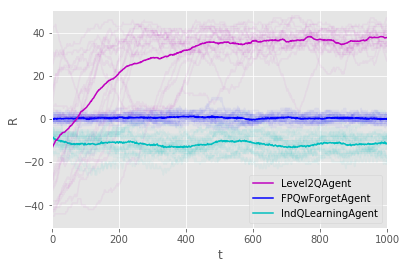

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

colors = 'cbm'
plt.axis([0, max_steps*n_iter - smooth, -50.5, 50.5])
for j,a in enumerate(agents):
    r0ss = rw_agents[j]
    for i in range(N_EXP):
        plt.plot(moving_average(r0ss[i], 100), colors[j], alpha=0.05)

    plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), colors[j], alpha=1)

plt.xlabel('t');
plt.ylabel('R');

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color=colors[::-1][i]) for i,_ in enumerate(agents)]

plt.legend(custom_lines,[a.__name__ for a in reversed(agents)], loc=4);

plt.savefig('img/4C_' + mode + '.png')

For the adversary case (no forget):

In [19]:
moving_average(np.asarray(rw_agents[-1]).mean(axis=0), 100).mean()

28.23261738261738

In [20]:
moving_average(np.asarray(rw_agents[-2]).mean(axis=0), 100).mean()

0.5037462537462537

In [21]:
moving_average(np.asarray(rw_agents[-3]).mean(axis=0), 100).mean()

-11.531268731268732